In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
reads = pd.read_excel("MiniScreen05_Count_Results.xlsx", index_col=0).iloc[:, 1:]
reads

SOX9_g1  SOX9_g2  SOX9_g3  SOX9_g4  SOX9_g5  SOX9_g6  \
fileID                                                                 
S01_MNSC501_F1     2646     1889      997     1060     1644     3106   
S02_MNSC501_F2     1084      771      434      496     1004     1401   
S03_MNSC501_F3     3930     4032     1019     1995     4442     2905   
S04_MNSC501_F4     3832     3767     1216     2070     4642     3606   
S05_MNSC501_F5      553      157      254      159      410      593   
...                 ...      ...      ...      ...      ...      ...   
S92_MNSC512_F4     6172     5929     6578     3737     6633    10501   
S93_MNSC512_F5     6937     6700     7330     4065     7401    11973   
S94_MNSC512_F6     6335     6583     6882     4096     6724    11337   
S95_MNSC512_F7     6586     6443     7235     4063     7092    12032   
S96_MNSC512_F8      571      511      555      309      579     1126   

                PROM1_g1  PROM1_g2  PROM1_g3  PROM1_g4  ...  EGFP_g3  EGFP_g4  \
fileID                                                  ...                     
S01_MNSC501_F1      4405      7449      3716      6784  ...      982      857   
S02_MNSC501_F2      1097      1645      1164      1992  ...     1127      929   
S03_MNSC501_F3      1929      3748      1552      2982  ...     8371     6018   
S04_MNSC501_F4      1745      3218      1426      2566  ...     6789     5393   
S05_MNSC501_F5       940      2045       755      1644  ...      167      177   
...                  ...       ...       ...       ...  ...      ...      ...   
S92_MNSC512_F4      6762      7499      6563      8494  ...     4438     8476   
S93_MNSC512_F5      8852      8721      7421      9904  ...     4399     9441   
S94_MNSC512_F6      8178      8168      6988      9348  ...     4167     8729   
S95_MNSC512_F7      8207      8195      7038      9298  ...     3716     9328   
S96_MNSC512_F8       872       817       631       884  ...      423      839   

                EGFP_g5  EGFP_g6  mKate2_g1  mKate2_g2  mKate2_g3  mKate2_g4  \
fileID                                                                         
S01_MNSC501_F1     1212     3199       3311       4273       4155       3129   
S02_MNSC501_F2     1762     1942        629        692        662        695   
S03_MNSC501_F3    13047    10581       1747       2293       1979       1532   
S04_MNSC501_F4    10220    10315       1484       1992       1654       1344   
S05_MNSC501_F5      166      585        649        998        923        723   
...                 ...      ...        ...        ...        ...        ...   
S92_MNSC512_F4     7782     8129       8843       4293       6391       6405   
S93_MNSC512_F5     8375     9125      10384       4907       7579       7495   
S94_MNSC512_F6     8513     8371       9375       4566       7223       7025   
S95_MNSC512_F7     8440     8972       9794       4667       7326       7230   
S96_MNSC512_F8      670      799        991        451        758        687   

                mKate2_g5  mKate2_g6  
fileID                                
S01_MNSC501_F1       2409       6521  
S02_MNSC501_F2        514        952  
S03_MNSC501_F3       1072       3126  
S04_MNSC501_F4       1122       2715  
S05_MNSC501_F5        436       1765  
...                   ...        ...  
S92_MNSC512_F4       5999      13288  
S93_MNSC512_F5       6831      15853  
S94_MNSC512_F6       6520      14424  
S95_MNSC512_F7       6508      14778  
S96_MNSC512_F8        611       1429  

[96 rows x 76 columns]

# Normalization

## Total Read Normalization

In [4]:
def total_read_normalization(input_df):   
    total_read_norm = input_df.div(input_df.sum(axis=1), axis=0)
    return total_read_norm

In [5]:
trm_reads = total_read_normalization(input_df = reads)
trm_reads

SOX9_g1   SOX9_g2   SOX9_g3   SOX9_g4   SOX9_g5   SOX9_g6  \
fileID                                                                       
S01_MNSC501_F1  0.008298  0.005924  0.003127  0.003324  0.005156  0.009741   
S02_MNSC501_F2  0.012195  0.008674  0.004882  0.005580  0.011295  0.015761   
S03_MNSC501_F3  0.018003  0.018471  0.004668  0.009139  0.020349  0.013308   
S04_MNSC501_F4  0.019690  0.019356  0.006248  0.010636  0.023852  0.018529   
S05_MNSC501_F5  0.007968  0.002262  0.003660  0.002291  0.005908  0.008545   
...                  ...       ...       ...       ...       ...       ...   
S92_MNSC512_F4  0.011818  0.011352  0.012595  0.007155  0.012700  0.020107   
S93_MNSC512_F5  0.011500  0.011107  0.012151  0.006739  0.012269  0.019848   
S94_MNSC512_F6  0.011066  0.011499  0.012022  0.007155  0.011746  0.019804   
S95_MNSC512_F7  0.011310  0.011064  0.012424  0.006977  0.012178  0.020661   
S96_MNSC512_F8  0.010386  0.009294  0.010095  0.005620  0.010531  0.020480   

                PROM1_g1  PROM1_g2  PROM1_g3  PROM1_g4  ...   EGFP_g3  \
fileID                                                  ...             
S01_MNSC501_F1  0.013814  0.023361  0.011654  0.021275  ...  0.003080   
S02_MNSC501_F2  0.012341  0.018506  0.013095  0.022410  ...  0.012679   
S03_MNSC501_F3  0.008837  0.017170  0.007110  0.013661  ...  0.038348   
S04_MNSC501_F4  0.008967  0.016535  0.007327  0.013185  ...  0.034885   
S05_MNSC501_F5  0.013544  0.029466  0.010879  0.023688  ...  0.002406   
...                  ...       ...       ...       ...  ...       ...   
S92_MNSC512_F4  0.012947  0.014359  0.012566  0.016264  ...  0.008498   
S93_MNSC512_F5  0.014674  0.014457  0.012302  0.016418  ...  0.007292   
S94_MNSC512_F6  0.014285  0.014268  0.012207  0.016329  ...  0.007279   
S95_MNSC512_F7  0.014093  0.014073  0.012086  0.015967  ...  0.006381   
S96_MNSC512_F8  0.015860  0.014860  0.011477  0.016079  ...  0.007694   

                 EGFP_g4   EGFP_g5   EGFP_g6  mKate2_g1  mKate2_g2  mKate2_g3  \
fileID                                                                          
S01_MNSC501_F1  0.002688  0.003801  0.010032   0.010384   0.013401   0.013030   
S02_MNSC501_F2  0.010451  0.019822  0.021847   0.007076   0.007785   0.007447   
S03_MNSC501_F3  0.027568  0.059768  0.048472   0.008003   0.010504   0.009066   
S04_MNSC501_F4  0.027711  0.052514  0.053003   0.007625   0.010236   0.008499   
S05_MNSC501_F5  0.002550  0.002392  0.008429   0.009351   0.014380   0.013300   
...                  ...       ...       ...        ...        ...        ...   
S92_MNSC512_F4  0.016229  0.014901  0.015565   0.016932   0.008220   0.012237   
S93_MNSC512_F5  0.015651  0.013884  0.015127   0.017214   0.008134   0.012564   
S94_MNSC512_F6  0.015248  0.014871  0.014623   0.016376   0.007976   0.012617   
S95_MNSC512_F7  0.016018  0.014493  0.015407   0.016818   0.008014   0.012580   
S96_MNSC512_F8  0.015260  0.012186  0.014533   0.018025   0.008203   0.013787   

                mKate2_g4  mKate2_g5  mKate2_g6  
fileID                                           
S01_MNSC501_F1   0.009813   0.007555   0.020450  
S02_MNSC501_F2   0.007819   0.005782   0.010710  
S03_MNSC501_F3   0.007018   0.004911   0.014320  
S04_MNSC501_F4   0.006906   0.005765   0.013951  
S05_MNSC501_F5   0.010418   0.006282   0.025432  
...                   ...        ...        ...  
S92_MNSC512_F4   0.012264   0.011487   0.025443  
S93_MNSC512_F5   0.012425   0.011324   0.026280  
S94_MNSC512_F6   0.012271   0.011389   0.025196  
S95_MNSC512_F7   0.012415   0.011176   0.025377  
S96_MNSC512_F8   0.012495   0.011113   0.025991  

[96 rows x 76 columns]

## Library Pool Normalization

In [6]:
library_control = trm_reads.iloc[[89, 90, 91], :]
library_control

SOX9_g1   SOX9_g2   SOX9_g3   SOX9_g4   SOX9_g5   SOX9_g6  \
fileID                                                                       
S90_MNSC512_F2  0.011790  0.010941  0.012759  0.006951  0.012196  0.020259   
S91_MNSC512_F3  0.011327  0.011617  0.012810  0.007425  0.012246  0.020253   
S92_MNSC512_F4  0.011818  0.011352  0.012595  0.007155  0.012700  0.020107   

                PROM1_g1  PROM1_g2  PROM1_g3  PROM1_g4  ...   EGFP_g3  \
fileID                                                  ...             
S90_MNSC512_F2  0.014315  0.014576  0.012141  0.016317  ...  0.008224   
S91_MNSC512_F3  0.013652  0.014411  0.011882  0.016167  ...  0.007989   
S92_MNSC512_F4  0.012947  0.014359  0.012566  0.016264  ...  0.008498   

                 EGFP_g4   EGFP_g5   EGFP_g6  mKate2_g1  mKate2_g2  mKate2_g3  \
fileID                                                                          
S90_MNSC512_F2  0.015820  0.014520  0.015690   0.016778   0.007755   0.012502   
S91_MNSC512_F3  0.015672  0.015075  0.014820   0.016336   0.008018   0.012388   
S92_MNSC512_F4  0.016229  0.014901  0.015565   0.016932   0.008220   0.012237   

                mKate2_g4  mKate2_g5  mKate2_g6  
fileID                                           
S90_MNSC512_F2   0.012528   0.011164   0.026214  
S91_MNSC512_F3   0.012322   0.011267   0.025614  
S92_MNSC512_F4   0.012264   0.011487   0.025443  

[3 rows x 76 columns]

In [7]:
library_control_mean = library_control.mean(axis=0)
library_control_mean

SOX9_g1      0.011645
SOX9_g2      0.011303
SOX9_g3      0.012722
SOX9_g4      0.007177
SOX9_g5      0.012381
               ...   
mKate2_g2    0.007998
mKate2_g3    0.012376
mKate2_g4    0.012371
mKate2_g5    0.011306
mKate2_g6    0.025757
Length: 76, dtype: float64

In [8]:
library_reads = trm_reads.div(library_control_mean)

## Population Level Normalization

In [9]:
S1A = library_reads.iloc[0:4].copy().div(library_reads.iloc[80])
S1B = library_reads.iloc[4:8].copy().div(library_reads.iloc[80])

In [10]:
S1A

SOX9_g1   SOX9_g2   SOX9_g3   SOX9_g4   SOX9_g5   SOX9_g6  \
fileID                                                                       
S01_MNSC501_F1  0.836129  0.775755  0.679666  0.674080  0.479492  0.628183   
S02_MNSC501_F2  1.228784  1.135821  1.061337  1.131489  1.050453  1.016450   
S03_MNSC501_F3  1.814041  2.418712  1.014719  1.853190  1.892473  0.858227   
S04_MNSC501_F4  1.984029  2.534704  1.358230  2.156827  2.218320  1.194950   

                PROM1_g1  PROM1_g2  PROM1_g3  PROM1_g4  ...   EGFP_g3  \
fileID                                                  ...             
S01_MNSC501_F1  1.111102  1.043153  1.091287  1.101126  ...  0.284304   
S02_MNSC501_F2  0.992608  0.826378  1.226250  1.159855  ...  1.170464   
S03_MNSC501_F3  0.710741  0.766692  0.665773  0.707017  ...  3.540134   
S04_MNSC501_F4  0.721178  0.738372  0.686154  0.682413  ...  3.220447   

                 EGFP_g4   EGFP_g5   EGFP_g6  mKate2_g1  mKate2_g2  mKate2_g3  \
fileID                                                                          
S01_MNSC501_F1  0.297468  0.248666  0.530349   0.971234   1.015674   1.077820   
S02_MNSC501_F2  1.156745  1.296829  1.154941   0.661878   0.590052   0.616022   
S03_MNSC501_F3  3.051283  3.910170  2.562391   0.748563   0.796153   0.749881   
S04_MNSC501_F4  3.067105  3.435610  2.801921   0.713243   0.775800   0.702991   

                mKate2_g4  mKate2_g5  mKate2_g6  
fileID                                           
S01_MNSC501_F1   0.986926   1.050924   1.118444  
S02_MNSC501_F2   0.786369   0.804378   0.585733  
S03_MNSC501_F3   0.705844   0.683125   0.783177  
S04_MNSC501_F4   0.694572   0.801985   0.762972  

[4 rows x 76 columns]

In [11]:
S2A = library_reads.iloc[12:16].copy().div(library_reads.iloc[81])

In [12]:
S3A = library_reads.iloc[16:20].copy().div(library_reads.iloc[82])
S3B = library_reads.iloc[20:24].copy().div(library_reads.iloc[82])

In [13]:
S4A = library_reads.iloc[24:28].copy().div(library_reads.iloc[83])
S4B = library_reads.iloc[28:32].copy().div(library_reads.iloc[83])

In [14]:
S5A = library_reads.iloc[32:36].copy().div(library_reads.iloc[84])
S5B = library_reads.iloc[36:40].copy().div(library_reads.iloc[84])

In [15]:
S6A = library_reads.iloc[40:44].copy().div(library_reads.iloc[85])
S6B = library_reads.iloc[44:48].copy().div(library_reads.iloc[85])

In [16]:
S7A = library_reads.iloc[48:52].copy().div(library_reads.iloc[86])
S7B = library_reads.iloc[52:56].copy().div(library_reads.iloc[86])

In [17]:
S8A = library_reads.iloc[56:60].copy().div(library_reads.iloc[8])
S8B = library_reads.iloc[60:64].copy().div(library_reads.iloc[8])

In [18]:
S9A = library_reads.iloc[64:68].copy().div(library_reads.iloc[9])
S9B = library_reads.iloc[68:72].copy().div(library_reads.iloc[9])

In [19]:
S10A = library_reads.iloc[72:76].copy().div(library_reads.iloc[8])
S10B = library_reads.iloc[76:80].copy().div(library_reads.iloc[9])

# Scatterplot of Fractions

In [18]:
def scatter_fraction(norm_reads): 
    plt.style.use('default')
    plot_df = norm_reads.T.copy()
    hue = [x.split("_")[0] for x in norm_reads.columns]
    hue = [x if x in ['SOX9', "EGFP", "KRT20", "mKate2"] else "Other" for x in hue ]
    plot_df['Gene'] = hue

    axis_min = norm_reads.min().min() - norm_reads.min().min()/10
    axis_max = norm_reads.max().max() + norm_reads.max().max()/10
    
    name_dict = {0:"GFP_A", 1:"mCherry_B", 2:"Negative_C", 3:"Negative_D"}

    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,1], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[0],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[0], color="black")
    ax[0].set_title(name_dict[0] + "(X) vs. " + name_dict[1] + "(Y)",size=20, pad=20)
    ax[0].set_xlim(axis_min,axis_max)
    ax[0].set_ylim(axis_min,axis_max)
    ax[0].legend(loc=4)
    ax[0].set_xscale('log', basex=2)
    ax[0].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,2], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[1],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[1], color="black")    
    ax[1].set_title(name_dict[0] + "(X) vs. " + name_dict[2]+ "(Y)",size=20, pad=20)
    ax[1].set_xlim(axis_min,axis_max)
    ax[1].set_ylim(axis_min,axis_max)
    ax[1].legend(loc=4)
    ax[1].set_xscale('log', basex=2)
    ax[1].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,3], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[2],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[2], color="black")
    ax[2].set_title(name_dict[0] + "(X) vs. " + name_dict[3]+ "(Y)",size=20, pad=20)
    ax[2].set_xlim(axis_min,axis_max)
    ax[2].set_ylim(axis_min,axis_max)
    ax[2].legend(loc=4)
    ax[2].set_xscale('log', basex=2)
    ax[2].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,1], y=plot_df.iloc[:,2], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[3],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[3], color="black")    
    ax[3].set_title(name_dict[1] + "(X) vs. " + name_dict[2]+ "(Y)",size=20, pad=20)
    ax[3].set_xlim(axis_min,axis_max)
    ax[3].set_ylim(axis_min,axis_max)
    ax[3].legend(loc=4)
    ax[3].set_xscale('log', basex=2)
    ax[3].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,1], y=plot_df.iloc[:,3], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[4],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[4], color="black")    
    ax[4].set_title(name_dict[1] + "(X) vs. " + name_dict[3]+ "(Y)",size=20, pad=20)
    ax[4].set_xlim(axis_min,axis_max)
    ax[4].set_ylim(axis_min,axis_max)
    ax[4].legend(loc=4)
    ax[4].set_xscale('log', basex=2)
    ax[4].set_yscale('log', basey=2)

    plt.axis('equal')
    
    plt.show()

In [19]:
def scatter_fraction_single(norm_reads): 
    plt.style.use('default')
    plot_df = norm_reads.T.copy()
    hue = [x.split("_")[0] for x in norm_reads.columns]
    hue = [x if x in ['SOX9', "EGFP", "KRT20", "mKate2"] else "Other" for x in hue ]
    plot_df['Gene'] = hue

    axis_min = norm_reads.min().min() - norm_reads.min().min()/10
    axis_max = norm_reads.max().max() + norm_reads.max().max()/10
    
    name_dict = {0:"GFP_A", 1:"mCherry_B", 2:"Negative_C", 3:"Negative_D"}

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,1], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[0],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[0], color="black")
    ax[0].set_title("Top 5% Fraction (X) vs. Top 5-10% Fraction (Y)", size=10, pad=20)
    ax[0].set_xlim(axis_min,axis_max)
    ax[0].set_ylim(axis_min,axis_max)
    ax[0].legend(loc=4)
    ax[0].set_xscale('log', basex=2)
    ax[0].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,2], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[1],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[1], color="black")    
    ax[1].set_title("Top 5% Fraction (X) vs. Bottom 10-5% Fraction (Y)", size=10, pad=20)
    ax[1].set_xlim(axis_min,axis_max)
    ax[1].set_ylim(axis_min,axis_max)
    ax[1].legend(loc=4)
    ax[1].set_xscale('log', basex=2)
    ax[1].set_yscale('log', basey=2)
    
    sns.scatterplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,3], hue=plot_df['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[2],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    sns.lineplot(x=[axis_min,axis_max], y=[axis_min,axis_max], ax=ax[2], color="black")
    ax[2].set_title("Top 5% Fraction (X) vs. Bottom 5% Fraction (Y)", size=10, pad=20)
    ax[2].set_xlim(axis_min,axis_max)
    ax[2].set_ylim(axis_min,axis_max)
    ax[2].legend(loc=4)
    ax[2].set_xscale('log', basex=2)
    ax[2].set_yscale('log', basey=2)

    plt.axis('equal')
    
    plt.show()

# Dual Reporter at Day 7

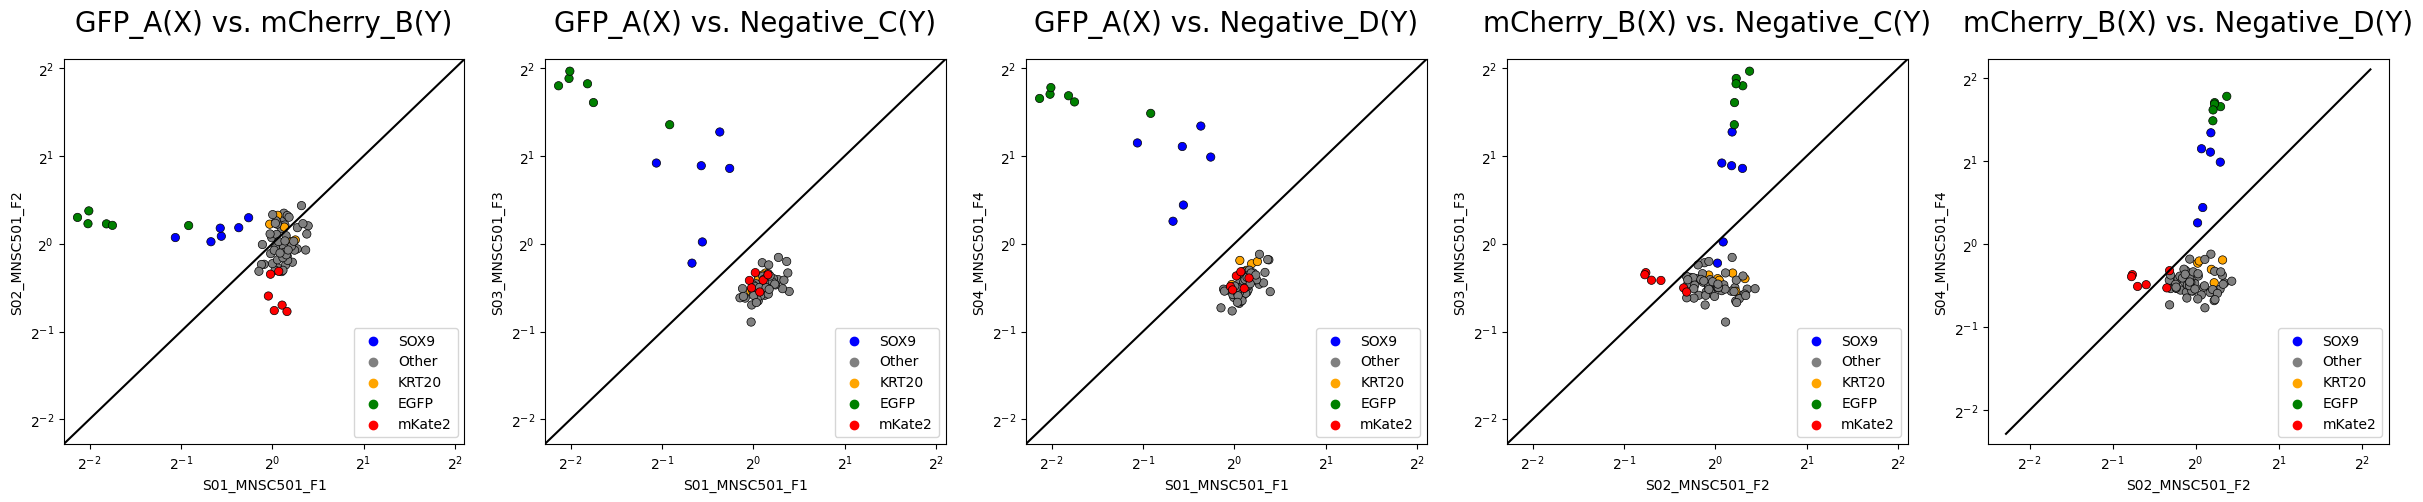

In [20]:
scatter_fraction(S1A)

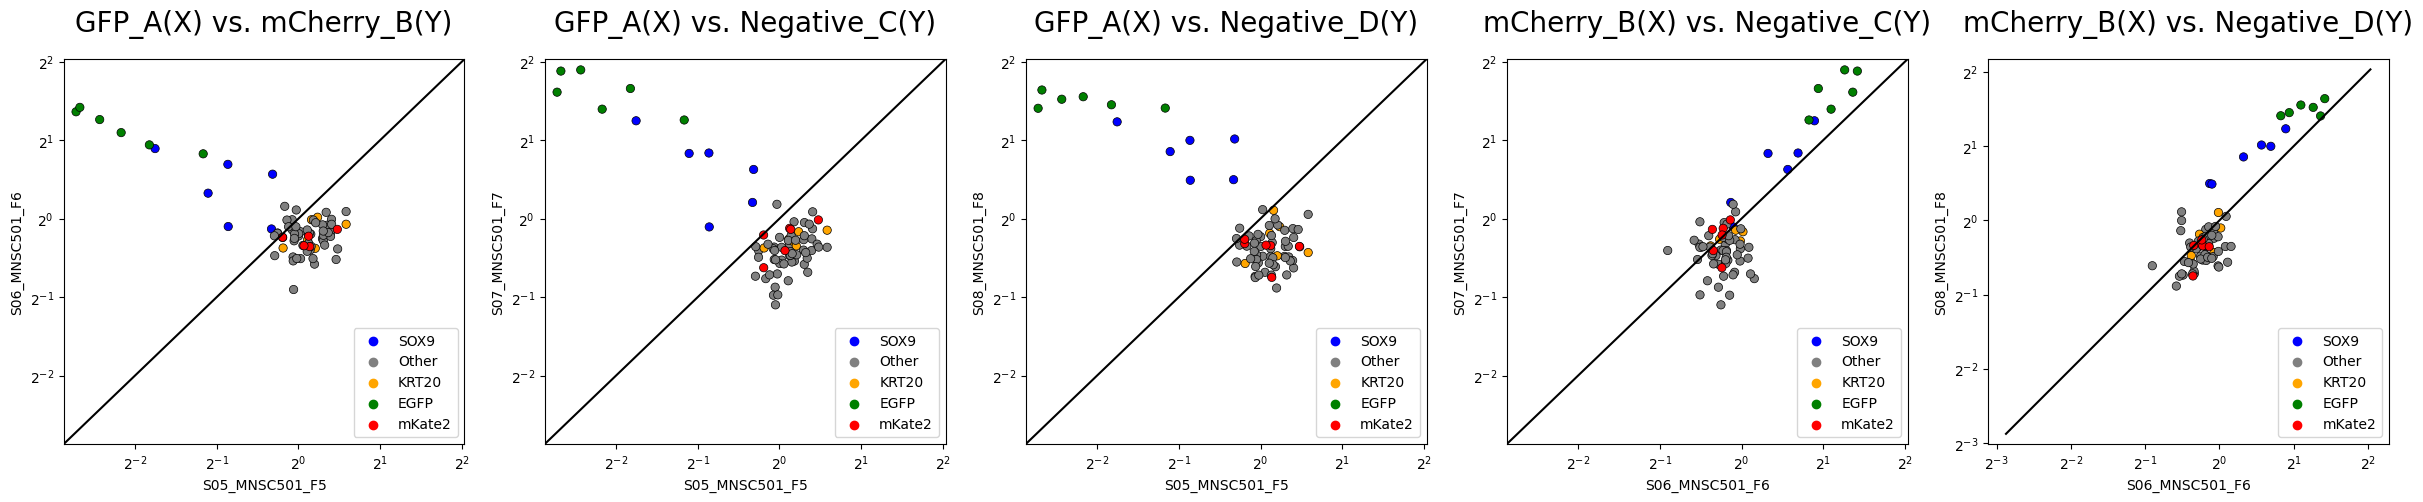

In [21]:
scatter_fraction(S1B)

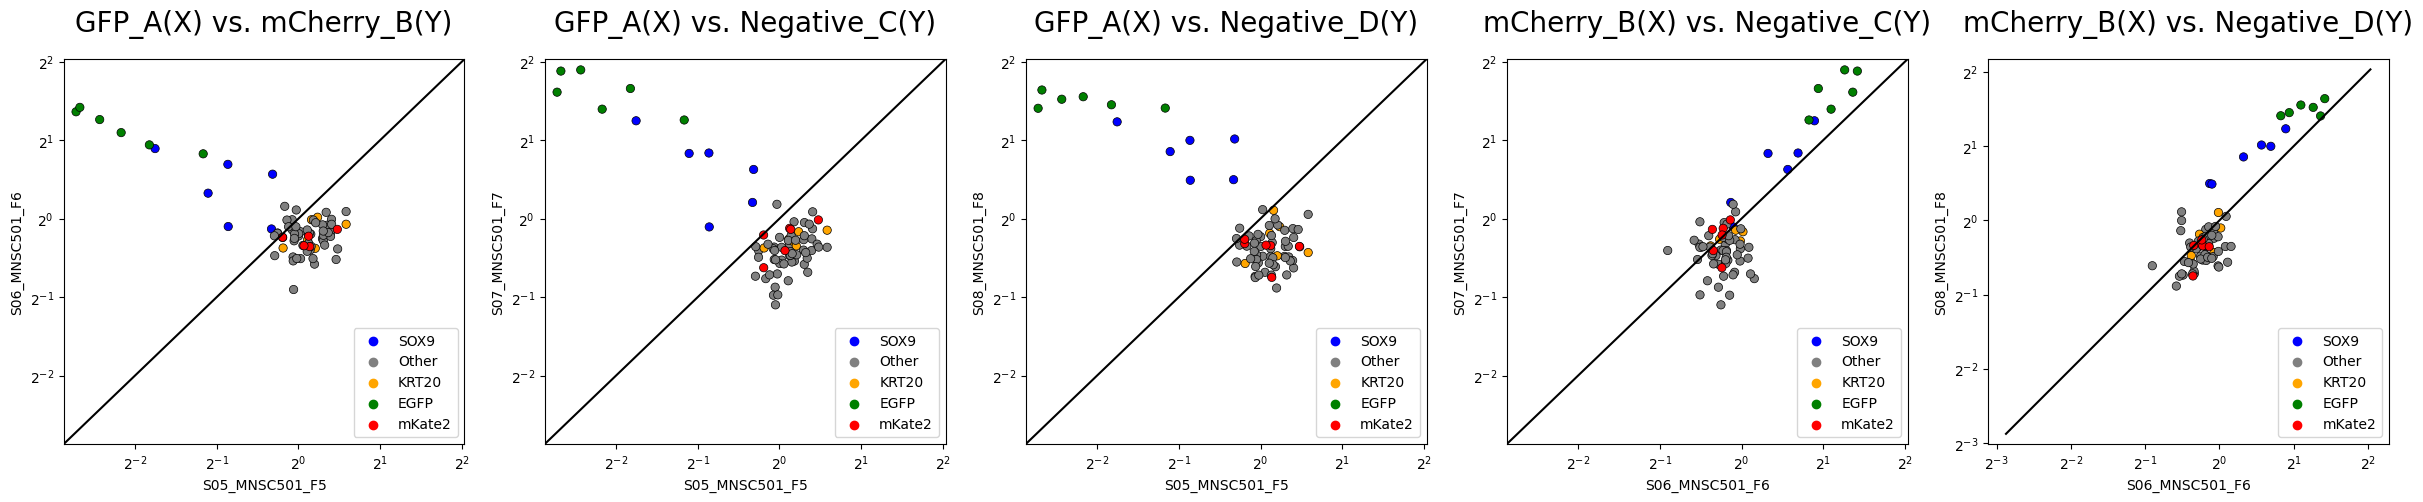

In [22]:
scatter_fraction(S1B)

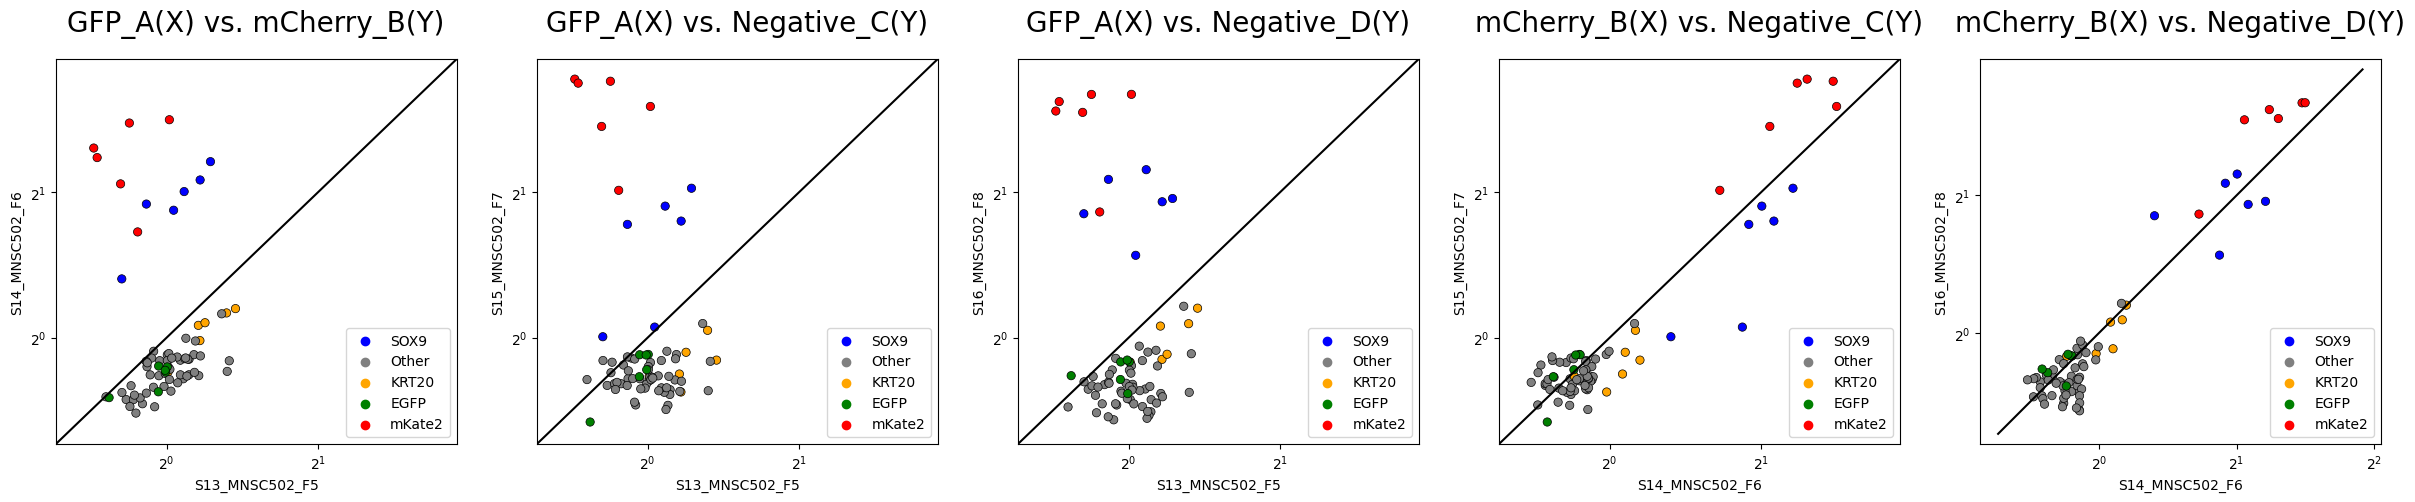

In [23]:
scatter_fraction(S2A)

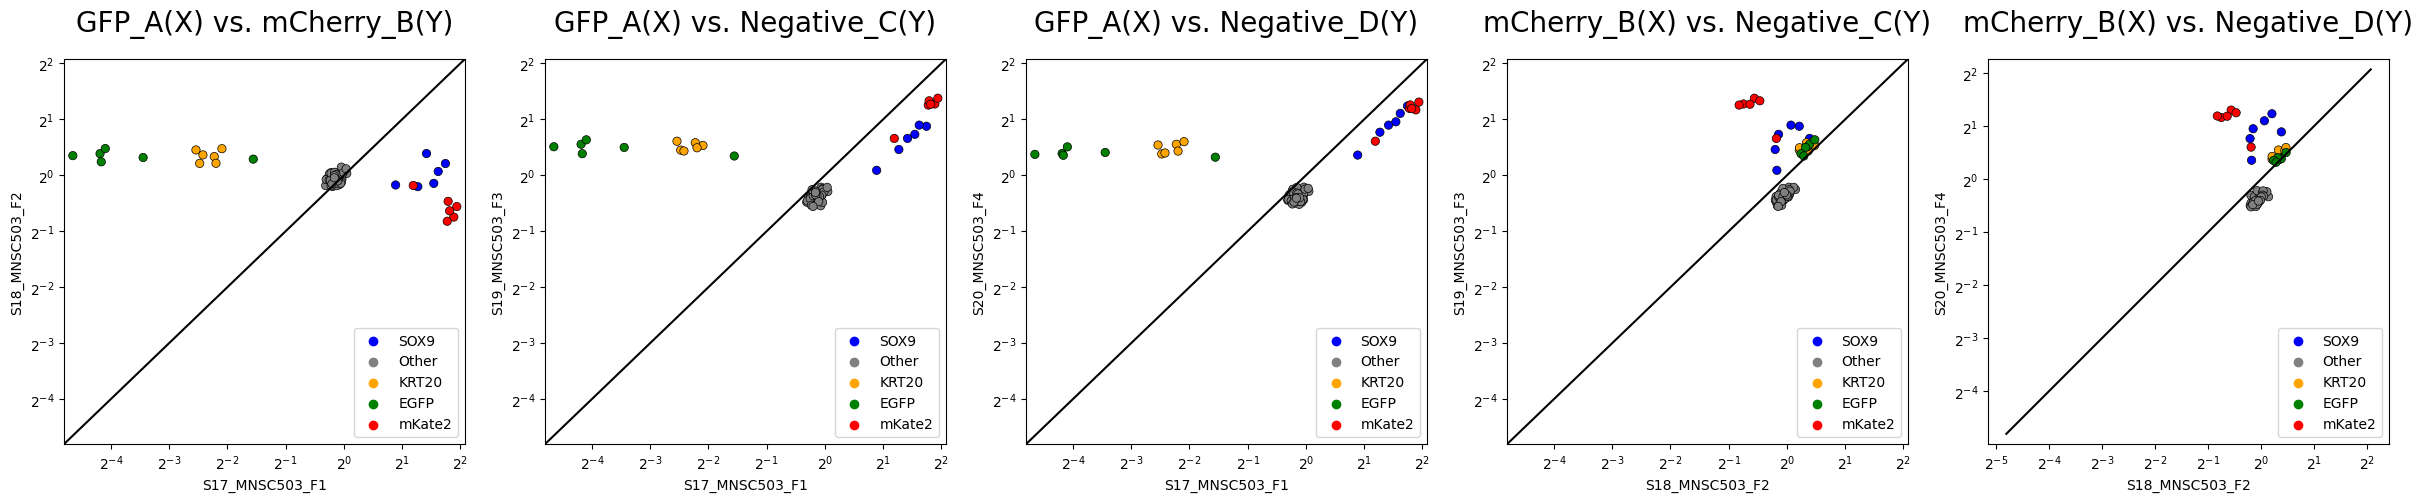

In [24]:
scatter_fraction(S3A)

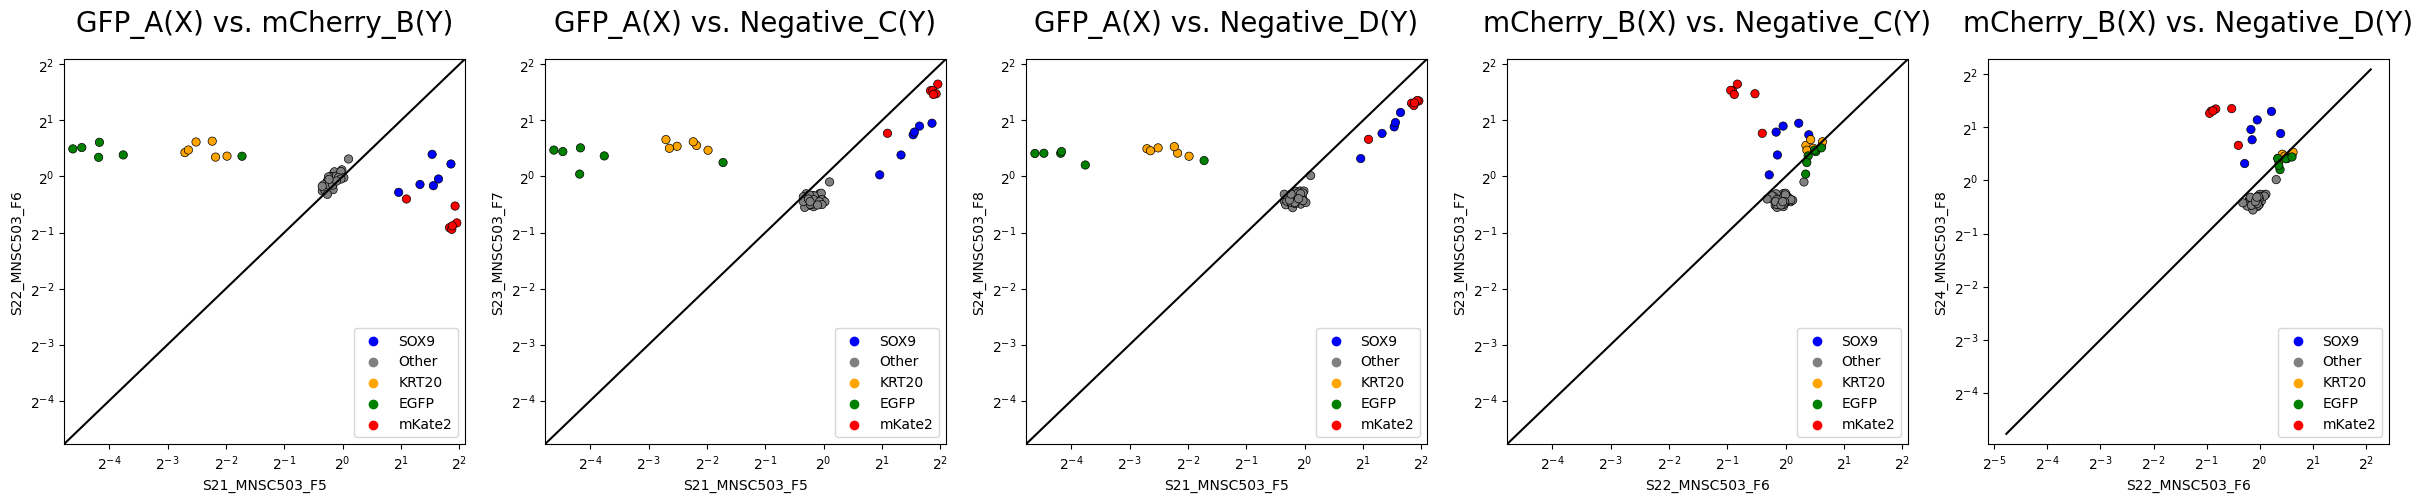

In [25]:
scatter_fraction(S3B)

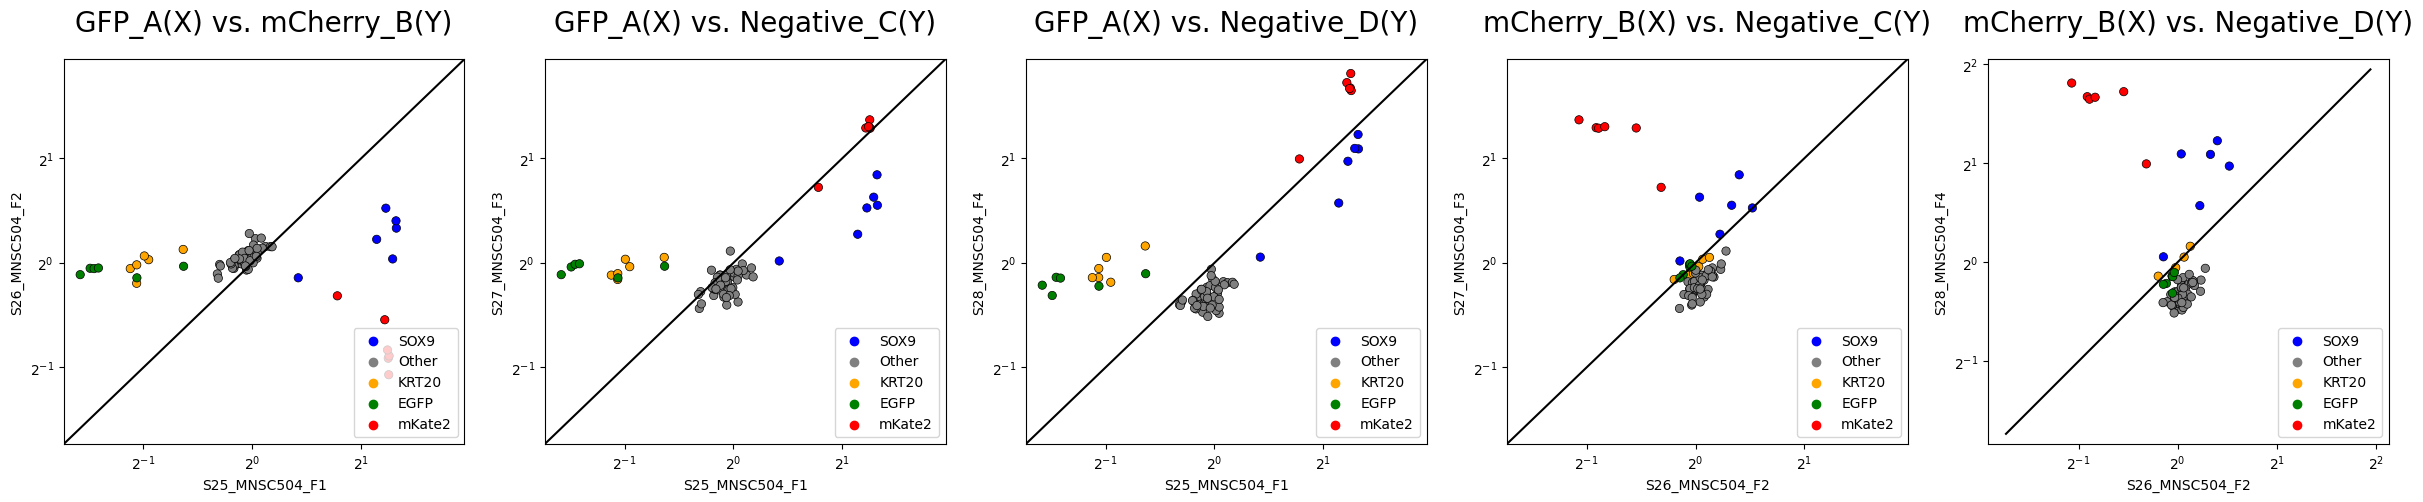

In [26]:
scatter_fraction(S4A)

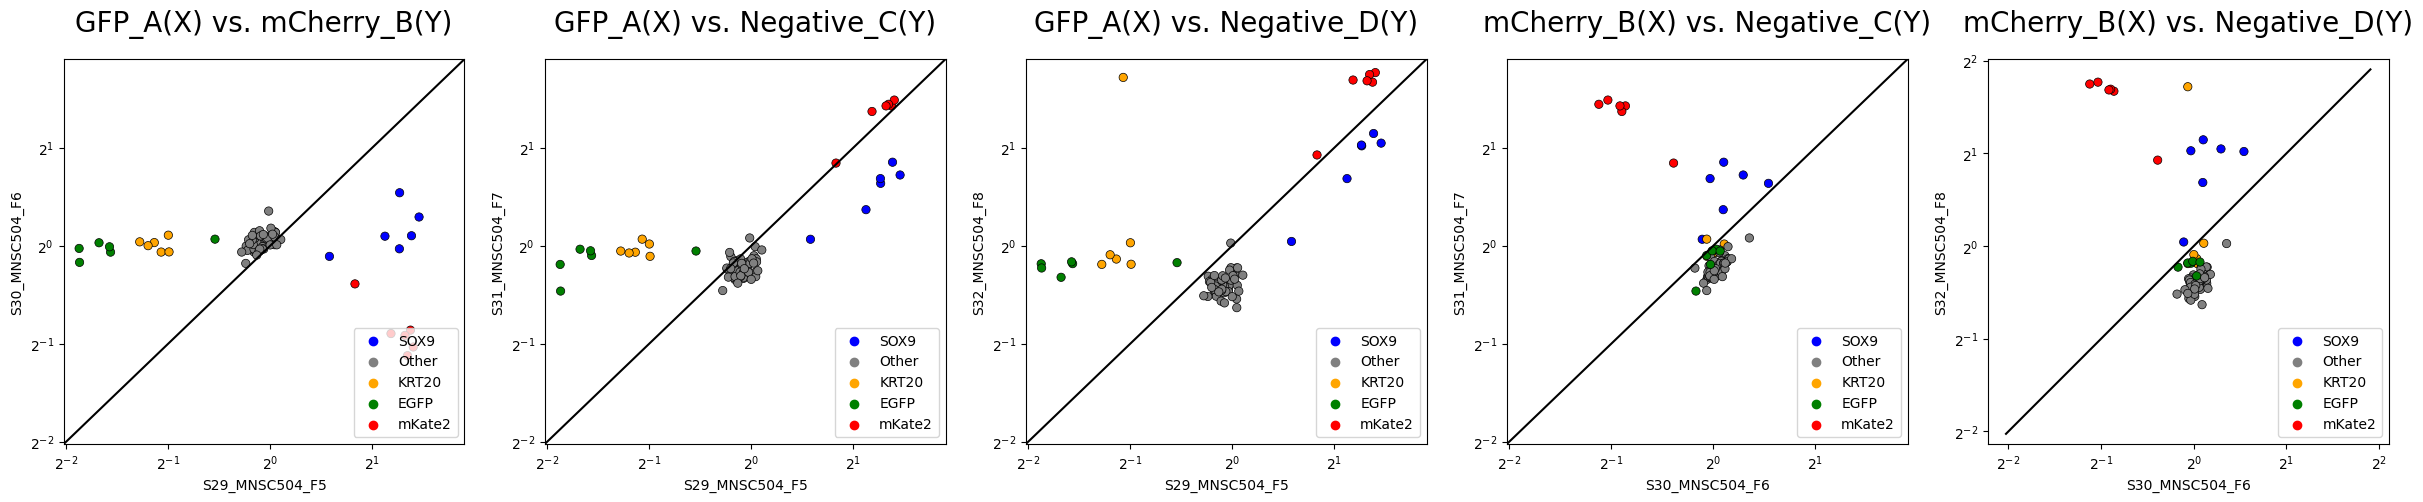

In [27]:
scatter_fraction(S4B)

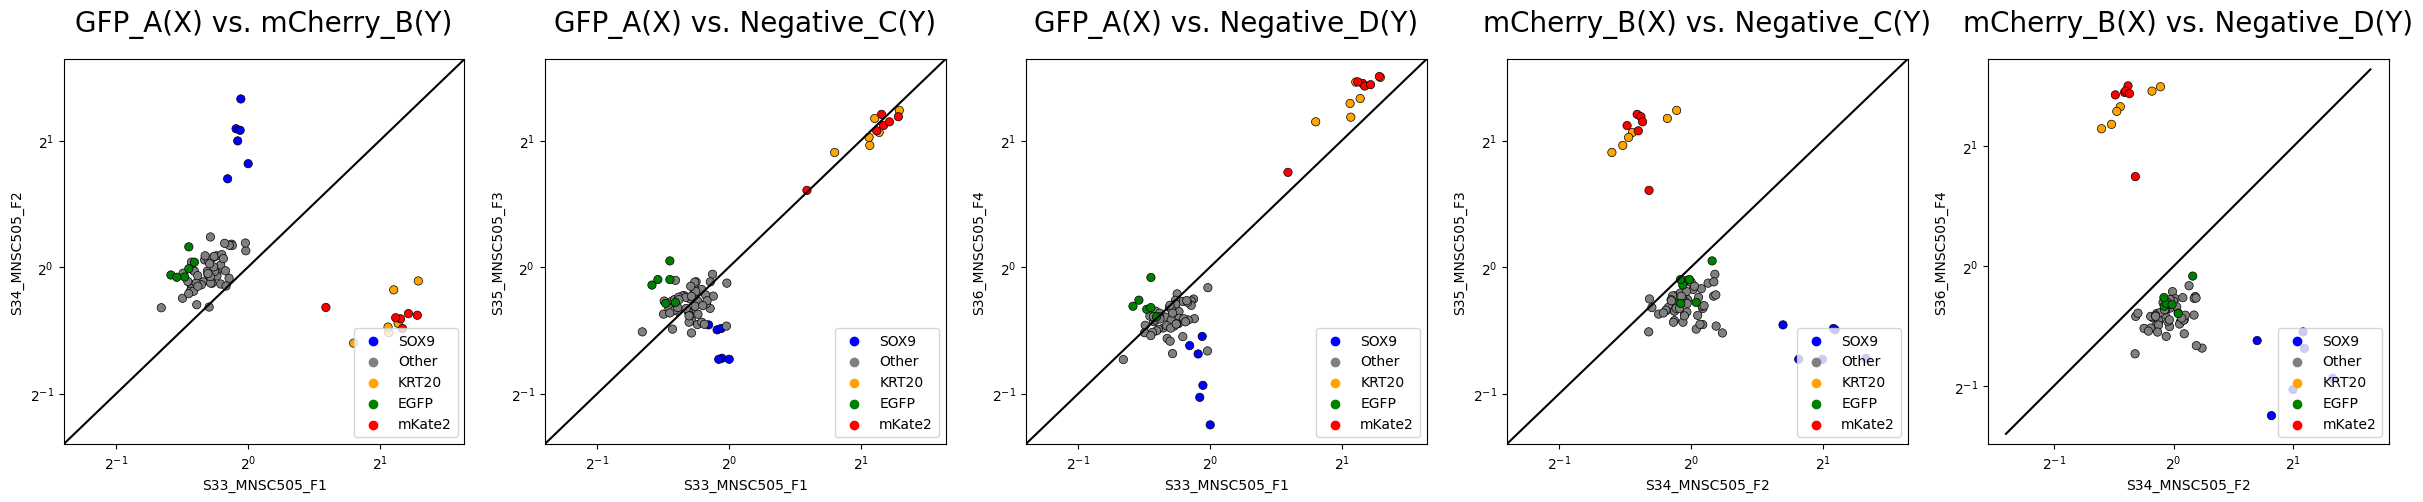

In [28]:
scatter_fraction(S5A)

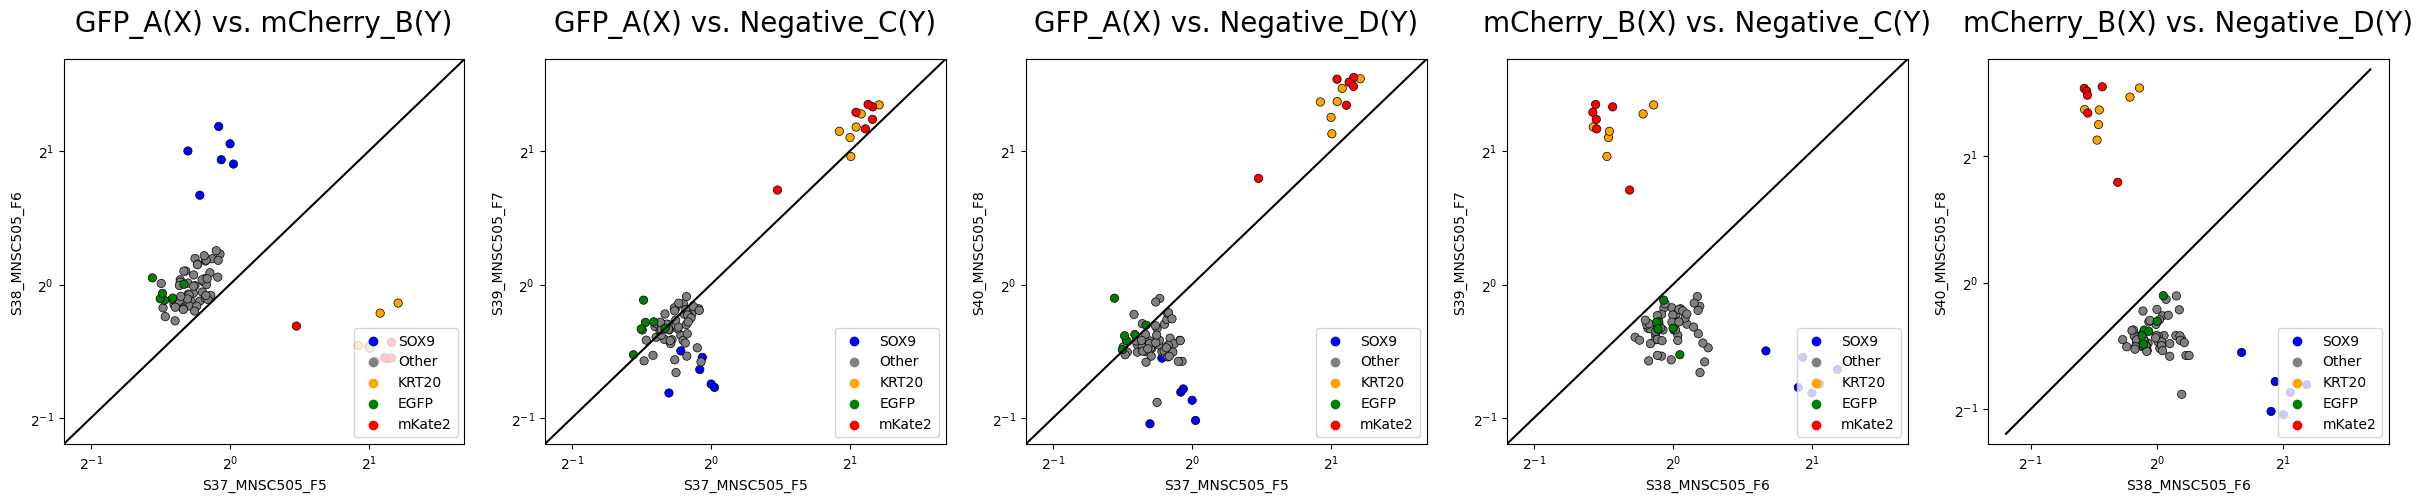

In [29]:
scatter_fraction(S5B)

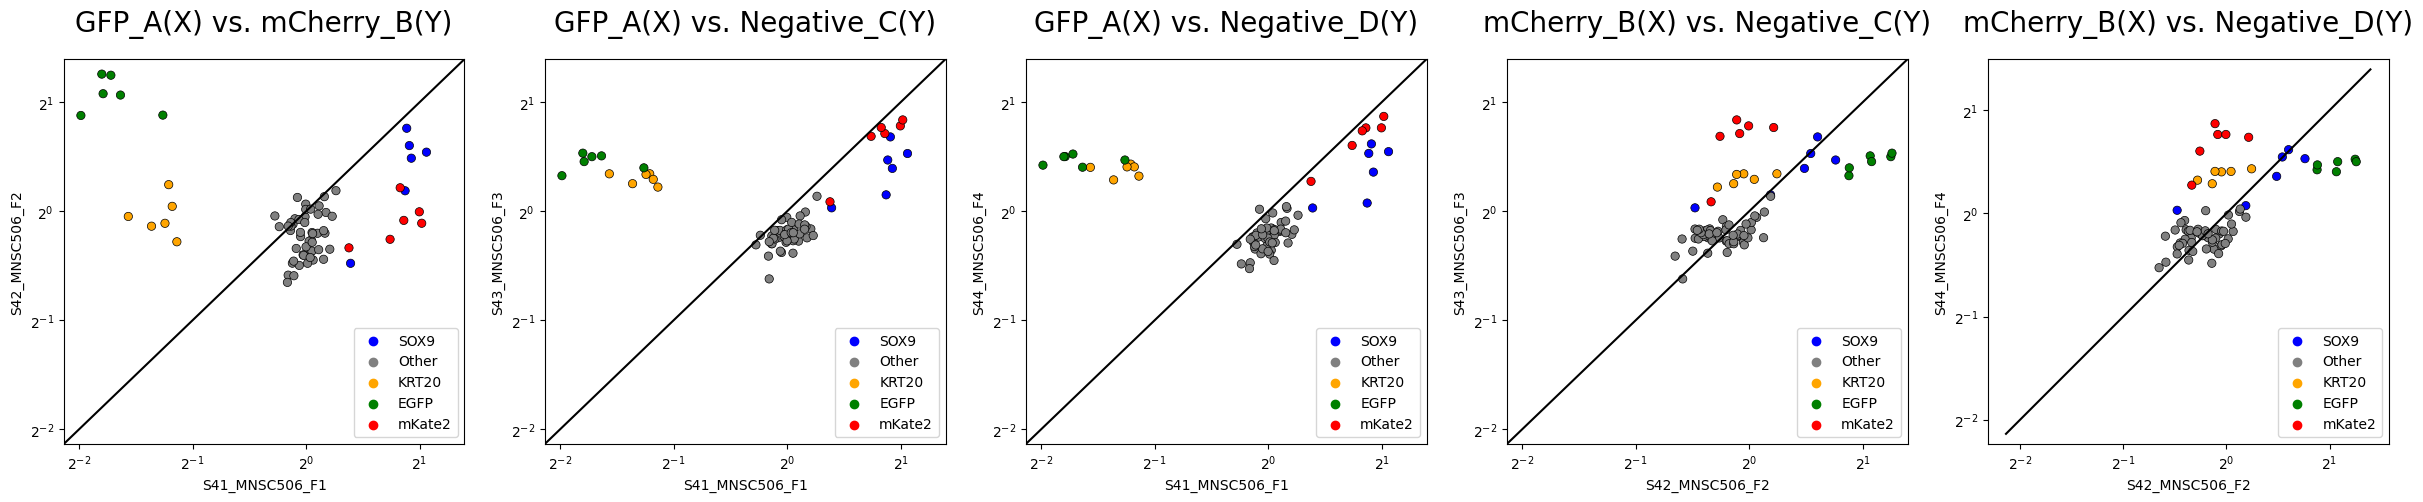

In [30]:
scatter_fraction(S6A)

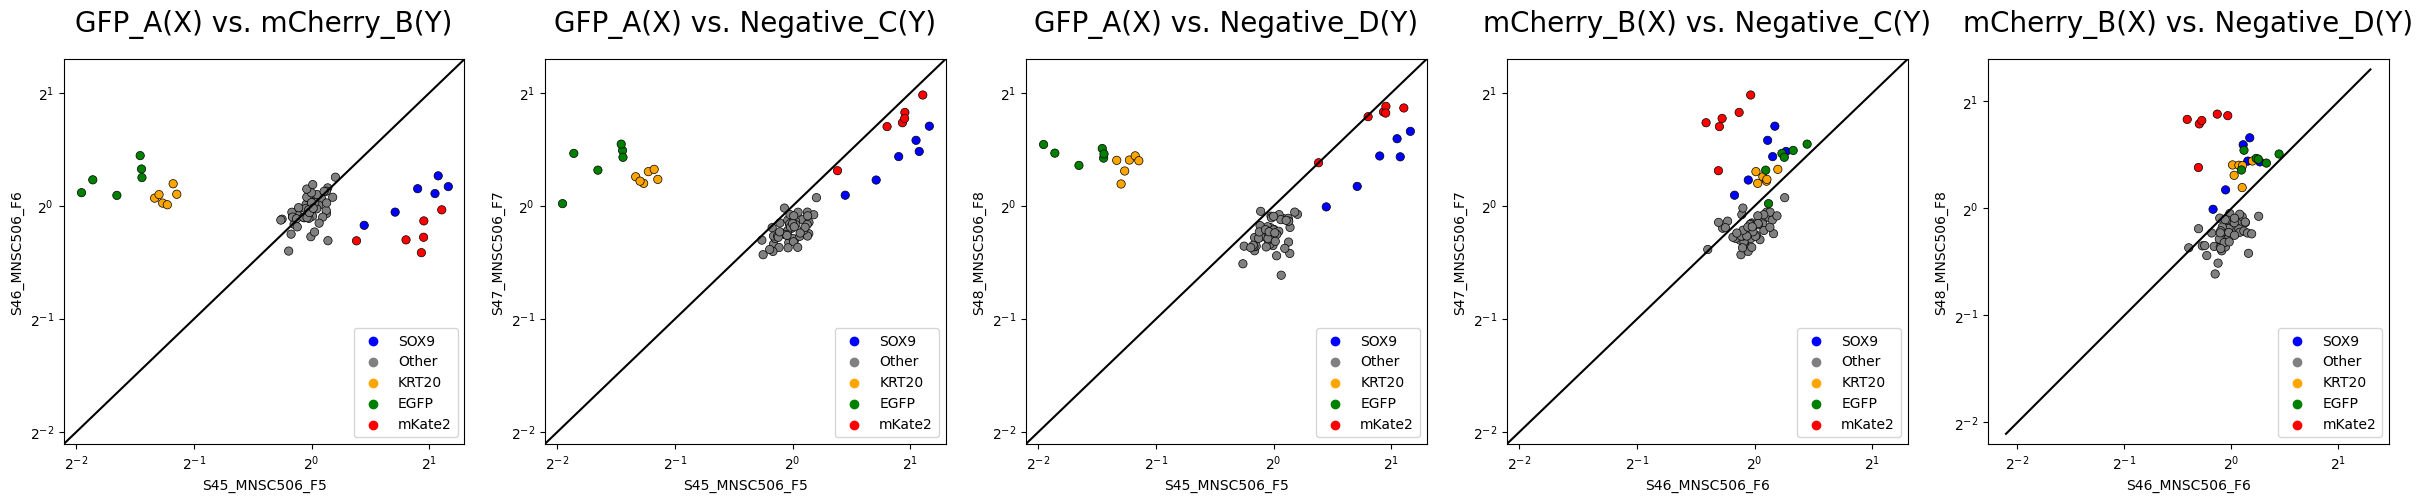

In [31]:
scatter_fraction(S6B)

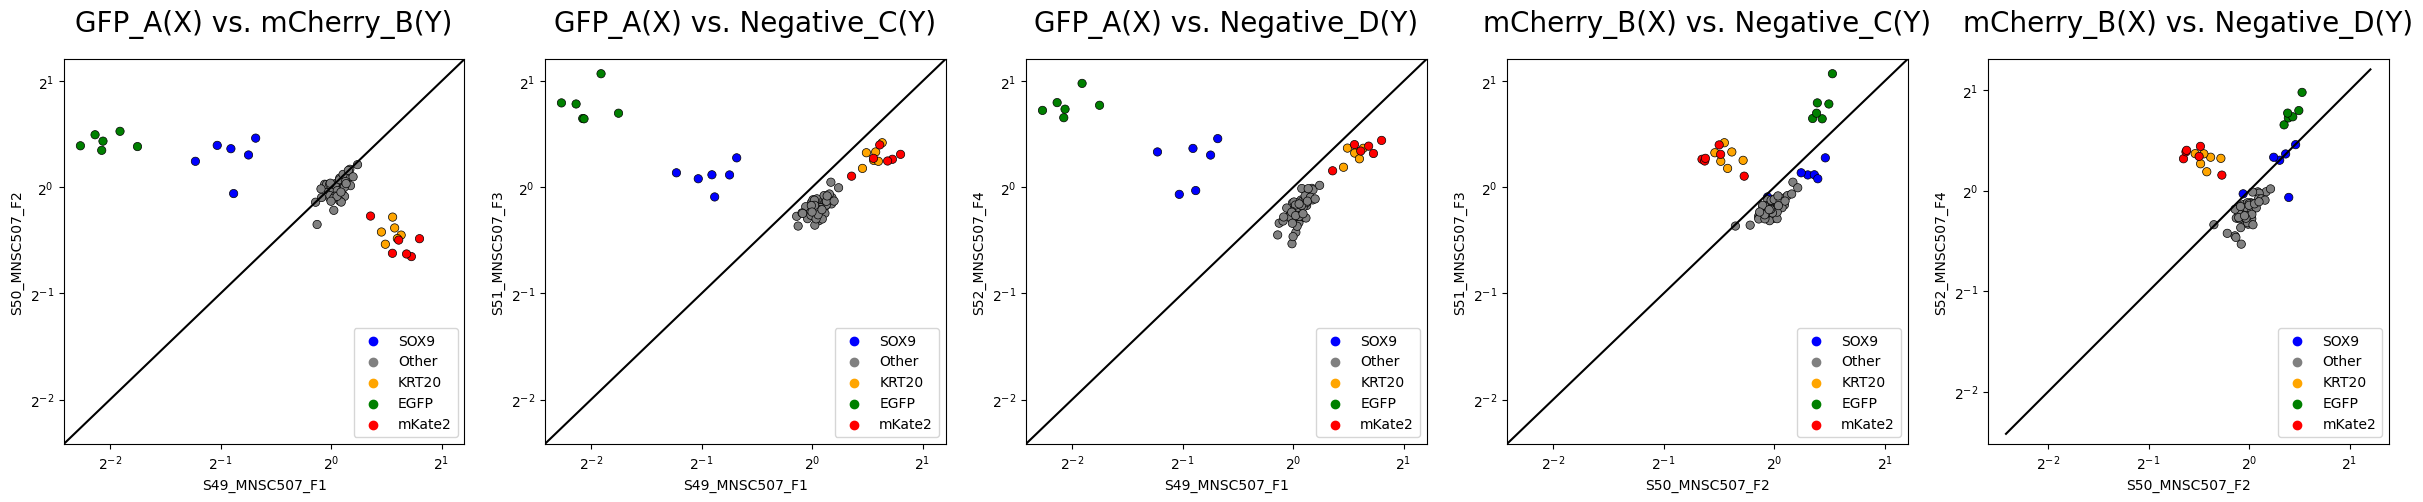

In [32]:
scatter_fraction(S7A)

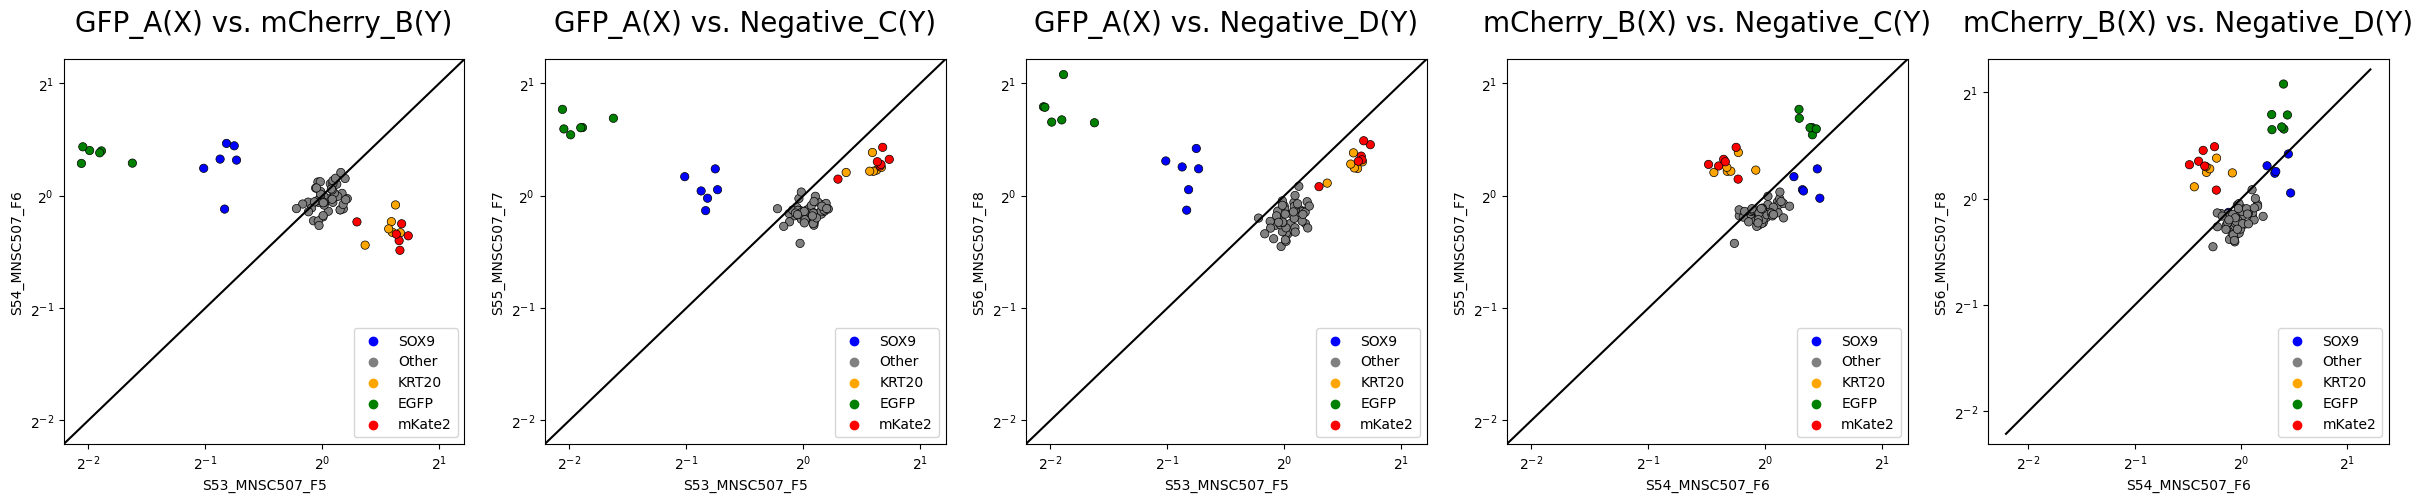

In [33]:
scatter_fraction(S7B)

### Single channel comparison

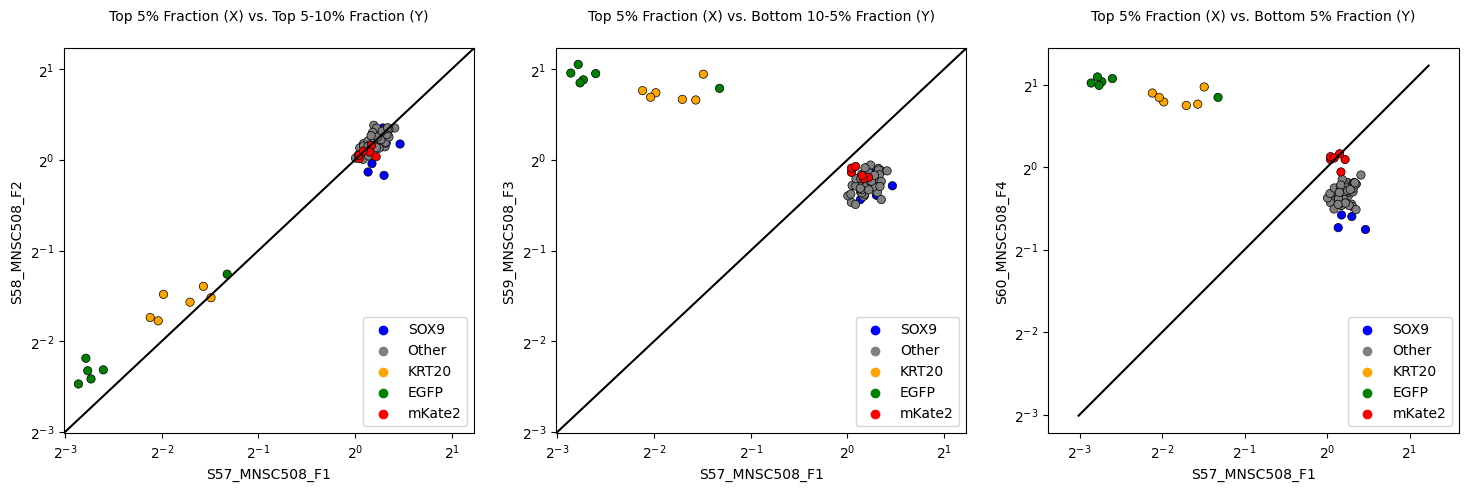

In [34]:
scatter_fraction_single(S8A)

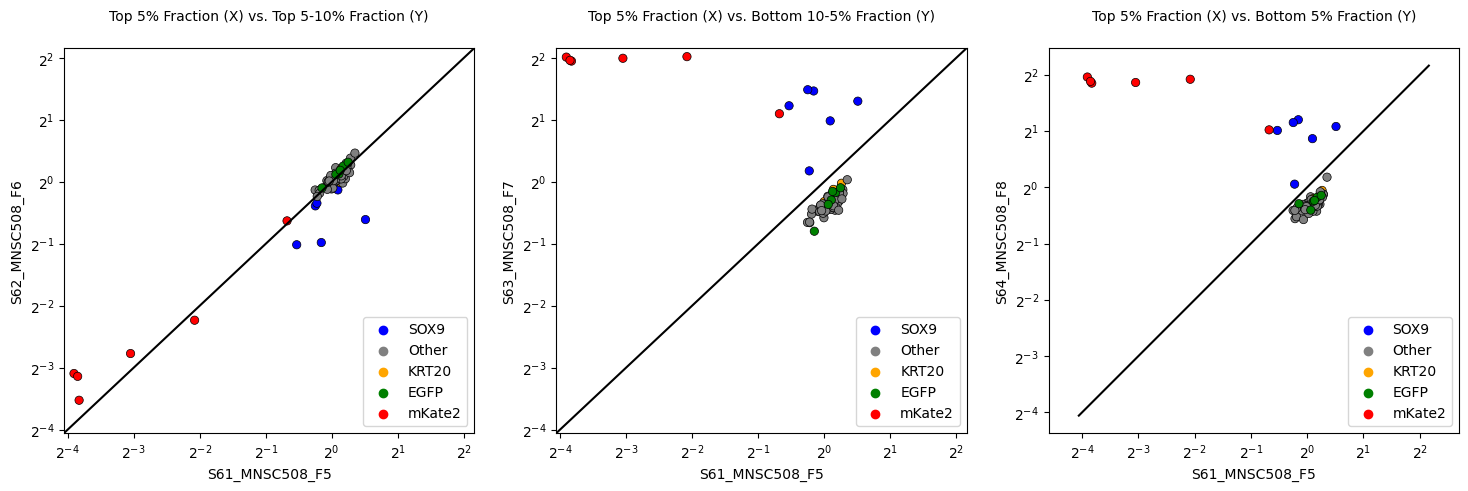

In [35]:
scatter_fraction_single(S8B)

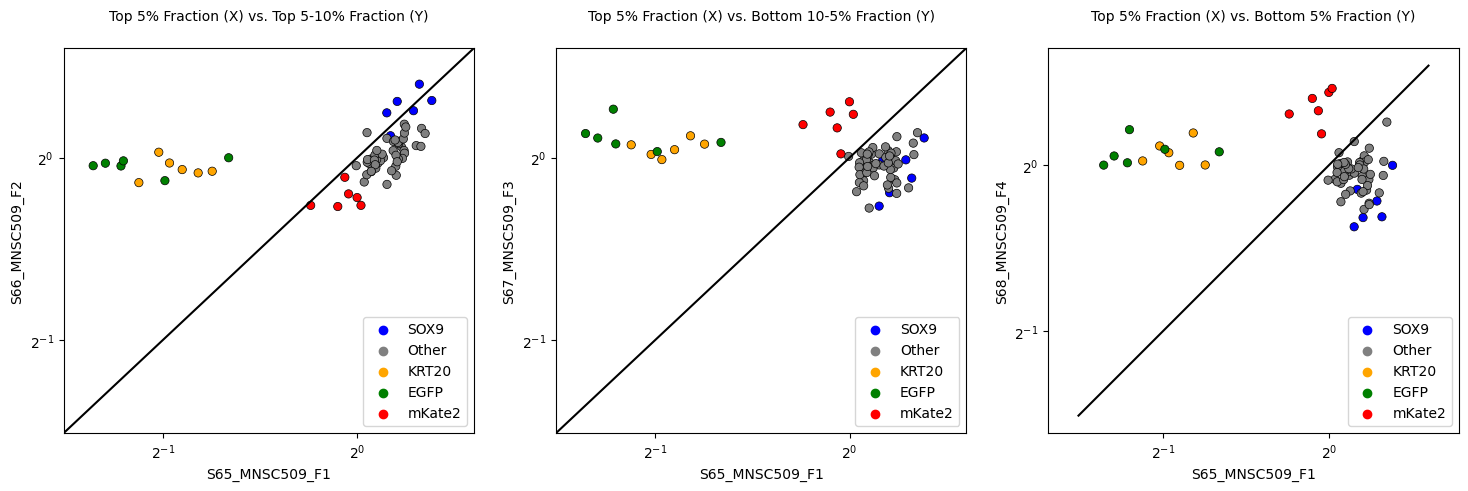

In [36]:
scatter_fraction_single(S9A)

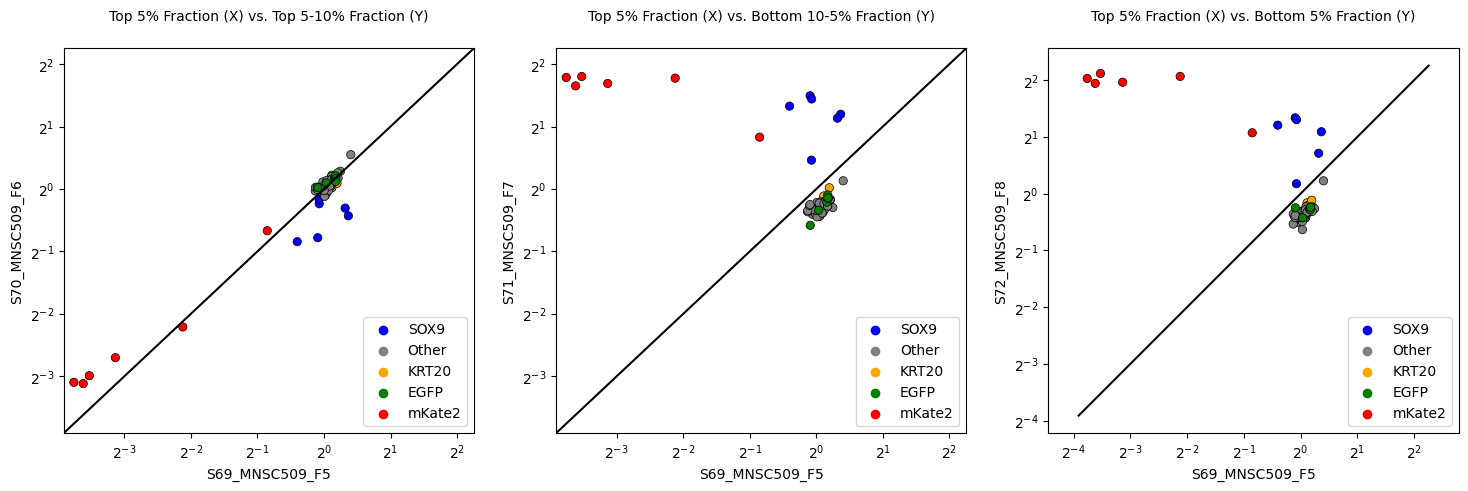

In [37]:
scatter_fraction_single(S9B)

# Dual Reporter at Day 14

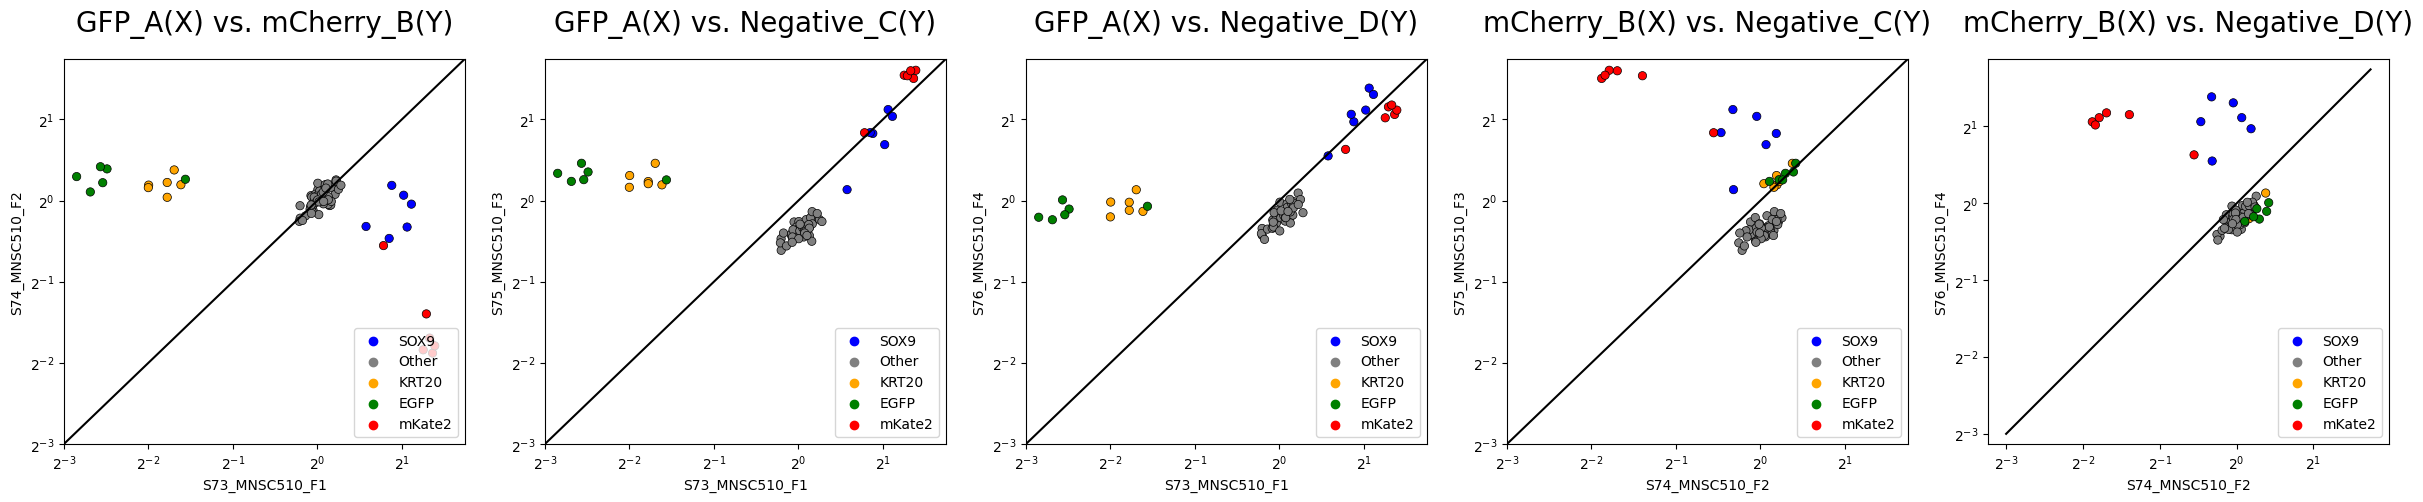

In [38]:
scatter_fraction(S10A)

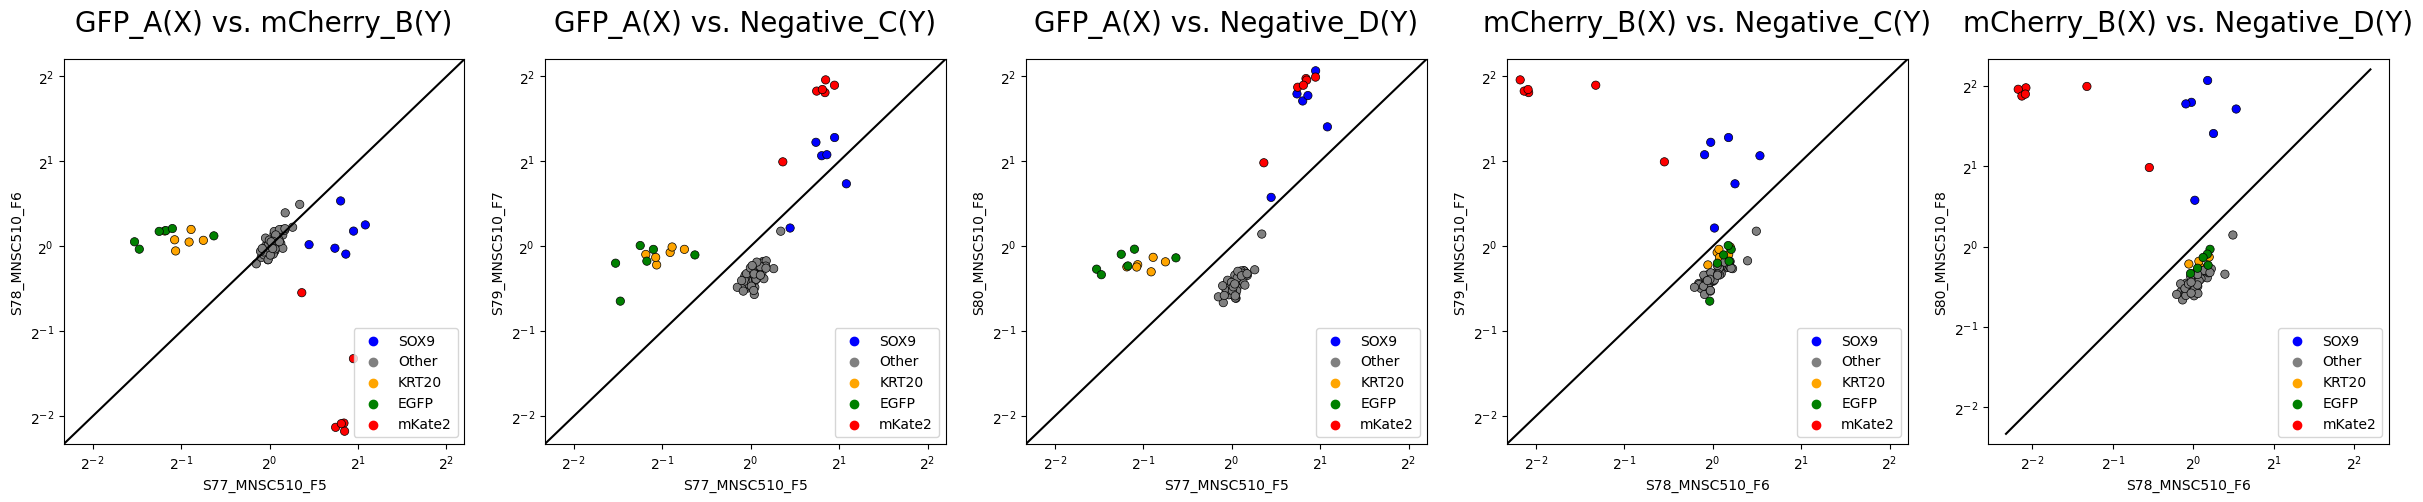

In [39]:
scatter_fraction(S10B)

# HeatMap 

Note: Values depicted are the normalized counts after Total Read, Library, and Population normalization and are not Fold Change values

In [152]:
def heatmap(norm_read_1,norm_read_2, log_scale = True):

    name_dict = {"SOX9":"blue", "KRT20":"orange", "EGFP":"green", "mKate2":"red", "PROM1":"grey","LRIG1":"grey", "CTRL":"grey", "ROSA26":"grey", "CCR5":"grey", "AAVS1":"grey"}
    df = pd.concat([norm_read_1, norm_read_2])
    if log_scale == True:
        df.replace(0, np.nan, inplace=True)
        df.dropna(inplace=True, axis=1)
        data = np.log2(df)
        center = 0

    else:
        df.dropna(inplace=True, axis=1)
        data = df
        center = 1


    sns.set(font_scale=1.4)
    cluster_map = sns.clustermap(data, 
                         xticklabels = df.columns, 
                         yticklabels = df.index, 
                         method="average",
                         linewidths=0.5,
                         figsize=(20,5),
                         cbar_pos=(0.88, 0.38, 0.01, 0.45),
                         cmap = "RdBu_r",
                         vmin= np.floor(data.min().min()),
                         vmax= np.ceil(data.max().max()),
                         center=center,
                         row_cluster=False,
                         col_colors  = [name_dict[x] for x in list(density_format(data)['Gene'])])



    cluster_map.ax_row_dendrogram.set_visible(False)
    cluster_map.ax_heatmap.set_xlabel("gRNA", fontsize=10)
    cluster_map.ax_heatmap.set_ylabel("Fraction", fontsize=10)
    cluster_map.ax_heatmap.xaxis.labelpad= 10
    cluster_map.ax_heatmap.yaxis.labelpad= 10
    cluster_map.ax_heatmap.yaxis.tick_left() 
    cluster_map.ax_heatmap.yaxis.set_label_position('left')
    cluster_map.ax_heatmap.tick_params(left=True, bottom=True, axis='both', which='both', length=0, size=5,labelsize=10)
    plt.show()

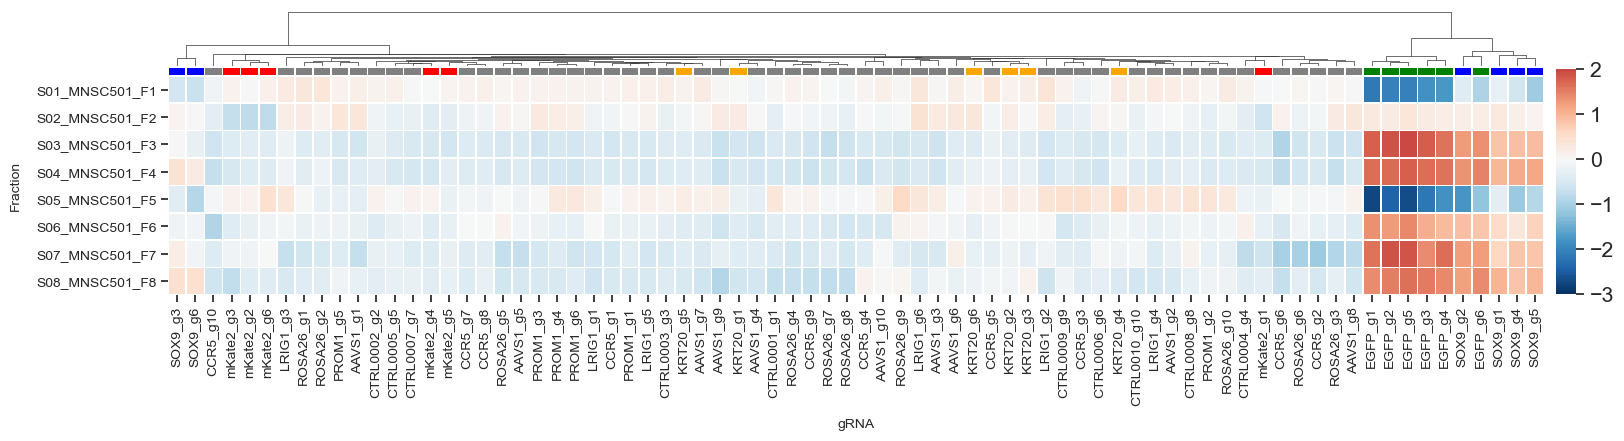

In [153]:
heatmap(S1A, S1B)

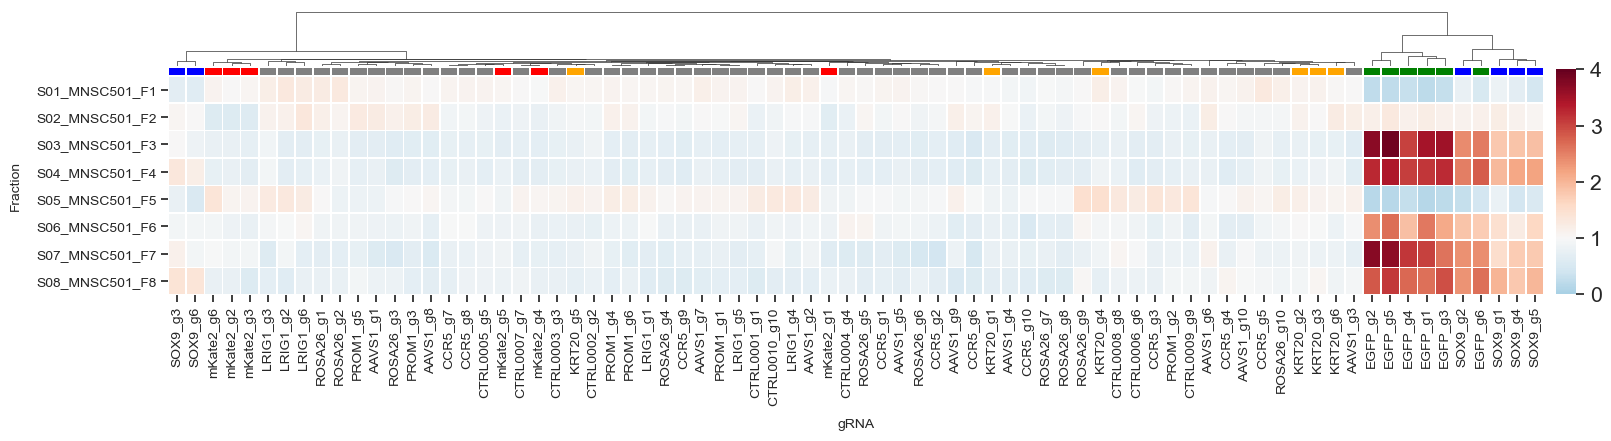

In [154]:
heatmap(S1A, S1B, log_scale=False)

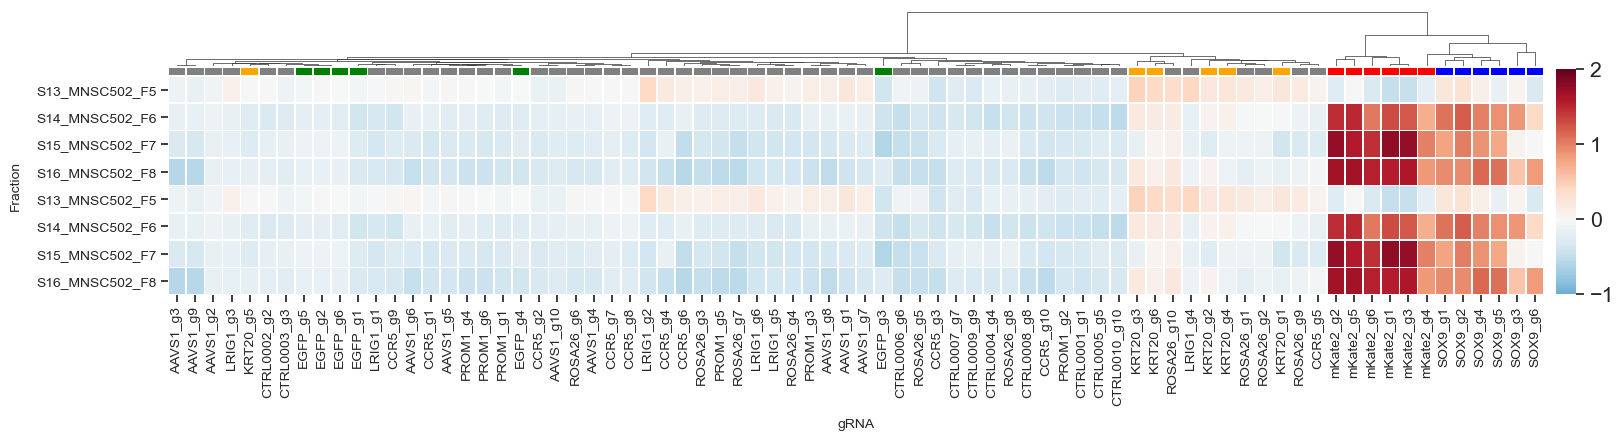

In [155]:
heatmap(S2A, S2A)

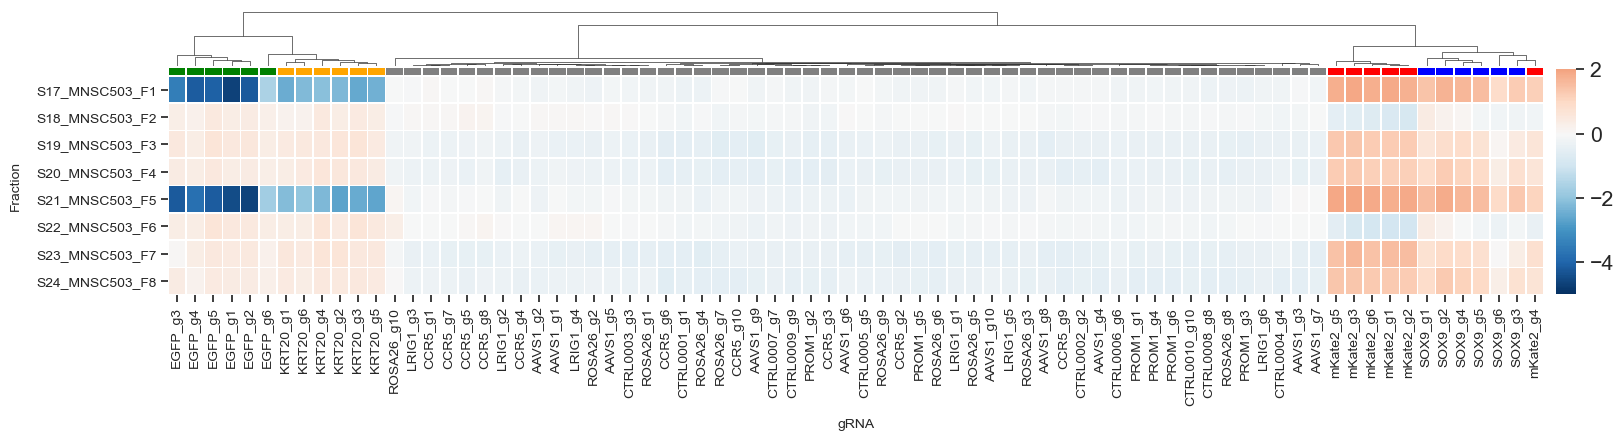

In [156]:
heatmap(S3A, S3B)

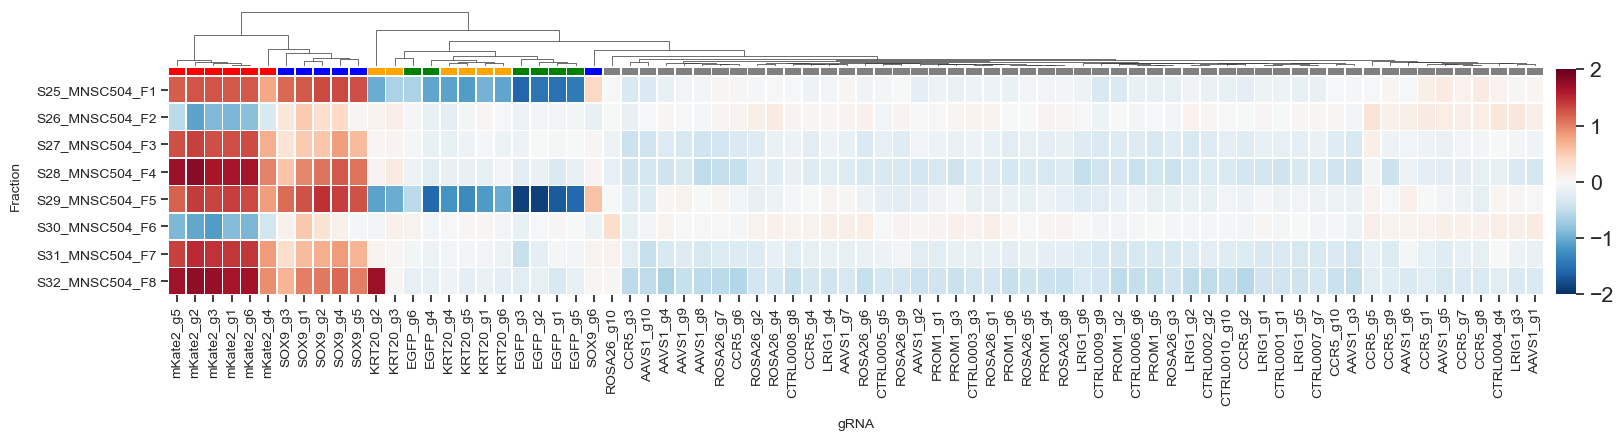

In [157]:
heatmap(S4A, S4B)

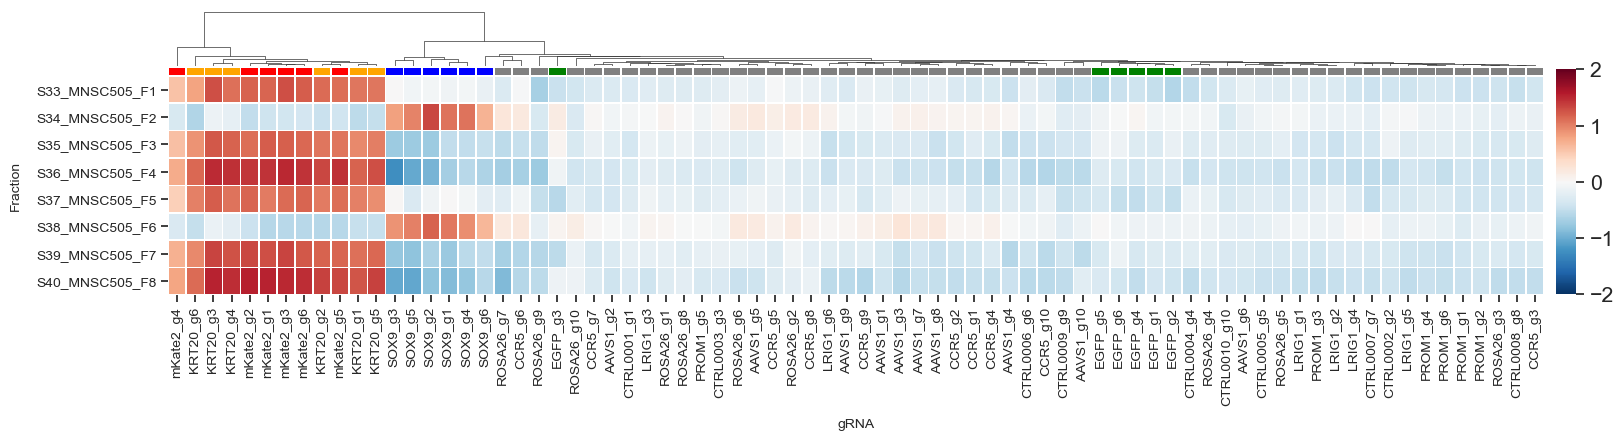

In [158]:
heatmap(S5A, S5B)

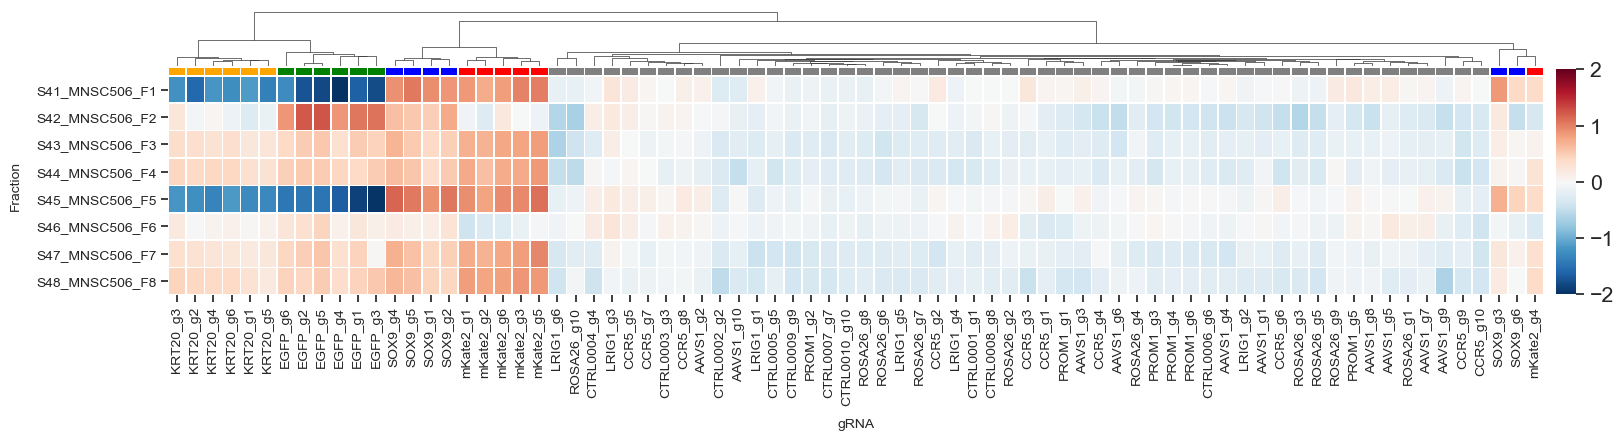

In [159]:
heatmap(S6A, S6B)

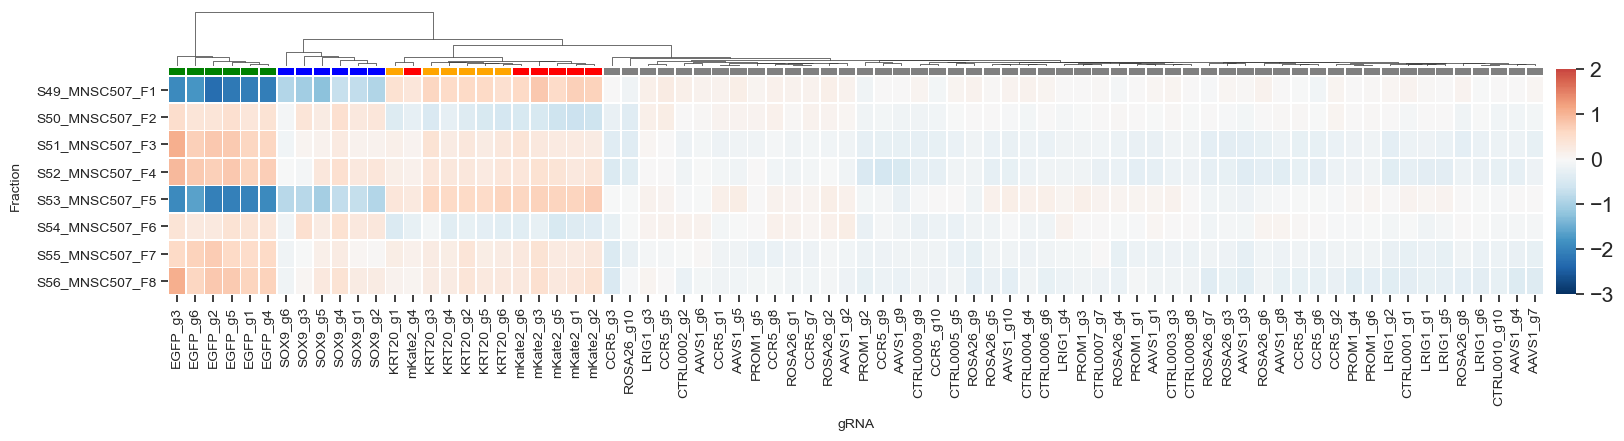

In [160]:
heatmap(S7A, S7B)

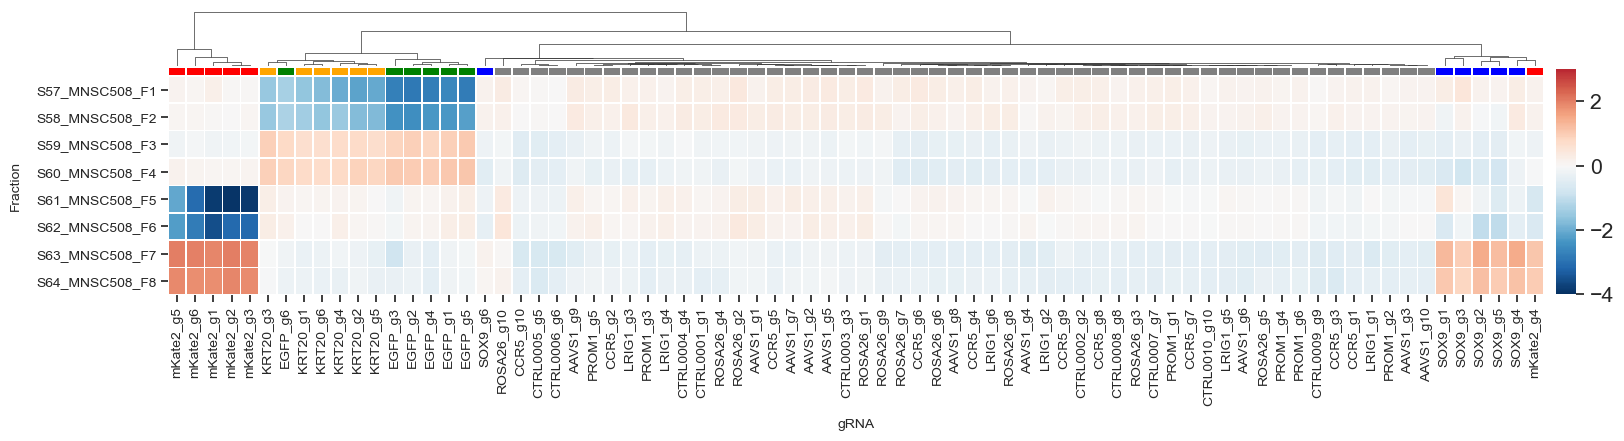

In [161]:
heatmap(S8A, S8B)

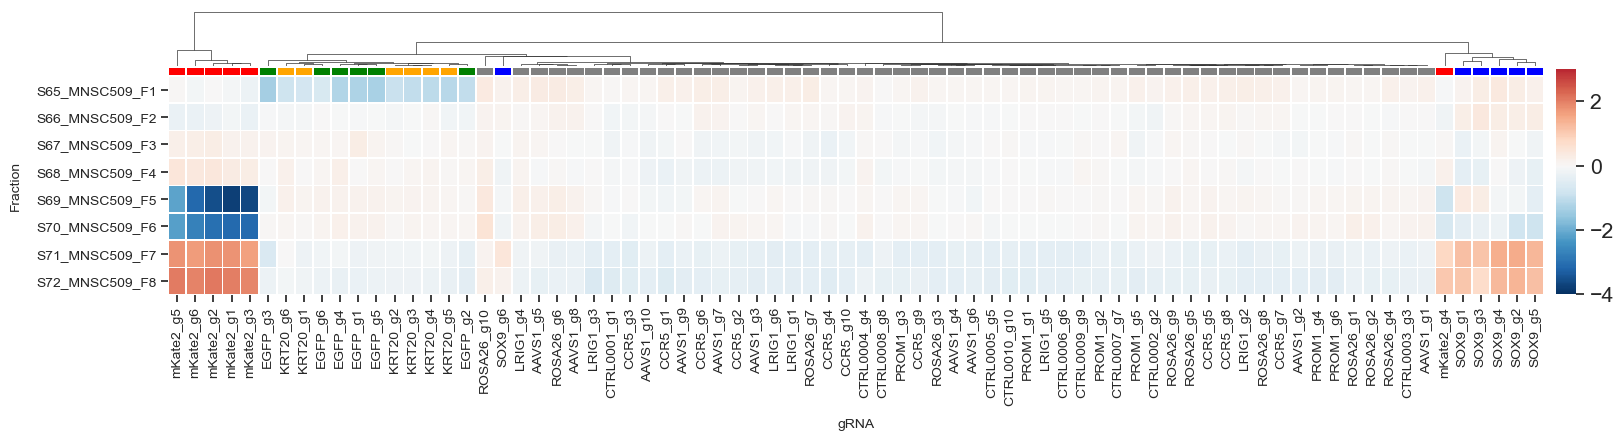

In [162]:
heatmap(S9A, S9B)

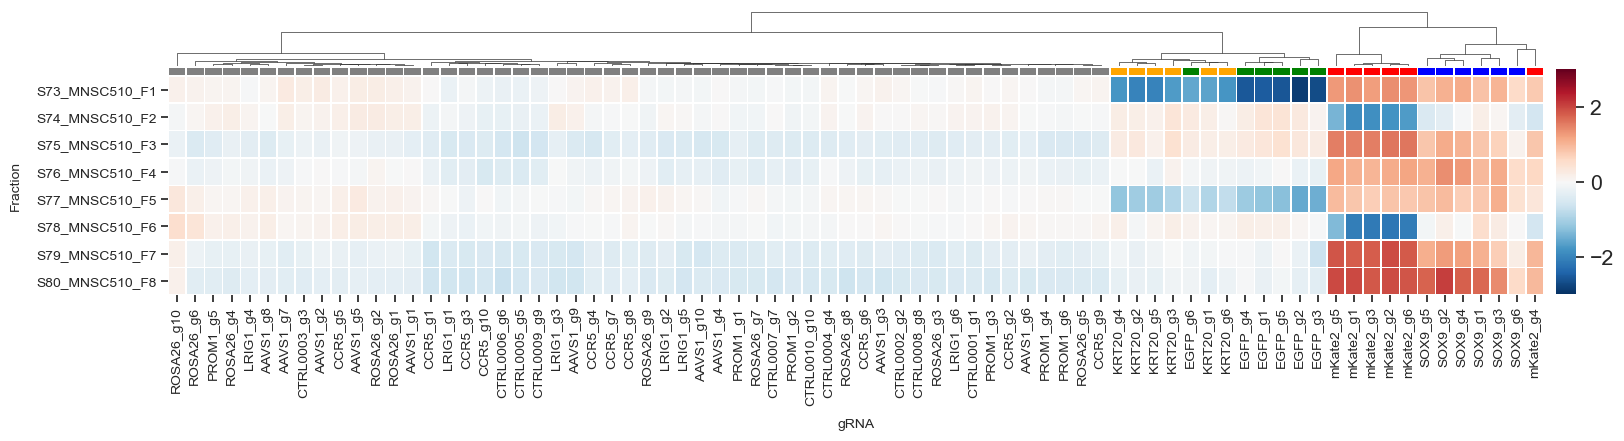

In [163]:
heatmap(S10A, S10B)

# Volcano Plot

In [55]:
def volcano(norm_read_1, norm_read_2):
    plt.style.use('default')
    mean_df = (norm_read_1.dropna().reset_index(drop=True) + norm_read_2.dropna().reset_index(drop=True)).div(2)

    hue = [x.split("_")[0] for x in norm_read_1.columns]
    hue = [x if x in ['SOX9', "EGFP", "KRT20", "mKate2"] else "Other" for x in hue ]
    name_dict = {0:"GFP_A", 1:"mCherry_B", 2:"Negative_C", 3:"Negative_D"}

    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

    lfc_01 = mean_df.iloc[0, :].div(mean_df.iloc[1, :])
    pvalue_01 = [stats.ttest_ind([norm_read_1.iloc[1, i], norm_read_2.iloc[1, i]], [norm_read_1.iloc[0, i], norm_read_2.iloc[0, i]], equal_var=False)[1] for i in range(76)]
    plot_01 = pd.DataFrame(columns = ['log2FC', 'p-value'])
    
    
    plot_01['log2FC'] = np.log2(lfc_01)
    plot_01['p-value'] = -np.log10(pvalue_01)
    plot_01['Gene'] = hue
    sns.scatterplot(x=plot_01.iloc[:,0], y=plot_01.iloc[:,1], hue=plot_01['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[0],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    ax[0].set_title(name_dict[0] + " vs. " + name_dict[1], size=20, pad=20)
    ax[0].set_xlim(-np.ceil(max(abs(plot_01['log2FC']))),np.ceil(max(abs(plot_01['log2FC']))))
    ax[0].set_ylim(0,np.ceil(max(abs(plot_01['p-value']))))
    ax[0].legend(loc=1)
    ax[0].set_ylabel("-" +r'$\log_{10}$'+ "(P-Value)", size=10)
    ax[0].set_xlabel(r'$\log_2$'+ "(Fold Change of " + name_dict[0] + "/" + name_dict[1] + ")", size=10)

    lfc_02 = mean_df.iloc[0, :].div(mean_df.iloc[2, :])
    pvalue_02 = [stats.ttest_ind([norm_read_1.iloc[2, i], norm_read_2.iloc[2, i]], [norm_read_1.iloc[0, i], norm_read_2.iloc[0, i]], equal_var=False)[1] for i in range(76)]
    plot_02 = pd.DataFrame(columns = ['log2FC', 'p-value'])
    plot_02['log2FC'] = np.log2(lfc_02)
    plot_02['p-value'] = -np.log10(pvalue_02)
    plot_02['Gene'] = hue
    sns.scatterplot(x=plot_02.iloc[:,0], y=plot_02.iloc[:,1], hue=plot_02['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[1],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    ax[1].set_title(name_dict[0] + " vs. " + name_dict[2], size=20, pad=20)
    ax[1].set_xlim(-np.ceil(max(abs(plot_02['log2FC']))),np.ceil(max(abs(plot_02['log2FC']))))
    ax[1].set_ylim(0,np.ceil(max(abs(plot_02['p-value']))))
    ax[1].legend(loc=1)
    ax[1].set_ylabel("-" +r'$\log_{10}$'+ "(P-Value)", size=10)
    ax[1].set_xlabel(r'$\log_2$'+ "(Fold Change of " + name_dict[0] + "/" + name_dict[2] + ")", size=10)

    lfc_03 = mean_df.iloc[0, :].div(mean_df.iloc[3, :])
    pvalue_03 = [stats.ttest_ind([norm_read_1.iloc[3, i], norm_read_2.iloc[3, i]], [norm_read_1.iloc[0, i], norm_read_2.iloc[0, i]], equal_var=False)[1] for i in range(76)]
    plot_03 = pd.DataFrame(columns = ['log2FC', 'p-value'])
    plot_03['log2FC'] = np.log2(lfc_03)
    plot_03['p-value'] = -np.log10(pvalue_03)
    plot_03['Gene'] = hue
    sns.scatterplot(x=plot_03.iloc[:,0], y=plot_03.iloc[:,1], hue=plot_03['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[2],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    ax[2].set_title(name_dict[0] + " vs. " + name_dict[3], size=20, pad=20)
    ax[2].set_xlim(-np.ceil(max(abs(plot_03['log2FC']))),np.ceil(max(abs(plot_03['log2FC']))))
    ax[2].set_ylim(0,np.ceil(max(abs(plot_03['p-value']))))
    ax[2].legend(loc=1)
    ax[2].set_ylabel("-" +r'$\log_{10}$'+ "(P-Value)", size=10)
    ax[2].set_xlabel(r'$\log_2$'+ "(Fold Change of " + name_dict[0] + "/" + name_dict[3] + ")", size=10)

    lfc_12 = mean_df.iloc[1, :].div(mean_df.iloc[2, :])
    pvalue_12 = [stats.ttest_ind([norm_read_1.iloc[2, i], norm_read_2.iloc[2, i]], [norm_read_1.iloc[1, i], norm_read_2.iloc[1, i]], equal_var=False)[1] for i in range(76)]
    plot_12 = pd.DataFrame(columns = ['log2FC', 'p-value'])
    plot_12['log2FC'] = np.log2(lfc_12)
    plot_12['p-value'] = -np.log10(pvalue_12)
    plot_12['Gene'] = hue
    sns.scatterplot(x=plot_12.iloc[:,0], y=plot_12.iloc[:,1], hue=plot_12['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[3],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    ax[3].set_title(name_dict[1] + " vs. " + name_dict[2], size=20, pad=20)
    ax[3].set_xlim(-np.ceil(max(abs(plot_12['log2FC']))),np.ceil(max(abs(plot_12['log2FC']))))
    ax[3].set_ylim(0,np.ceil(max(abs(plot_12['p-value']))))
    ax[3].legend(loc=1)
    ax[3].set_ylabel("-" +r'$\log_{10}$'+ "(P-Value)", size=10)
    ax[3].set_xlabel(r'$\log_2$'+ "(FC of " + name_dict[1] + "/" + name_dict[2] + ")", size=10)

    lfc_13 = mean_df.iloc[1, :].div(mean_df.iloc[3, :])
    pvalue_13 = [stats.ttest_ind([norm_read_1.iloc[3, i], norm_read_2.iloc[3, i]], [norm_read_1.iloc[1, i], norm_read_2.iloc[1, i]], equal_var=False)[1] for i in range(76)]
    plot_13 = pd.DataFrame(columns = ['log2FC', 'p-value'])
    plot_13['log2FC'] = np.log2(lfc_13)
    plot_13['p-value'] = -np.log10(pvalue_13)
    plot_13['Gene'] = hue
    sns.scatterplot(x=plot_13.iloc[:,0], y=plot_13.iloc[:,1], hue=plot_13['Gene'], linewidth = 0.5, edgecolor="Black",ax=ax[4],palette={'EGFP':"green", 'KRT20':"orange", 'SOX9':"blue", 'mKate2':"red", 'Other':"grey"})
    ax[4].set_title(name_dict[1] + " vs. " + name_dict[3], size=20, pad=20)
    ax[4].set_xlim(-np.ceil(max(abs(plot_13['log2FC']))),np.ceil(max(abs(plot_13['log2FC']))))
    ax[4].set_ylim(0,np.ceil(max(abs(plot_13['p-value']))))
    ax[4].legend(loc=1)
    ax[4].set_ylabel("-" +r'$\log_{10}$'+ "(P-Value)", size=10)
    ax[4].set_xlabel(r'$\log_2$'+ "(FC of " + name_dict[1] + "/" + name_dict[3] + ")", size=10)

    plt.show()

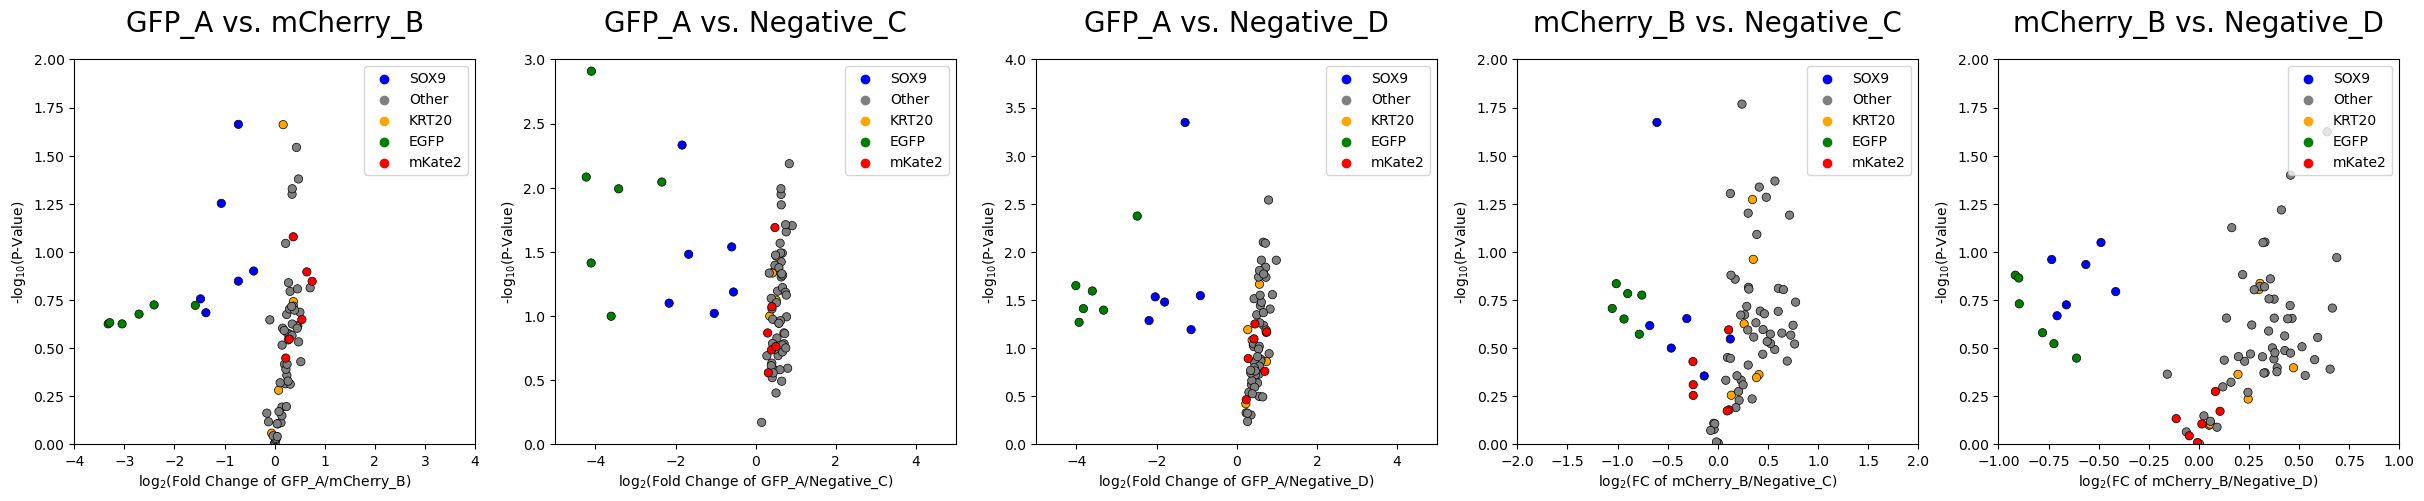

In [56]:
volcano(S1A, S1B)

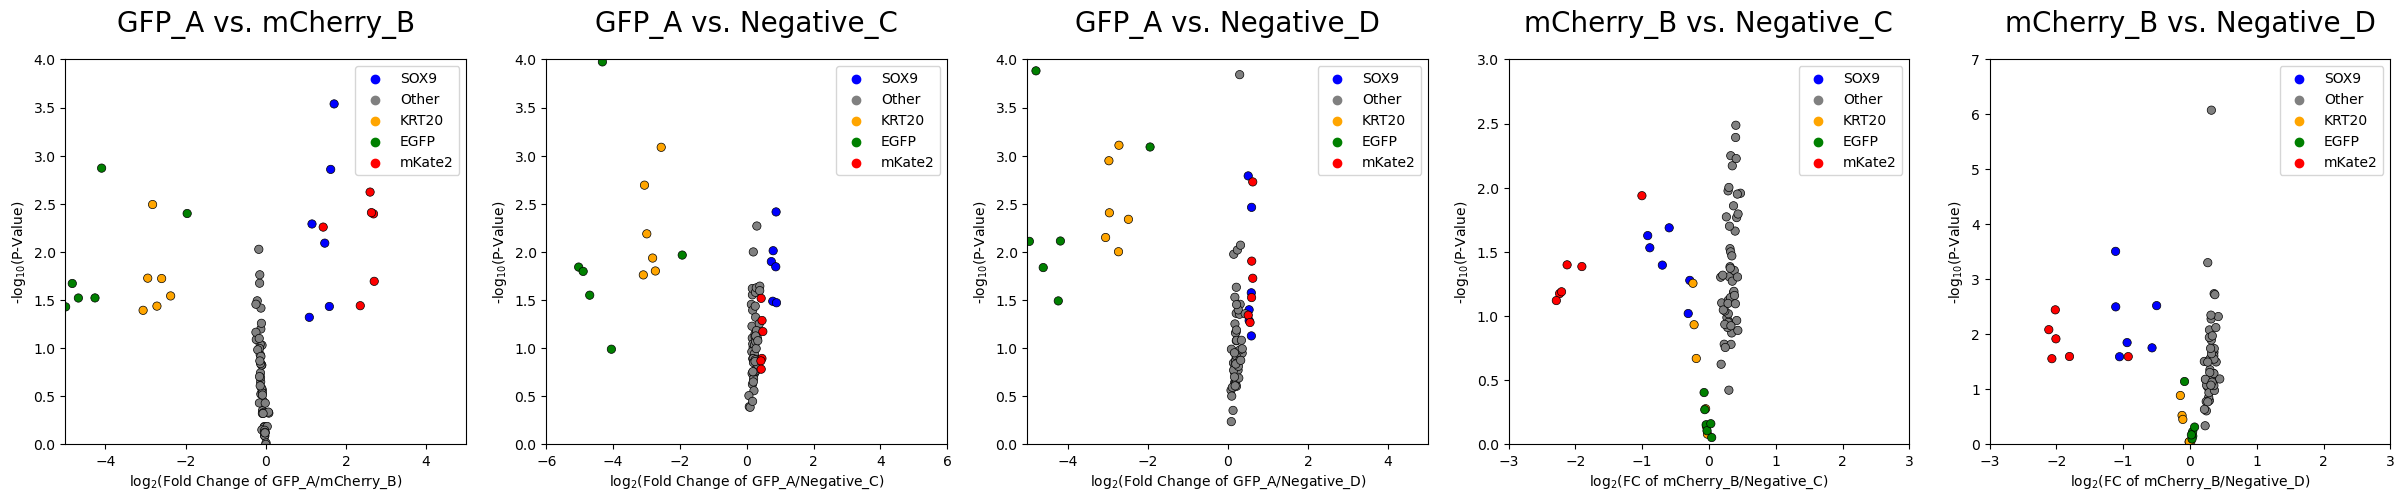

In [57]:
volcano(S3A, S3B)

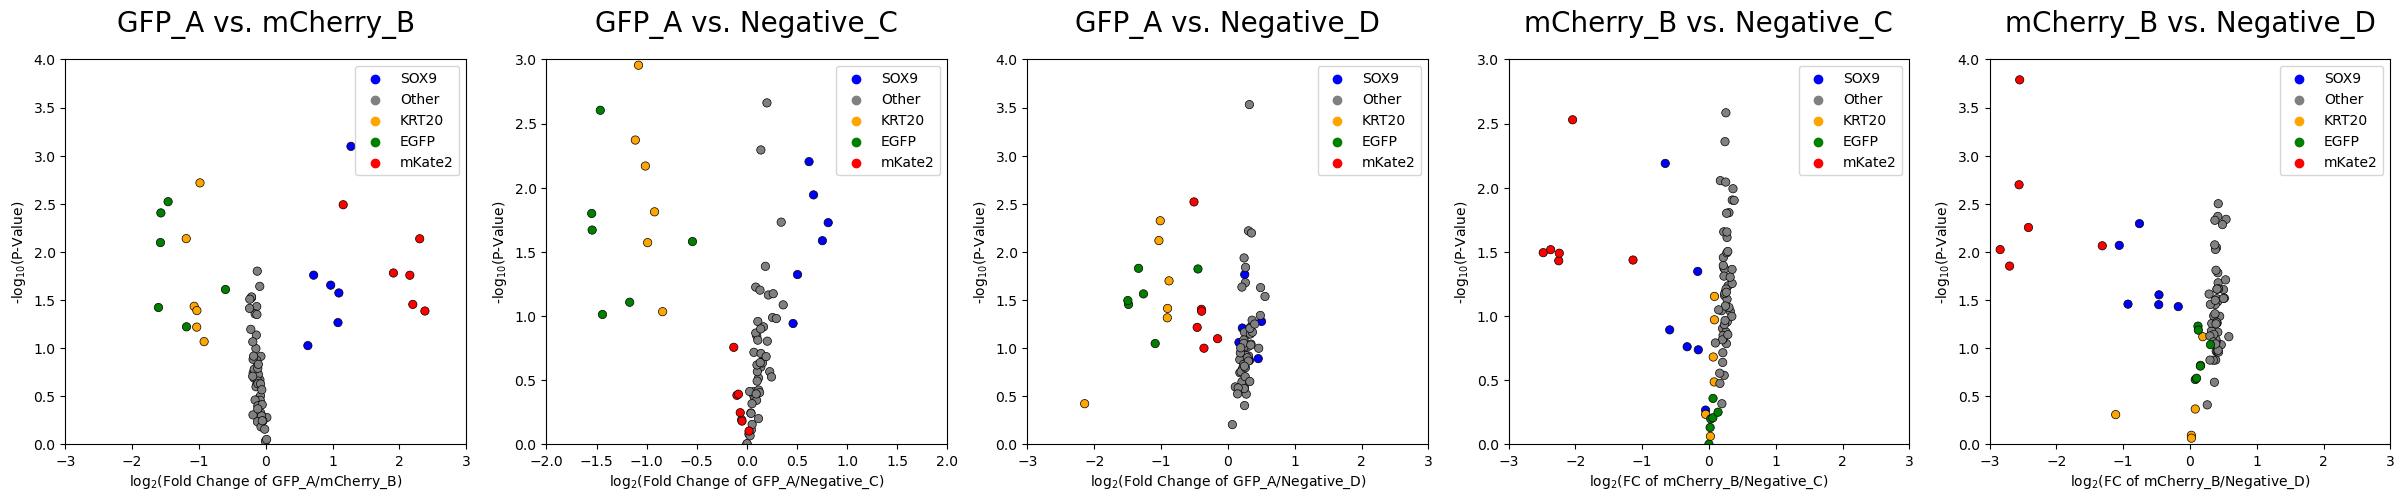

In [58]:
volcano(S4A, S4B)

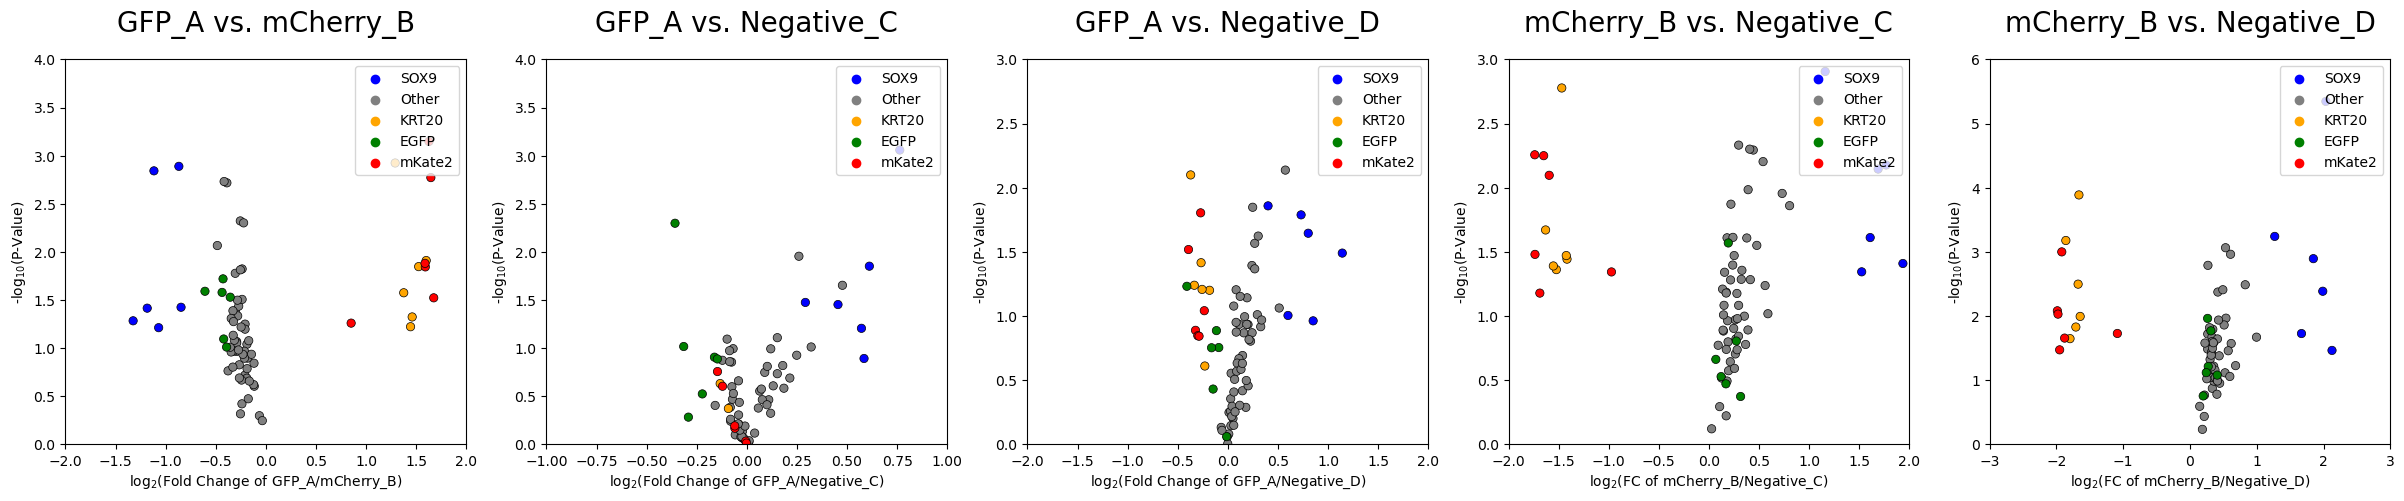

In [59]:
volcano(S5A, S5B)

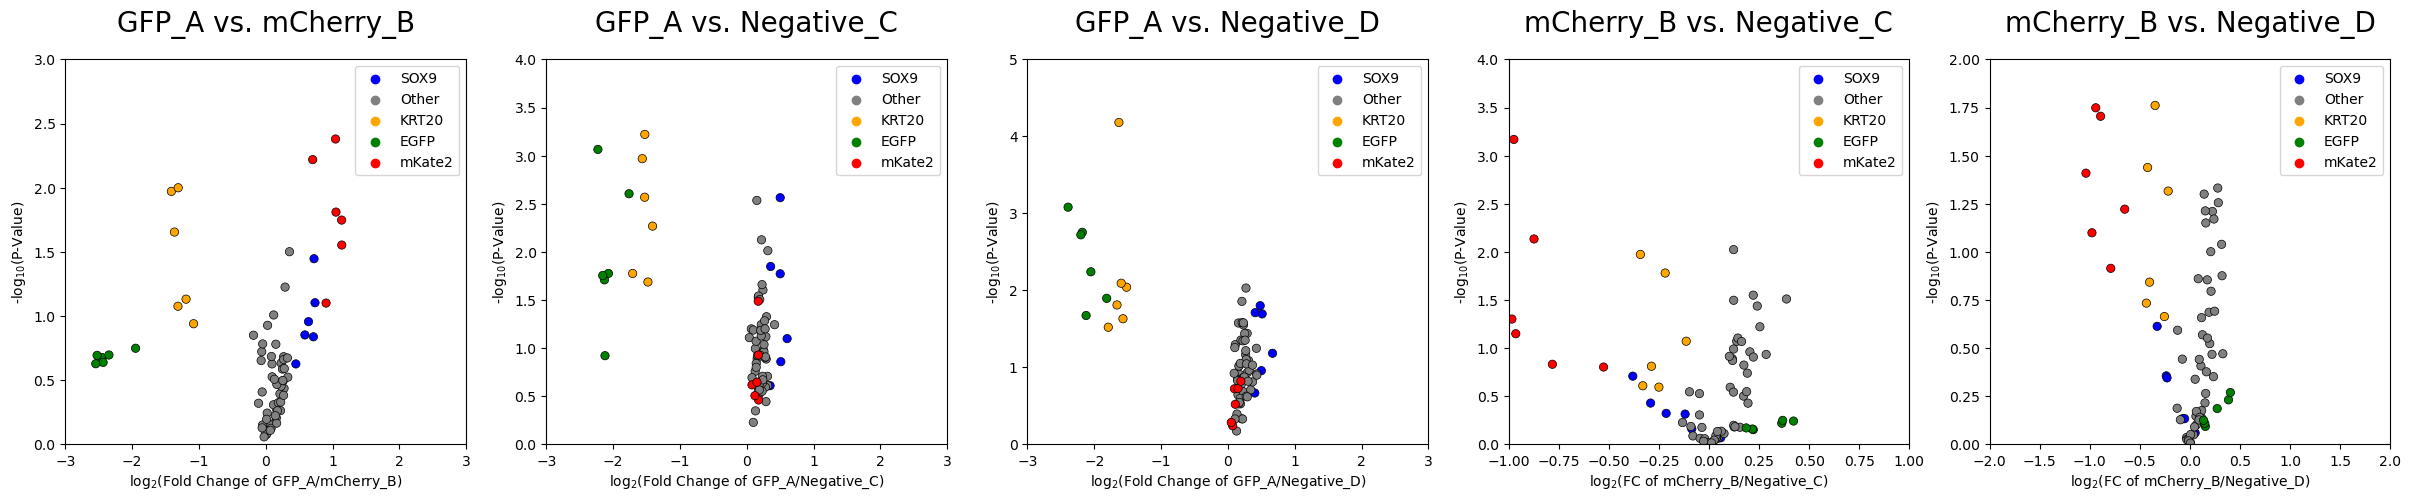

In [60]:
volcano(S6A, S6B)

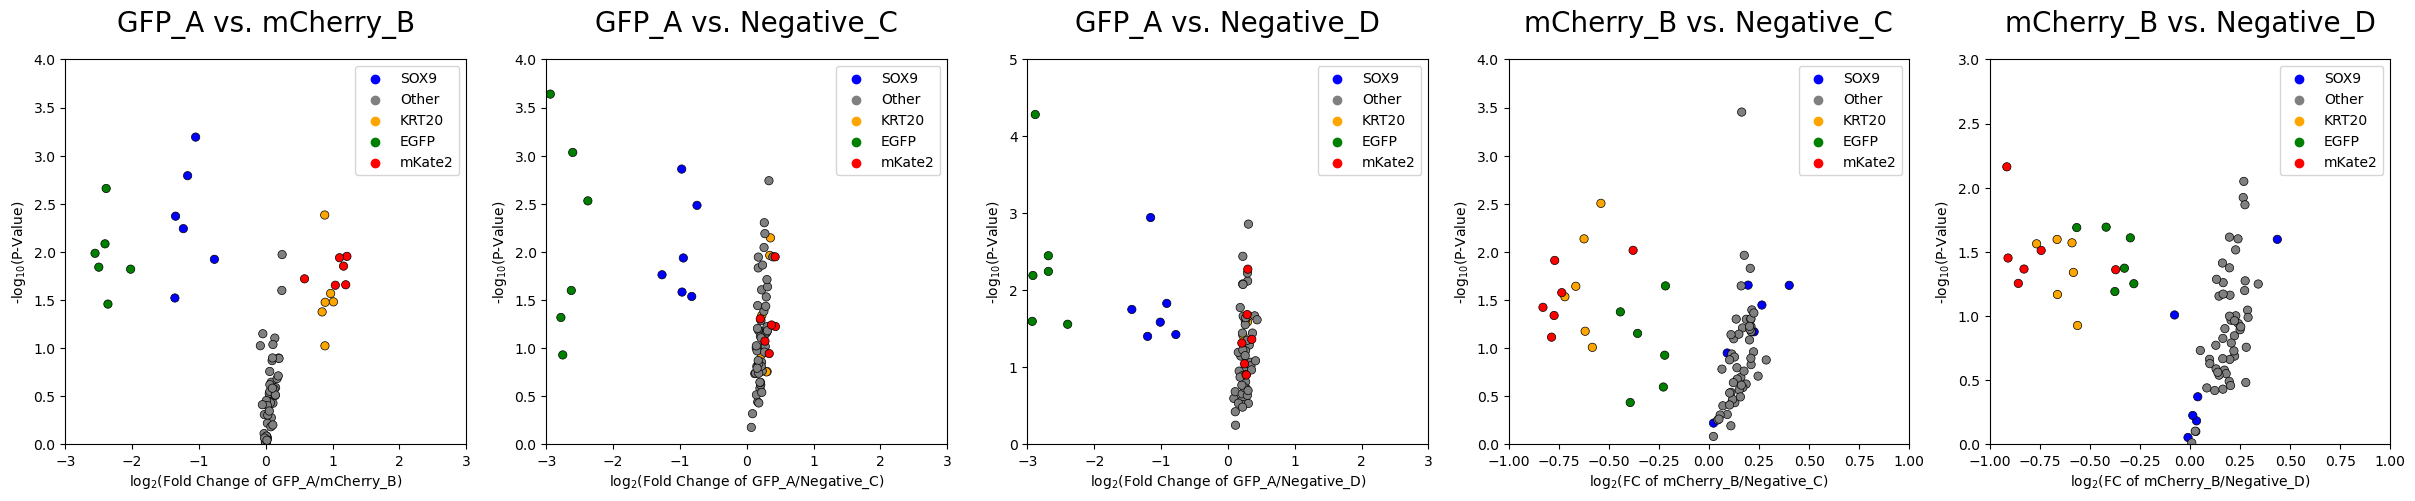

In [61]:
volcano(S7A, S7B)

# Fold Change Density Distribution

In [26]:
from matplotlib.colors import LinearSegmentedColormap

In [27]:
def replace_sub(gene_list, substring, replacement):
    return [replacement if substring in word else word for word in gene_list]

In [28]:
def density_format(df):

    mageck = df.T.copy()
    gene_list = [identifier.split("_")[0] for identifier in mageck.index]
    gene_list = replace_sub(gene_list, substring='CTRL', replacement='CTRL')
    mageck['Gene'] = gene_list
    mageck.reset_index(inplace=True, drop=True)
    return mageck

In [48]:

def density(df, baseline_index, comparison_index):
    name_dict = {0:"GFP_A", 1:"mCherry_B", 2:"Negative_C", 3:"Negative_D"}
    format_df = density_format(df)
    fc_df = np.log2(format_df.iloc[:, comparison_index].div(format_df.iloc[:, baseline_index]))

    mean = np.mean(fc_df)
    std = np.std(fc_df)

    maximum = mean + 3* std
    maximum = mean - 3* std

    plt.style.use('default')
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    ax1 = fc_df.plot.kde(c="black", ax = ax1)
    ax1.set_xlim(min(fc_df) - std ,max(fc_df) + std)
    ax1.set_ylim(0,)


    ax2.set_facecolor('lightgrey')
    egfp = format_df[format_df['Gene'] == "EGFP"]
    for i in range(len(egfp)):
        ax2.plot([np.log2(egfp.iloc[:, comparison_index].div(egfp.iloc[:, baseline_index])), 
                  np.log2(egfp.iloc[:, comparison_index].div(egfp.iloc[:, baseline_index]))], 
                 [-1, 1], c = "green")
    ax2.set_yticks([])
    ax2.set_ylabel("EGFP", labelpad=15)

    n=1
    gradient = np.linspace(0, 1, 100).reshape(1, -1)
    ax2.imshow(gradient , extent=[mean-3*std, mean+3*std, -1, n], aspect='auto', cmap=LinearSegmentedColormap.from_list('mycmap', ['lightgray', 'black', 'lightgray']))

    #mKate2
    ax3.set_facecolor('lightgrey')
    mkate = format_df[format_df['Gene'] == "mKate2"]
    for i in range(len(egfp)):
        ax3.plot([np.log2(mkate.iloc[:, comparison_index].div(mkate.iloc[:, baseline_index])), 
                  np.log2(mkate.iloc[:, comparison_index].div(mkate.iloc[:, baseline_index]))], 
                 [-1, 1], c = "red")
    ax3.set_yticks([])
    ax3.set_ylabel("mKate2", labelpad=15)
    ax3.imshow(gradient , extent=[mean-3*std, mean+3*std, -1, n], aspect='auto', cmap=LinearSegmentedColormap.from_list('mycmap', ['lightgray', 'black', 'lightgray']))

    #SOX9
    ax4.set_facecolor('lightgrey')
    sox9 = format_df[format_df['Gene'] == "SOX9"]
    for i in range(len(sox9)):
        ax4.plot([np.log2(sox9.iloc[:, comparison_index].div(sox9.iloc[:, baseline_index])), 
                  np.log2(sox9.iloc[:, comparison_index].div(sox9.iloc[:, baseline_index]))], 
                 [-1, 1], c = "blue")
    ax4.set_yticks([])
    ax4.set_ylabel("SOX9", labelpad=15)
    ax4.imshow(gradient , extent=[mean-3*std, mean+3*std, -1, n], aspect='auto', cmap=LinearSegmentedColormap.from_list('mycmap', ['lightgray', 'black', 'lightgray']))

    #KRT20
    ax5.set_facecolor('lightgrey')
    krt20 = format_df[format_df['Gene'] == "KRT20"]
    for i in range(len(krt20)):
        ax5.plot([np.log2(krt20.iloc[:, comparison_index].div(krt20.iloc[:, baseline_index])), 
                  np.log2(krt20.iloc[:, comparison_index].div(krt20.iloc[:, baseline_index]))], 
                 [-1, 1], c = "orange")
    ax5.set_yticks([])
    ax5.set_ylabel("KRT20", labelpad=15)
    ax5.set_xlabel("Log2 Fold Change", labelpad=15)
    ax5.imshow(gradient , extent=[mean-3*std, mean+3*std, -1, n], aspect='auto', cmap=LinearSegmentedColormap.from_list('mycmap', ['lightgray', 'black', 'lightgray']))

    plt.show()

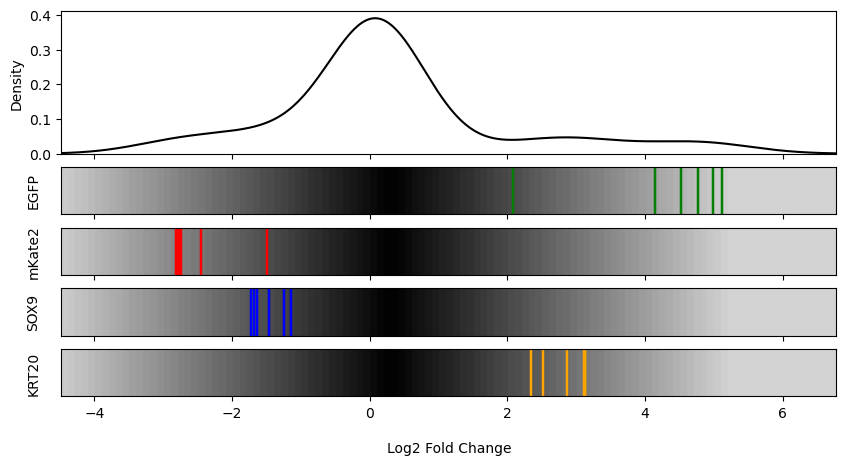

In [23]:
density(S1A, 0, 1)

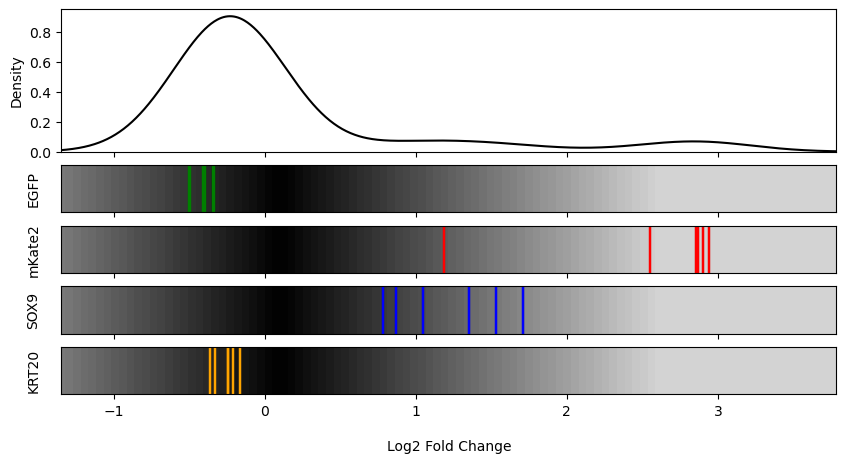

In [223]:
density(S10A, 1, 3)

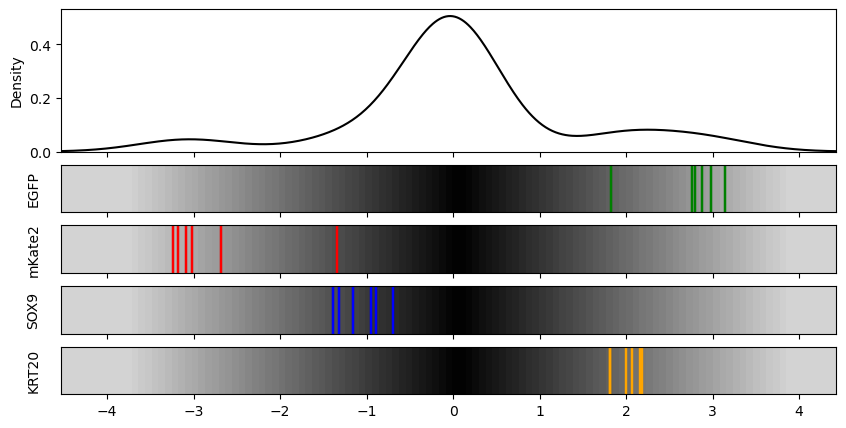

In [66]:
density(S10A, 0, 1)

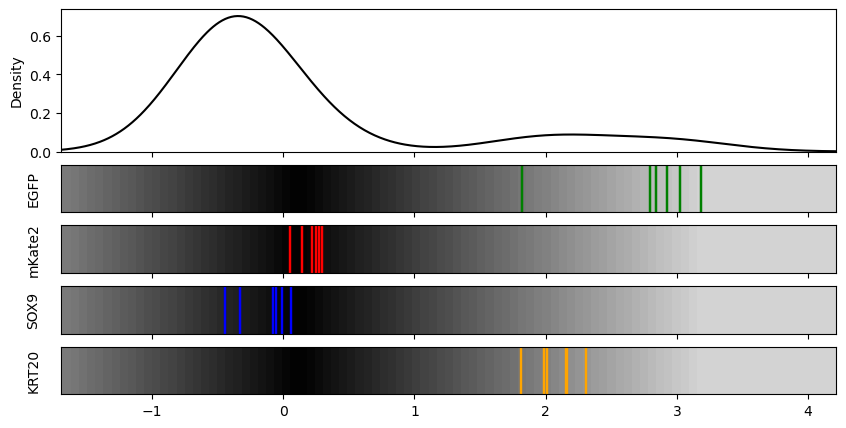

In [67]:
density(S10A, 0, 2)

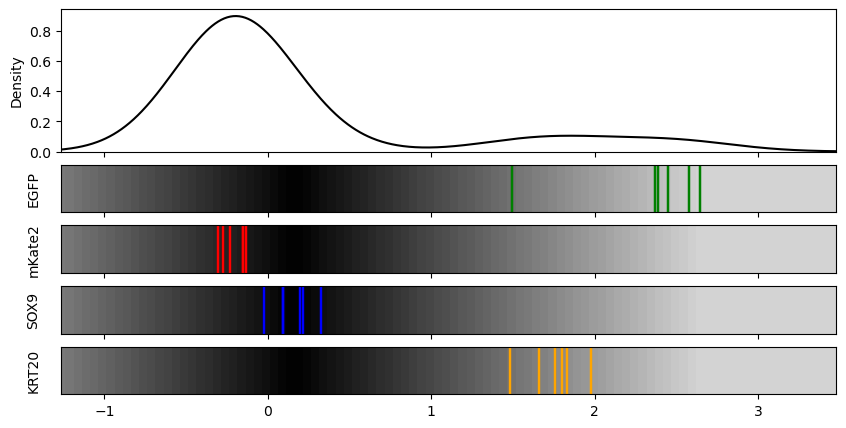

In [68]:
density(S10A, 0, 3)

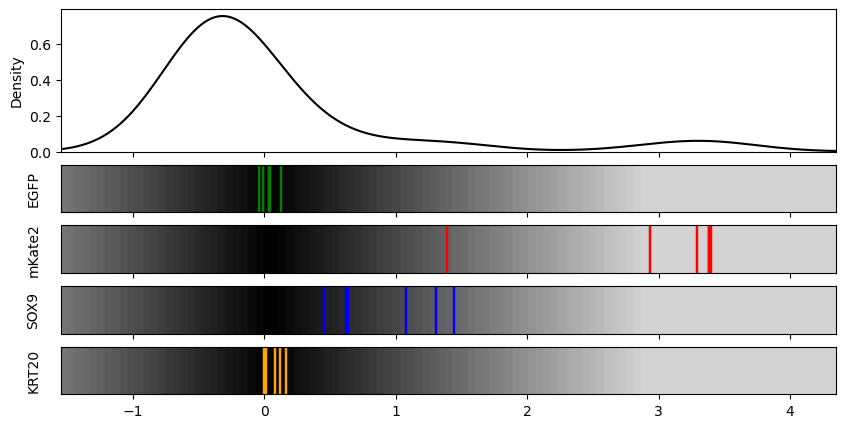

In [69]:
density(S10A, 1, 2)

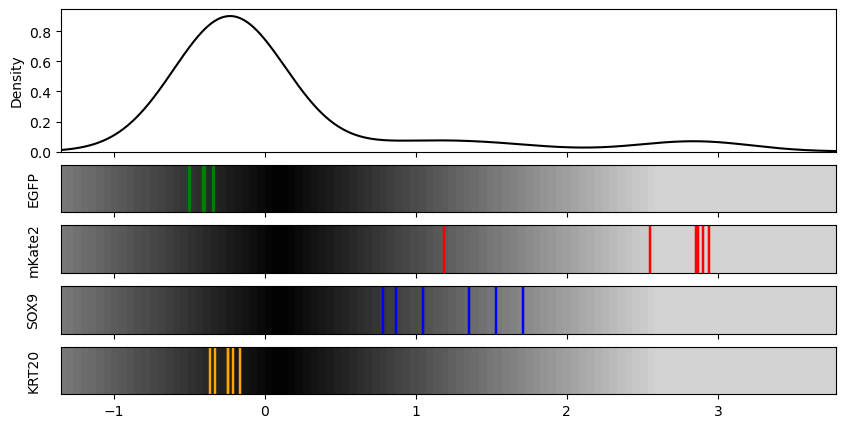

In [70]:
density(S10A, 1, 3)

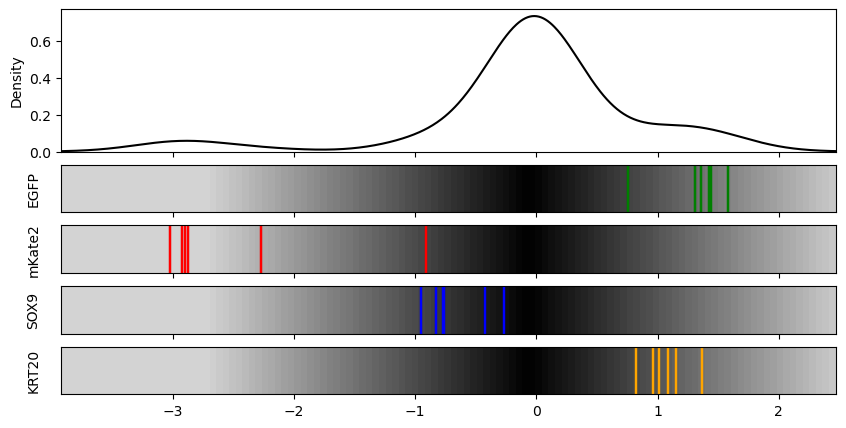

In [71]:
density(S10B, 0, 1)

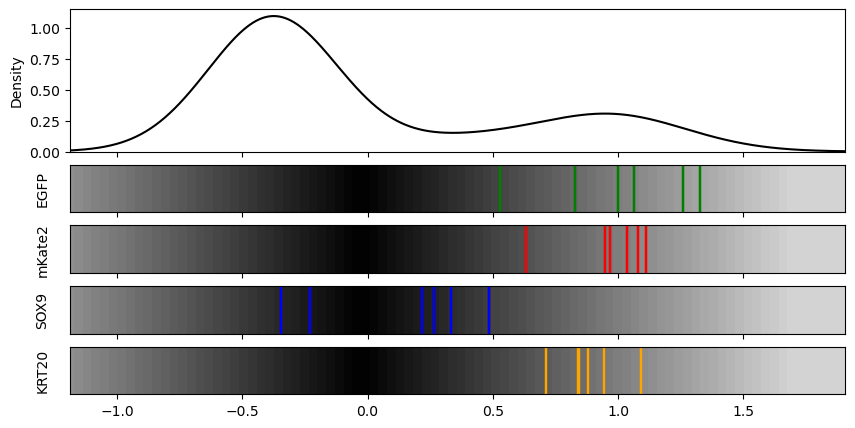

In [72]:
density(S10B, 0, 2)

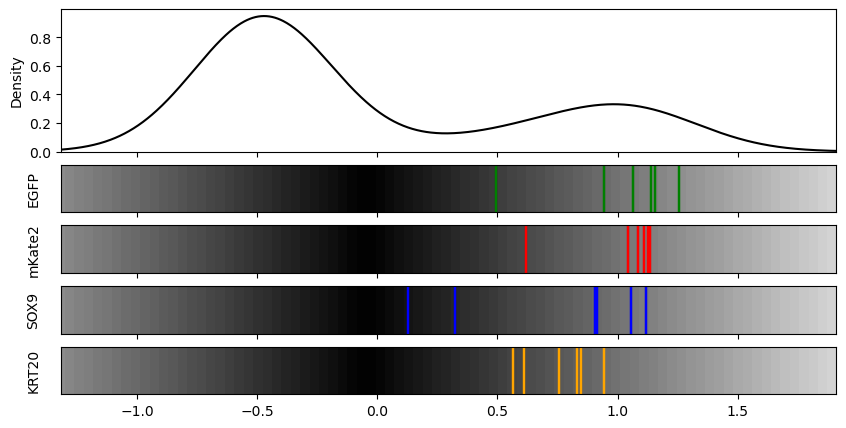

In [73]:
density(S10B, 0, 3)

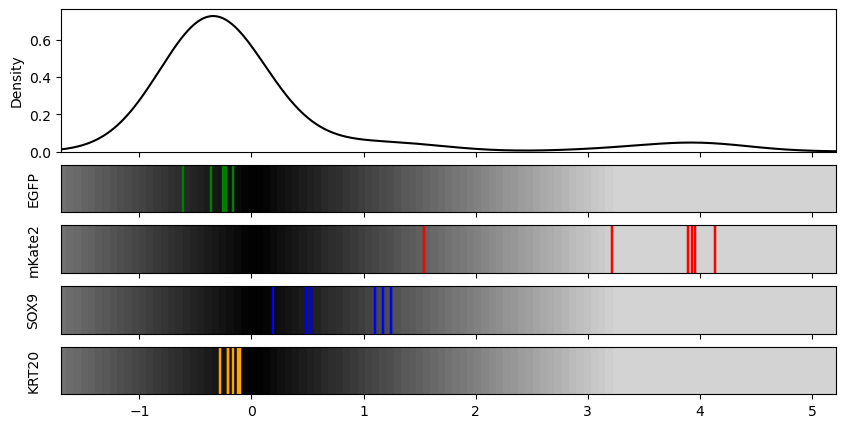

In [74]:
density(S10B, 1, 2)

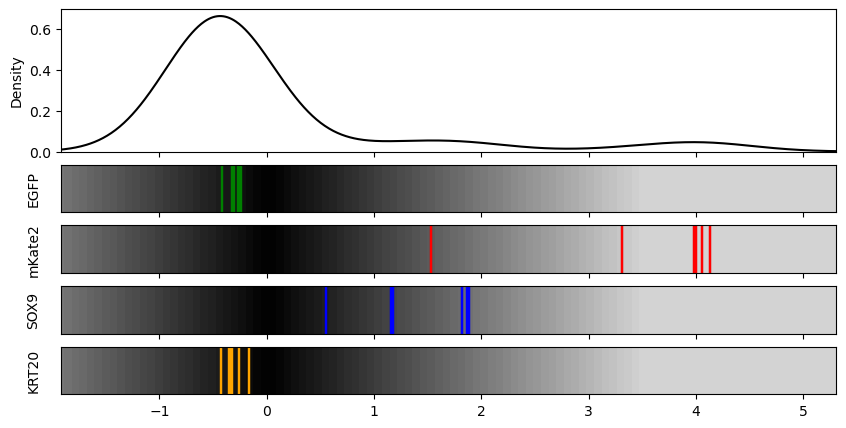

In [75]:
density(S10B, 1, 3)

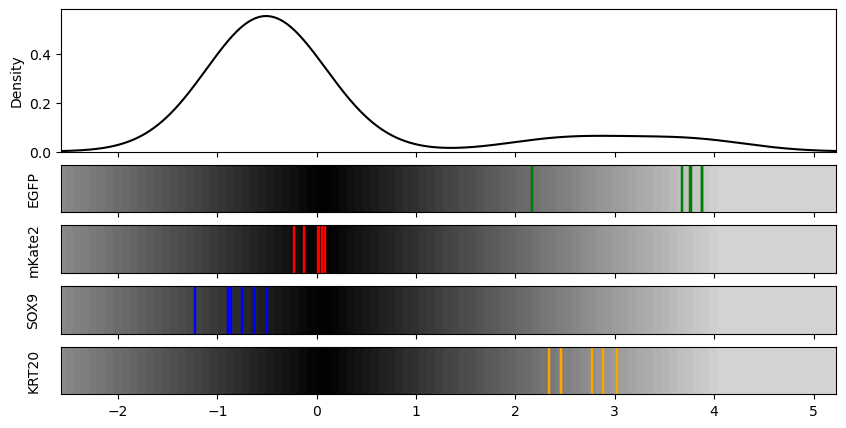

In [76]:
density(S8A, 0, 3)

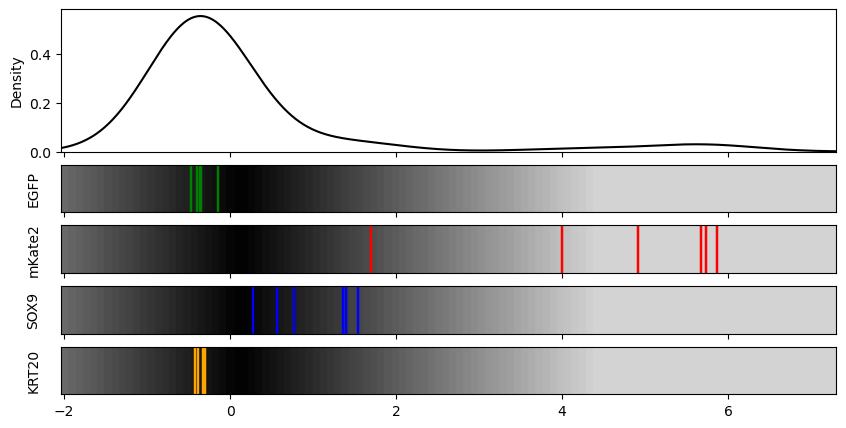

In [77]:
density(S8B, 0, 3)

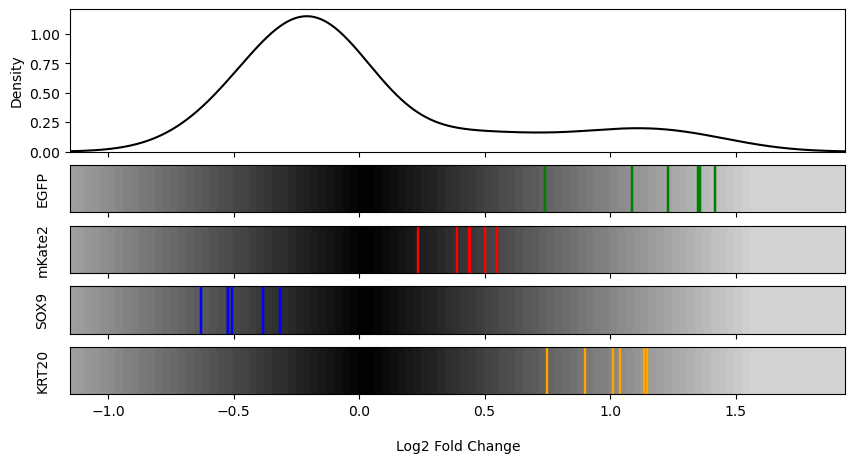

In [25]:
density(S9A, 0, 3)

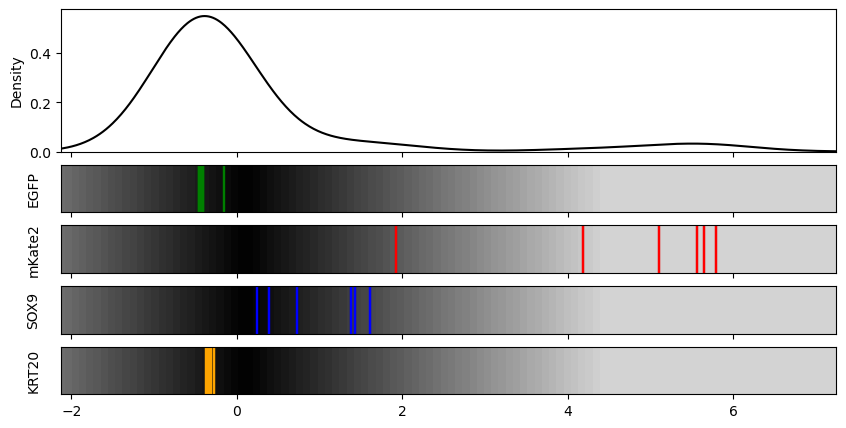

In [79]:
density(S9B, 0, 3)

# MaGeCK MLE Beta Score

In [28]:
def read_format(norm_read):
    df = norm_read.T.copy()
    gene = [x.split("_")[0] for x in df.index]
    gene = ["CTRL" if "CTRL" in x else x for x in gene]
    df.insert(0, "Gene", gene)
    df.insert(0, "sgRNA", df.index)
    df.reset_index(inplace=True, drop=True)
    return df

### Save read counts for each population 

In [81]:
def read_save(reads, name):
    read_format(reads).to_csv('/Users/davidchen/Documents/GitHub/Sandor_David/Miniscreen05/MaGeCK/' + str(name) + ".txt", index=None, sep='\t', mode='w+')

In [82]:
read_save(reads.iloc[0:4, :], "S1A")
read_save(reads.iloc[4:8, :], "S1B")
read_save(reads.iloc[12:16, :], "S2A")
read_save(reads.iloc[16:20, :], "S3A")
read_save(reads.iloc[20:24, :], "S3B")
read_save(reads.iloc[24:28, :], "S4A")
read_save(reads.iloc[28:32, :], "S4B")
read_save(reads.iloc[32:36, :], "S5A")
read_save(reads.iloc[36:40, :], "S5B")
read_save(reads.iloc[40:44, :], "S6A")
read_save(reads.iloc[44:48, :], "S6B")
read_save(reads.iloc[48:52, :], "S7A")
read_save(reads.iloc[52:56, :], "S7B")
read_save(reads.iloc[56:60, :], "S8A")
read_save(reads.iloc[60:64, :], "S8B")
read_save(reads.iloc[64:68, :], "S9A")
read_save(reads.iloc[68:72, :], "S9B")
read_save(reads.iloc[72:76, :], "S10A")
read_save(reads.iloc[76:80, :], "S10B")

### Prepare design matrix file for MaGeCK MLE

In [83]:
def design_matrix(norm_read, baseline):
    design_matrix = pd.DataFrame(columns = ["Samples", "baseline"])

    if baseline == "GFP":
        design_matrix['Samples'] = list(norm_read.index) 
        design_matrix['baseline'] = 1
        design_matrix[norm_read.index[1]] = [0,1,0,0]
        design_matrix[norm_read.index[2]] = [0,0,1,0]
        design_matrix[norm_read.index[3]] = [0,0,0,1]
    else:
        design_matrix['Samples'] = list(norm_read.index[[1]]) + list(norm_read.index[[0]]) + list(norm_read.index[[2]]) + list(norm_read.index[[3]])
        design_matrix['baseline'] = 1
        design_matrix[norm_read.index[0]] = [0,1,0,0]
        design_matrix[norm_read.index[2]] = [0,0,1,0]
        design_matrix[norm_read.index[3]] = [0,0,0,1]
        
    return design_matrix

In [84]:
design_matrix(S10A, "GFP")

Samples  baseline  S74_MNSC510_F2  S75_MNSC510_F3  S76_MNSC510_F4
0  S73_MNSC510_F1         1               0               0               0
1  S74_MNSC510_F2         1               1               0               0
2  S75_MNSC510_F3         1               0               1               0
3  S76_MNSC510_F4         1               0               0               1

In [85]:
design_matrix(S10A, "mCherry")

Samples  baseline  S73_MNSC510_F1  S75_MNSC510_F3  S76_MNSC510_F4
0  S74_MNSC510_F2         1               0               0               0
1  S73_MNSC510_F1         1               1               0               0
2  S75_MNSC510_F3         1               0               1               0
3  S76_MNSC510_F4         1               0               0               1

In [86]:
def design_matrix_save(norm_read, name, baseline):
    design_matrix(norm_read, baseline).to_csv('/Users/davidchen/Documents/GitHub/Sandor_David/Miniscreen05/MaGeCK/' + str(name) + "_" + baseline + "_design_matrix.txt", index=None, sep='\t', mode='w+')


In [87]:
design_matrix_save(S1A, "S1A", "GFP")
design_matrix_save(S1A, "S1A", "mCherry")
design_matrix_save(S1B, "S1B", "GFP")
design_matrix_save(S1B, "S1B", "mCherry")
design_matrix_save(S2A, "S2A", "GFP")
design_matrix_save(S2A, "S2A", "mCherry")
design_matrix_save(S3A, "S3A", "GFP")
design_matrix_save(S3A, "S3A", "mCherry")
design_matrix_save(S3B, "S3B", "GFP")
design_matrix_save(S3B, "S3B", "mCherry")
design_matrix_save(S4A, "S4A", "GFP")
design_matrix_save(S4A, "S4A", "mCherry")
design_matrix_save(S4B, "S4B", "GFP")
design_matrix_save(S4B, "S4B", "mCherry")
design_matrix_save(S5A, "S5A", "GFP")
design_matrix_save(S5A, "S5A", "mCherry")
design_matrix_save(S5B, "S5B", "GFP")
design_matrix_save(S5B, "S5B", "mCherry")
design_matrix_save(S6A, "S6A", "GFP")
design_matrix_save(S6A, "S6A", "mCherry")
design_matrix_save(S6B, "S6B", "GFP")
design_matrix_save(S6B, "S6B", "mCherry")
design_matrix_save(S7A, "S7A", "GFP")
design_matrix_save(S7A, "S7A", "mCherry")
design_matrix_save(S7B, "S7B", "GFP")
design_matrix_save(S7B, "S7B", "mCherry")

design_matrix_save(S10A, "S10A", "GFP")
design_matrix_save(S10A, "S10A", "mCherry")
design_matrix_save(S10B, "S10B", "GFP")
design_matrix_save(S10B, "S10B", "mCherry")

In [88]:
def design_matrix_sc(norm_read):
    design_matrix = pd.DataFrame(columns = ["Samples", "baseline"])

    design_matrix['Samples'] = list(norm_read.index) 
    design_matrix['baseline'] = 1
    design_matrix[norm_read.index[1]] = [0,1,0,0]
    design_matrix[norm_read.index[2]] = [0,0,1,0]
    design_matrix[norm_read.index[3]] = [0,0,0,1]

    return design_matrix
    

In [89]:
design_matrix_sc(S8A)

Samples  baseline  S58_MNSC508_F2  S59_MNSC508_F3  S60_MNSC508_F4
0  S57_MNSC508_F1         1               0               0               0
1  S58_MNSC508_F2         1               1               0               0
2  S59_MNSC508_F3         1               0               1               0
3  S60_MNSC508_F4         1               0               0               1

In [90]:
def design_matrix_sc_save(norm_read, name):
    design_matrix_sc(norm_read).to_csv('/Users/davidchen/Documents/GitHub/Sandor_David/Miniscreen05/MaGeCK/' + str(name) + "_design_matrix.txt", index=None, sep='\t', mode='w+')

In [91]:
design_matrix_sc_save(S8A, "S8A")
design_matrix_sc_save(S8B, "S8B")
design_matrix_sc_save(S9A, "S9A")
design_matrix_sc_save(S9B, "S9B")

# MaGeCK MLE Beta Score Algorithm

### mageck mle -k S1A.txt -d S1A_GFP_design_matrix.txt -n S1A_GFP
### mageck mle -k S1A.txt -d S1A_mCherry_design_matrix.txt -n S1A_mCherry
### mageck mle -k S1B.txt -d S1B_GFP_design_matrix.txt -n S1B_GFP
### mageck mle -k S1B.txt -d S1B_mCherry_design_matrix.txt -n S1B_mCherry

### mageck mle -k S2A.txt -d S2A_GFP_design_matrix.txt -n S2A_GFP
### mageck mle -k S2A.txt -d S2A_mCherry_design_matrix.txt -n S2A_mCherry

### mageck mle -k S3A.txt -d S3A_GFP_design_matrix.txt -n S3A_GFP
### mageck mle -k S3A.txt -d S3A_mCherry_design_matrix.txt -n S3A_mCherry
### mageck mle -k S3B.txt -d S3B_GFP_design_matrix.txt -n S3B_GFP
### mageck mle -k S3B.txt -d S3B_mCherry_design_matrix.txt -n S3B_mCherry

### mageck mle -k S4A.txt -d S4A_GFP_design_matrix.txt -n S4A_GFP
### mageck mle -k S4A.txt -d S4A_mCherry_design_matrix.txt -n S4A_mCherry
### mageck mle -k S4B.txt -d S4B_GFP_design_matrix.txt -n S4B_GFP
### mageck mle -k S4B.txt -d S4B_mCherry_design_matrix.txt -n S4B_mCherry

### mageck mle -k S5A.txt -d S5A_GFP_design_matrix.txt -n S5A_GFP
### mageck mle -k S5A.txt -d S5A_mCherry_design_matrix.txt -n S5A_mCherry
### mageck mle -k S5B.txt -d S5B_GFP_design_matrix.txt -n S5B_GFP
### mageck mle -k S5B.txt -d S5B_mCherry_design_matrix.txt -n S5B_mCherry

### mageck mle -k S6A.txt -d S6A_GFP_design_matrix.txt -n S6A_GFP
### mageck mle -k S6A.txt -d S6A_mCherry_design_matrix.txt -n S6A_mCherry
### mageck mle -k S6B.txt -d S6B_GFP_design_matrix.txt -n S6B_GFP
### mageck mle -k S6B.txt -d S6B_mCherry_design_matrix.txt -n S6B_mCherry

### mageck mle -k S7A.txt -d S7A_GFP_design_matrix.txt -n S7A_GFP
### mageck mle -k S7A.txt -d S7A_mCherry_design_matrix.txt -n S7A_mCherry
### mageck mle -k S7B.txt -d S7B_GFP_design_matrix.txt -n S7B_GFP
### mageck mle -k S7B.txt -d S7B_mCherry_design_matrix.txt -n S7B_mCherry

### mageck mle -k S8A.txt -d S8A_design_matrix.txt -n S8A
### mageck mle -k S8B.txt -d S8B_design_matrix.txt -n S8B

### mageck mle -k S9A.txt -d S9A_design_matrix.txt -n S9A
### mageck mle -k S9B.txt -d S9B_design_matrix.txt -n S9B

### mageck mle -k S10A.txt -d S10A_GFP_design_matrix.txt -n S10A_GFP
### mageck mle -k S10A.txt -d S10A_mCherry_design_matrix.txt -n S10A_mCherry
### mageck mle -k S10B.txt -d S10B_GFP_design_matrix.txt -n S10B_GFP
### mageck mle -k S10B.txt -d S10B_mCherry_design_matrix.txt -n S10B_mCherry


# MaGeCK Test

cd /Users/davidchen/Documents/GitHub/Sandor_David/Miniscreen05/MaGeCK_stats

### mageck test -k S10A.txt -t 1 -c 0 -n S10A_c0_t1 --norm-method total --sort-criteria pos
### mageck test -k S10A.txt -t 0 -c 1 -n S10A_c1_t0 --norm-method total --sort-criteria pos
### mageck test -k S10A.txt -t 2 -c 0 -n S10A_c0_t2 --norm-method total --sort-criteria pos
### mageck test -k S10A.txt -t 3 -c 0 -n S10A_c0_t3 --norm-method total --sort-criteria pos
### mageck test -k S10A.txt -t 2 -c 1 -n S10A_c1_t2 --norm-method total --sort-criteria pos
### mageck test -k S10A.txt -t 3 -c 1 -n S10A_c1_t3 --norm-method total --sort-criteria pos

### mageck test -k S10B.txt -t 1 -c 0 -n S10B_c0_t1 --norm-method total --sort-criteria pos
### mageck test -k S10B.txt -t 0 -c 1 -n S10B_c1_t0 --norm-method total --sort-criteria pos
### mageck test -k S10B.txt -t 2 -c 0 -n S10B_c0_t2 --norm-method total --sort-criteria pos
### mageck test -k S10B.txt -t 3 -c 0 -n S10B_c0_t3 --norm-method total --sort-criteria pos
### mageck test -k S10B.txt -t 2 -c 1 -n S10B_c1_t2 --norm-method total --sort-criteria pos
### mageck test -k S10B.txt -t 3 -c 1 -n S10B_c1_t3 --norm-method total --sort-criteria pos

### mageck test -k S9A.txt -t 1 -c 0 -n S9A_c0_t1 --norm-method total --sort-criteria pos
### mageck test -k S9A.txt -t 2 -c 0 -n S9A_c0_t2 --norm-method total --sort-criteria pos
### mageck test -k S9A.txt -t 3 -c 0 -n S9A_c0_t3 --norm-method total --sort-criteria pos
### mageck test -k S9A.txt -t 2 -c 1 -n S9A_c1_t2 --norm-method total --sort-criteria pos
### mageck test -k S9A.txt -t 3 -c 1 -n S9A_c1_t3 --norm-method total --sort-criteria pos

### mageck test -k S9B.txt -t 1 -c 0 -n S9B_c0_t1 --norm-method total --sort-criteria pos
### mageck test -k S9B.txt -t 2 -c 0 -n S9B_c0_t2 --norm-method total --sort-criteria pos
### mageck test -k S9B.txt -t 3 -c 0 -n S9B_c0_t3 --norm-method total --sort-criteria pos
### mageck test -k S9B.txt -t 2 -c 1 -n S9B_c1_t2 --norm-method total --sort-criteria pos
### mageck test -k S9B.txt -t 3 -c 1 -n S9B_c1_t3 --norm-method total --sort-criteria pos

# MaGeCK Test Stats

In [31]:
def dual_channel_stats(sample, stat_type):
    
    writer = pd.ExcelWriter('Miniscreen05/MaGeCK_stats/' + sample + "_" + stat_type + "_statistics.xlsx", engine='xlsxwriter')

    df1 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t1.' + stat_type +'.txt',sep='\t')
    df1.to_excel(writer, sheet_name= sample + '_c0_t1')

    df2 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c1_t0.' + stat_type +'.txt',sep='\t')
    df2.to_excel(writer, sheet_name= sample + '_c1_t0')

    df3 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t2.' + stat_type +'.txt',sep='\t')
    df3.to_excel(writer, sheet_name= sample + '_c0_t2')

    df4 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t3.' + stat_type +'.txt',sep='\t')
    df4.to_excel(writer, sheet_name= sample + '_c0_t3')

    df5 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t2.' + stat_type +'.txt',sep='\t')
    df5.to_excel(writer, sheet_name= sample + '_c1_t2')

    df6 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t3.' + stat_type +'.txt',sep='\t')
    df6.to_excel(writer, sheet_name= sample + '_c1_t3')

    writer.save()

In [33]:
dual_channel_stats(sample = "S1A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S1A", stat_type = "gene_summary")
dual_channel_stats(sample = "S1B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S1B", stat_type = "gene_summary")
dual_channel_stats(sample = "S2A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S2A", stat_type = "gene_summary")
dual_channel_stats(sample = "S3A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S3A", stat_type = "gene_summary")
dual_channel_stats(sample = "S3B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S3B", stat_type = "gene_summary")
dual_channel_stats(sample = "S4A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S4A", stat_type = "gene_summary")
dual_channel_stats(sample = "S4B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S4B", stat_type = "gene_summary")
dual_channel_stats(sample = "S5A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S5A", stat_type = "gene_summary")
dual_channel_stats(sample = "S5B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S5B", stat_type = "gene_summary")
dual_channel_stats(sample = "S6A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S6A", stat_type = "gene_summary")
dual_channel_stats(sample = "S6B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S6B", stat_type = "gene_summary")
dual_channel_stats(sample = "S7A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S7A", stat_type = "gene_summary")
dual_channel_stats(sample = "S7B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S7B", stat_type = "gene_summary")
dual_channel_stats(sample = "S10A", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S10A", stat_type = "gene_summary")
dual_channel_stats(sample = "S10B", stat_type = "sgrna_summary")
dual_channel_stats(sample = "S10B", stat_type = "gene_summary")

In [36]:
def single_channel_stats(sample, stat_type):
    
    writer = pd.ExcelWriter('Miniscreen05/MaGeCK_stats/' + sample + "_" + stat_type + "_statistics.xlsx", engine='xlsxwriter')

    df1 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t1.' + stat_type +'.txt',sep='\t')
    df1.to_excel(writer, sheet_name= sample + '_c0_t1')

    df2 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t2.' + stat_type +'.txt',sep='\t')
    df2.to_excel(writer, sheet_name= sample + '_c0_t2')

    df3 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c0_t3.' + stat_type +'.txt',sep='\t')
    df3.to_excel(writer, sheet_name= sample + '_c0_t3')

    df4 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c1_t2.' + stat_type +'.txt',sep='\t')
    df4.to_excel(writer, sheet_name= sample + '_c1_t2')

    df5 = pd.read_csv('Miniscreen05/MaGeCK_stats/' + sample + '_c1_t3.' + stat_type +'.txt',sep='\t')
    df5.to_excel(writer, sheet_name= sample + '_c1_t3')

    writer.save()

In [37]:
single_channel_stats(sample = "S8A", stat_type = "gene_summary")
single_channel_stats(sample = "S8A", stat_type = "sgrna_summary")
single_channel_stats(sample = "S8B", stat_type = "gene_summary")
single_channel_stats(sample = "S8B", stat_type = "sgrna_summary")
single_channel_stats(sample = "S9A", stat_type = "gene_summary")
single_channel_stats(sample = "S9A", stat_type = "sgrna_summary")
single_channel_stats(sample = "S9B", stat_type = "gene_summary")
single_channel_stats(sample = "S9B", stat_type = "sgrna_summary")

# MaGeCK MLE Stats

In [22]:
sample = "S1A"
stat_type = "gene_summary"

pd.read_csv('Miniscreen05/MaGeCK/' + sample + '_GFP.' + stat_type +'.txt',sep='\t')

Gene  sgRNA  S02_MNSC501_F2|beta  S02_MNSC501_F2|z  \
0   Vector      1             1.317900           0.57955   
1     SOX9      6             0.621250           0.63713   
2    PROM1      6             0.141700           2.16560   
3    KRT20      6             0.137020           2.31910   
4    LRIG1      6             0.041152           0.71686   
5     CTRL     10            -0.074738          -2.40390   
6   ROSA26     10             0.052225           1.66870   
7     CCR5     10             0.017179           0.47500   
8    AAVS1     10             0.158420           3.32570   
9     EGFP      6             1.503600           0.28914   
10  mKate2      6            -0.303340          -3.76180   

    S02_MNSC501_F2|p-value  S02_MNSC501_F2|fdr  S02_MNSC501_F2|wald-p-value  \
0                  0.27273             0.50000                     0.562220   
1                  0.00000             0.00000                     0.524040   
2                  0.81818             0.90000                     0.030340   
3                  0.90909             0.90909                     0.020390   
4                  0.54545             0.75000                     0.473460   
5                  0.00000             0.00000                     0.016222   
6                  0.45455             0.71429                     0.095186   
7                  0.18182             0.40000                     0.634790   
8                  0.63636             0.77778                     0.000882   
9                  0.00000             0.00000                     0.772480   
10                 0.00000             0.00000                     0.000169   

    S02_MNSC501_F2|wald-fdr  S03_MNSC501_F3|beta  S03_MNSC501_F3|z  \
0                  0.687150             0.423430           0.18621   
1                  0.687150             1.232000           1.26440   
2                  0.066748            -0.033439          -0.51109   
3                  0.056072             0.031376           0.53117   
4                  0.687150            -0.070242          -1.22380   
5                  0.056072             0.057048           1.83520   
6                  0.174510            -0.057563          -1.83970   
7                  0.698260            -0.006829          -0.18885   
8                  0.004851            -0.050094          -1.05190   
9                  0.772480             2.805200           0.53949   
10                 0.001856             0.065438           0.81169   

    S03_MNSC501_F3|p-value  S03_MNSC501_F3|fdr  S03_MNSC501_F3|wald-p-value  \
0                 0.272730             0.37500                     0.852280   
1                 0.000000             0.00000                     0.206080   
2                 0.181820             0.28571                     0.609290   
3                 0.636360             0.70000                     0.595300   
4                 0.000000             0.00000                     0.221030   
5                 0.363640             0.44444                     0.066471   
6                 0.000000             0.00000                     0.065808   
7                 0.090909             0.16667                     0.850210   
8                 0.000000             0.00000                     0.292830   
9                 0.000000             0.00000                     0.589550   
10                0.727270             0.72727                     0.416970   

    S03_MNSC501_F3|wald-fdr  S04_MNSC501_F4|beta  S04_MNSC501_F4|z  \
0                   0.85228             0.389190           0.17115   
1                   0.60783             1.375000           1.41110   
2                   0.74468            -0.060788          -0.92909   
3                   0.74468             0.088581           1.49960   
4                   0.60783            -0.096274          -1.67730   
5                   0.36559            -0.004057          -0.13051   
6                   0.36559            -0.046553        

In [25]:
def dual_channel_stats_mle(sample, stat_type):
    
    writer = pd.ExcelWriter('Miniscreen05/MaGeCK/' + sample + "_" + stat_type + "_statistics.xlsx", engine='xlsxwriter')

    df1 = pd.read_csv('Miniscreen05/MaGeCK/' + sample + '_GFP.' + stat_type +'.txt',sep='\t')
    df1.to_excel(writer, sheet_name= sample + '_GFP')

    df2 = pd.read_csv('Miniscreen05/MaGeCK/' + sample + '_mCherry.' + stat_type +'.txt',sep='\t')
    df2.to_excel(writer, sheet_name= sample + '_mCherry')

    writer.save()

In [26]:
dual_channel_stats_mle(sample = "S1A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S1A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S1B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S1B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S2A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S2A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S3A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S3A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S3B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S3B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S4A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S4A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S4B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S4B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S5A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S5A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S5B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S5B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S6A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S6A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S6B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S6B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S7A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S7A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S7B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S7B", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S10A", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S10A", stat_type = "gene_summary")
dual_channel_stats_mle(sample = "S10B", stat_type = "sgrna_summary")
dual_channel_stats_mle(sample = "S10B", stat_type = "gene_summary")

In [29]:
def single_channel_stats_mle(sample, stat_type):
    
    writer = pd.ExcelWriter('Miniscreen05/MaGeCK/' + sample + "_" + stat_type + "_statistics.xlsx", engine='xlsxwriter')

    df1 = pd.read_csv('Miniscreen05/MaGeCK/' + sample + '.' + stat_type +'.txt',sep='\t')
    df1.to_excel(writer, sheet_name= sample + '_GFP')

    writer.save()

In [30]:
single_channel_stats_mle(sample = "S8A", stat_type = "gene_summary")
single_channel_stats_mle(sample = "S8A", stat_type = "sgrna_summary")
single_channel_stats_mle(sample = "S8B", stat_type = "gene_summary")
single_channel_stats_mle(sample = "S8B", stat_type = "sgrna_summary")
single_channel_stats_mle(sample = "S9A", stat_type = "gene_summary")
single_channel_stats_mle(sample = "S9A", stat_type = "sgrna_summary")
single_channel_stats_mle(sample = "S9B", stat_type = "gene_summary")
single_channel_stats_mle(sample = "S9B", stat_type = "sgrna_summary")

# Next Steps

MaGeCk stats
Cumulative Density
KDE


- which cell line produces the more profound effect?
- S1 vs S2, S3 vs S4 vs S5, S6 vs S7
- S8 vs S10, S9 vs S10 


In [95]:
def beta_score(gfp_df, mkate_df):

    gfp_score = list(gfp_df.columns[[2, 8, 14]])
    mkate_score = list(mkate_df.columns[[2, 8, 14]])

    fig, ax = plt.subplots(2, 3, figsize=(10,6),sharey=True)

    ax[0,0].bar(range(10), gfp_df[gfp_score[0]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[0,0].set_xticks(range(10))
    ax[0,0].set_xticklabels(gfp_df['Gene'][1:], rotation=90)
    ax[0,0].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[0,0].set_xlim(-1,10)
    ax[0,0].set_title("GFP(A) vs. mCherry(B)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[0,0].text(gfp_df['Gene'].tolist().index(x)-1, float(gfp_df[gfp_df['Gene'] == x].iloc[:, 2]), round(float(gfp_df[gfp_df['Gene'] == x].iloc[:, 2]), 3),ha='center')

    ax[0,1].bar(range(10), gfp_df[gfp_score[1]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[0,1].set_xticks(range(10))
    ax[0,1].set_xticklabels(gfp_df['Gene'][1:], rotation=90)
    ax[0,1].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[0,1].set_xlim(-1,10)
    ax[0,1].set_title("GFP(A) vs. Negative(C)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[0,1].text(gfp_df['Gene'].tolist().index(x)-1, float(gfp_df[gfp_df['Gene'] == x].iloc[:, 8]), round(float(gfp_df[gfp_df['Gene'] == x].iloc[:, 8]), 3),ha='center')

    ax[0,2].bar(range(10), gfp_df[gfp_score[2]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[0,2].set_xticks(range(10))
    ax[0,2].set_xticklabels(gfp_df['Gene'][1:], rotation=90)
    ax[0,2].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[0,2].set_xlim(-1,10)
    ax[0,2].set_title("GFP(A) vs. Negative(D)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[0,2].text(gfp_df['Gene'].tolist().index(x)-1, float(gfp_df[gfp_df['Gene'] == x].iloc[:, 14]), round(float(gfp_df[gfp_df['Gene'] == x].iloc[:, 14]), 3),ha='center')

    ax[1,0].bar(range(10), mkate_df[mkate_score[0]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[1,0].set_xticks(range(10))
    ax[1,0].set_xticklabels(mkate_df['Gene'][1:], rotation=90)
    ax[1,0].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[1,0].set_xlim(-1,10)
    ax[1,0].set_title("mCherry(B) vs. GFP(A)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[1,0].text(mkate_df['Gene'].tolist().index(x)-1, float(mkate_df[mkate_df['Gene'] == x].iloc[:, 2]), round(float(mkate_df[mkate_df['Gene'] == x].iloc[:, 2]), 3),ha='center')

    ax[1,1].bar(range(10), mkate_df[mkate_score[1]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[1,1].set_xticks(range(10))
    ax[1,1].set_xticklabels(mkate_df['Gene'][1:], rotation=90)
    ax[1,1].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[1,1].set_xlim(-1,10)
    ax[1,1].set_title("mCherry(B) vs. Negative(C)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[1,1].text(mkate_df['Gene'].tolist().index(x)-1, float(mkate_df[mkate_df['Gene'] == x].iloc[:, 8]), round(float(mkate_df[mkate_df['Gene'] == x].iloc[:, 8]), 3),ha='center')

    ax[1,2].bar(range(10), mkate_df[mkate_score[2]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[1,2].set_xticks(range(10))
    ax[1,2].set_xticklabels(mkate_df['Gene'][1:], rotation=90)
    ax[1,2].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[1,2].set_xlim(-1,10)
    ax[1,2].set_title("mCherry(B) vs. Negative(D)")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[1,2].text(mkate_df['Gene'].tolist().index(x)-1, float(mkate_df[mkate_df['Gene'] == x].iloc[:, 14]), round(float(mkate_df[mkate_df['Gene'] == x].iloc[:, 14]), 3),ha='center')

    plt.tight_layout()
    plt.show()

In [96]:
def beta_score_single(df):
    score = list(df.columns[[2, 8, 14]])

    fig, ax = plt.subplots(1, 3, figsize=(10,3),sharey=True)

    ax[0].bar(range(10), df[score[0]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[0].set_xticks(range(10))
    ax[0].set_xticklabels(df['Gene'][1:], rotation=90)
    ax[0].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[0].set_xlim(-1,10)
    ax[0].set_title("Top 5% vs. Top 5-10%")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[0].text(df['Gene'].tolist().index(x)-1, float(df[df['Gene'] == x].iloc[:, 2]), round(float(df[df['Gene'] == x].iloc[:, 2]), 3),ha='center')

    ax[1].bar(range(10), df[score[1]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[1].set_xticks(range(10))
    ax[1].set_xticklabels(df['Gene'][1:], rotation=90)
    ax[1].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[1].set_xlim(-1,10)
    ax[1].set_title("Top 5% vs. Bottom 5-10%")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[1].text(df['Gene'].tolist().index(x)-1, float(df[df['Gene'] == x].iloc[:, 8]), round(float(df[df['Gene'] == x].iloc[:, 8]), 3),ha='center')

    ax[2].bar(range(10), df[score[2]][1:], color=['blue', 'grey', 'orange', 'grey','grey','grey','grey','grey','green','red'])
    ax[2].set_xticks(range(10))
    ax[2].set_xticklabels(df['Gene'][1:], rotation=90)
    ax[2].plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax[2].set_xlim(-1,10)
    ax[2].set_title("Top 5% vs. Bottom 5%")

    for x in ['SOX9', 'KRT20', 'EGFP', 'mKate2']:
        ax[2].text(df['Gene'].tolist().index(x)-1, float(df[df['Gene'] == x].iloc[:, 14]), round(float(df[df['Gene'] == x].iloc[:, 14]), 3),ha='center')


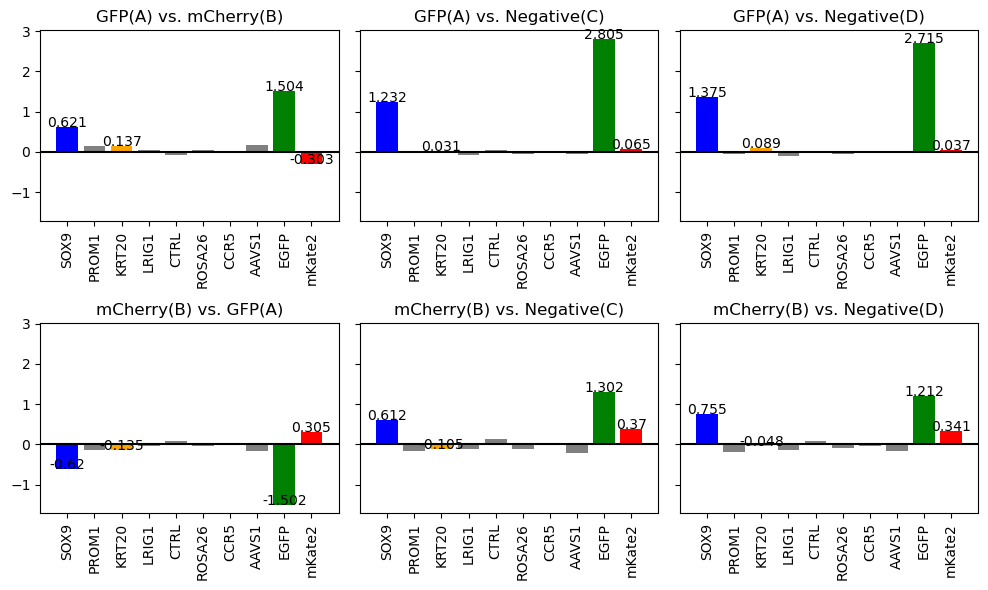

In [97]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S1A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S1A_mCherry.gene_summary.txt',sep='\t'))

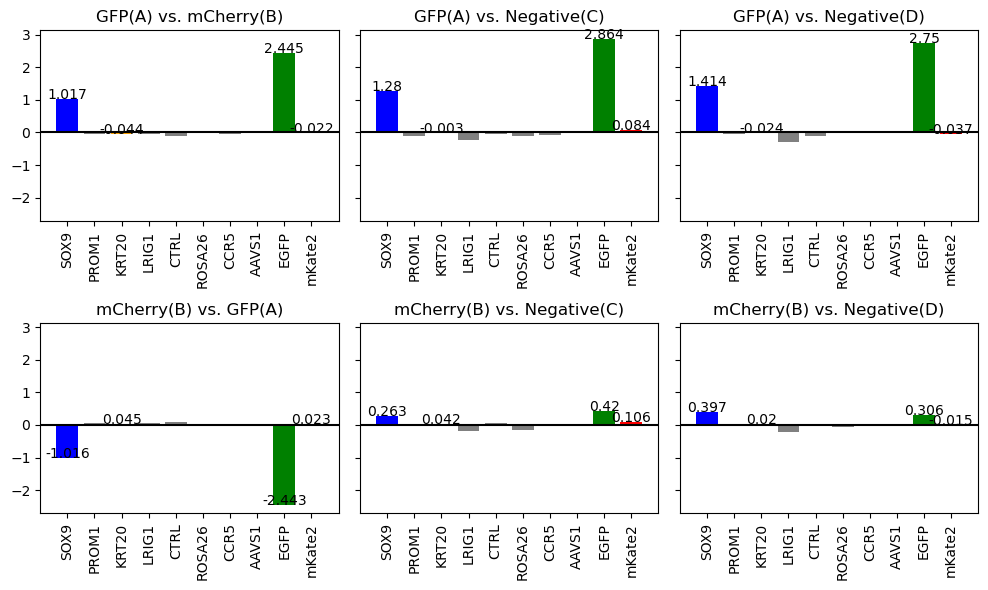

In [98]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S1B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S1B_mCherry.gene_summary.txt',sep='\t'))

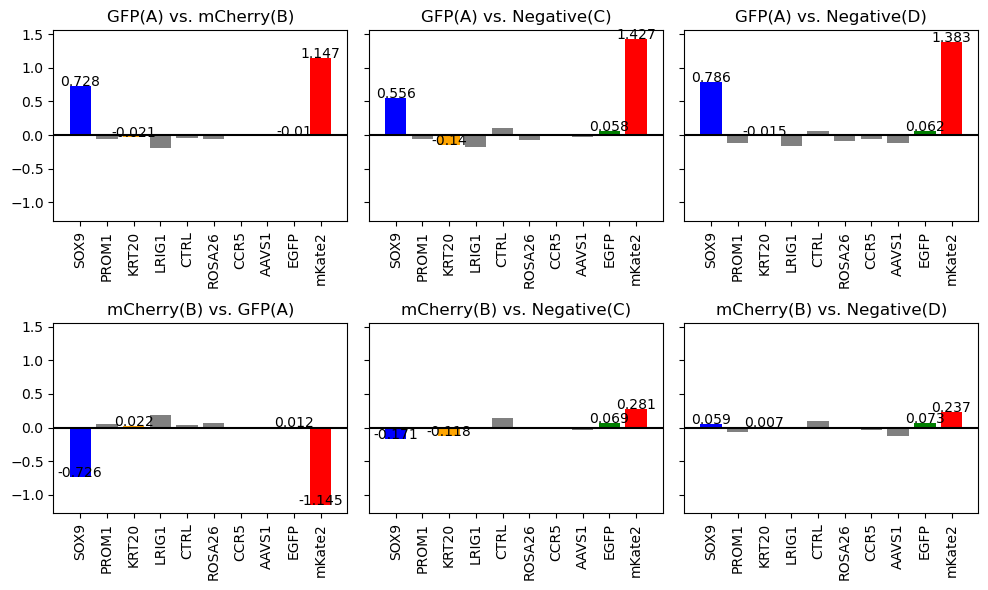

In [99]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S2A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S2A_mCherry.gene_summary.txt',sep='\t'))

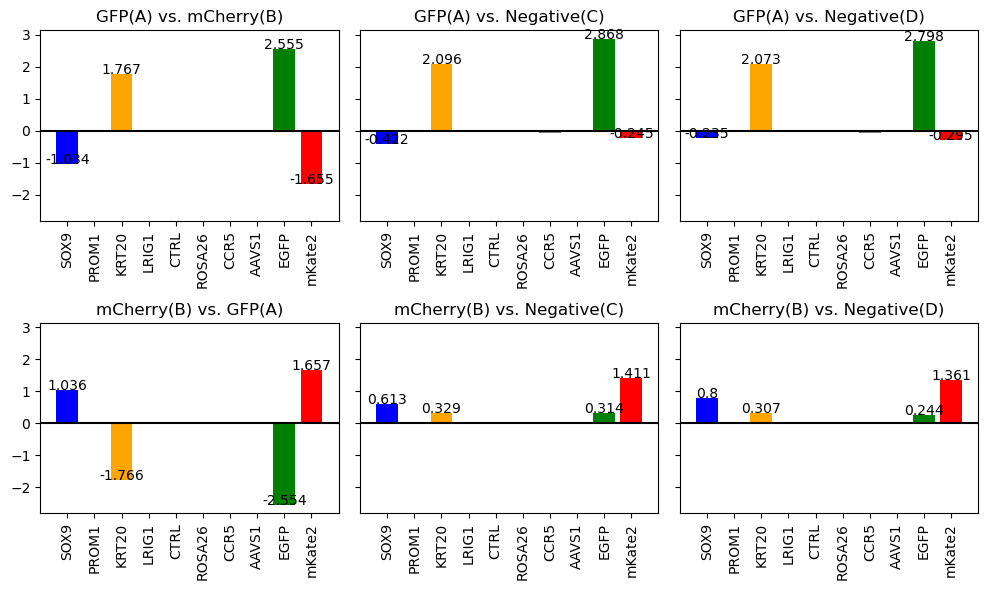

In [100]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S3A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S3A_mCherry.gene_summary.txt',sep='\t'))

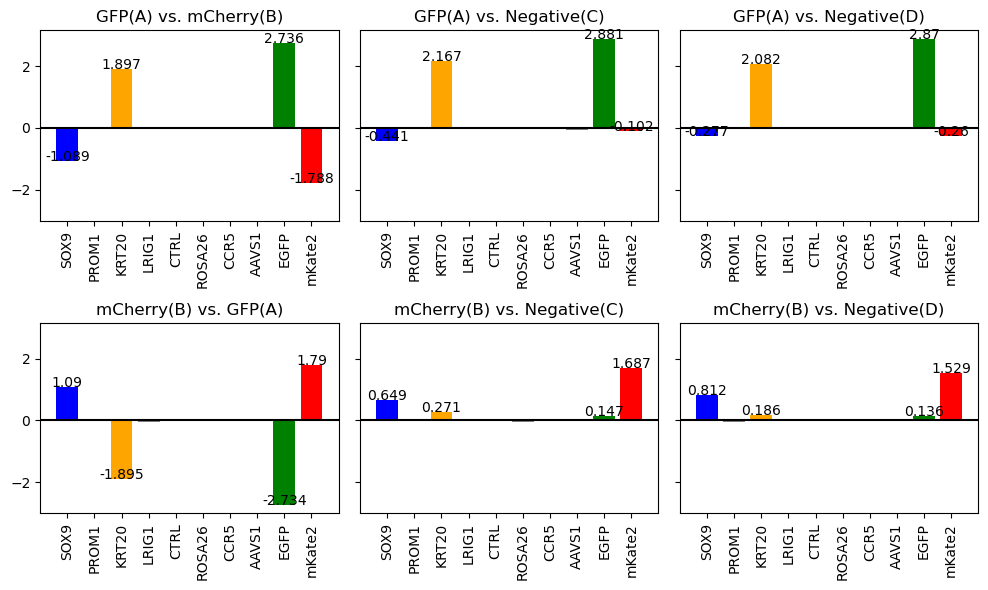

In [101]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S3B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S3B_mCherry.gene_summary.txt',sep='\t'))

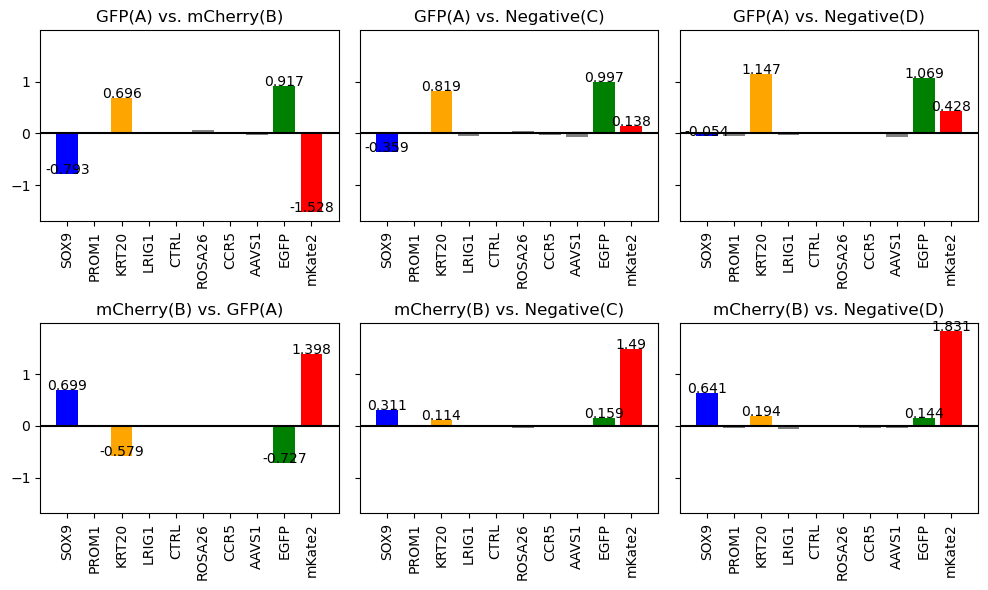

In [102]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S4A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S4A_mCherry.gene_summary.txt',sep='\t'))

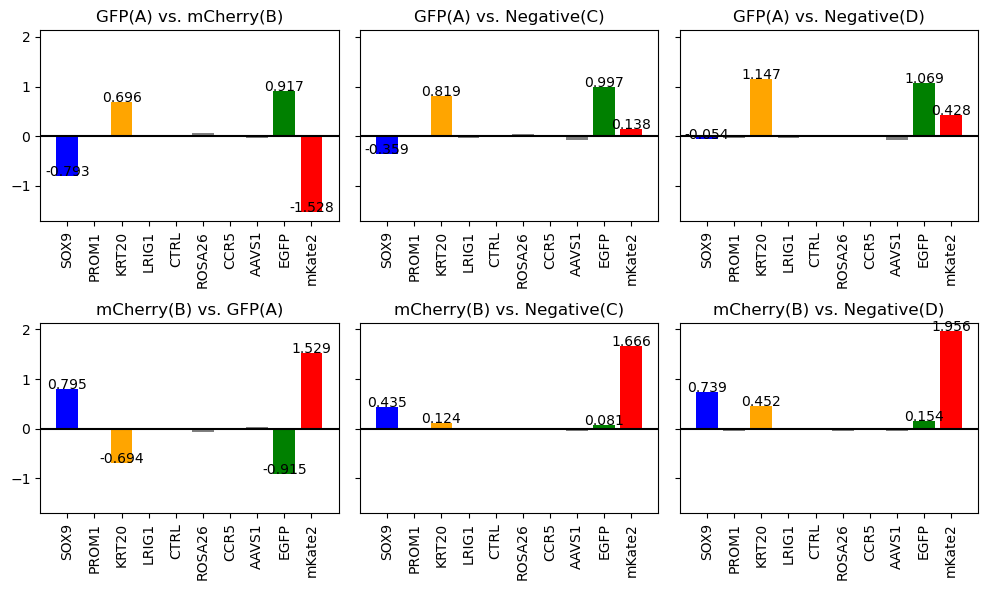

In [103]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S4B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S4B_mCherry.gene_summary.txt',sep='\t'))

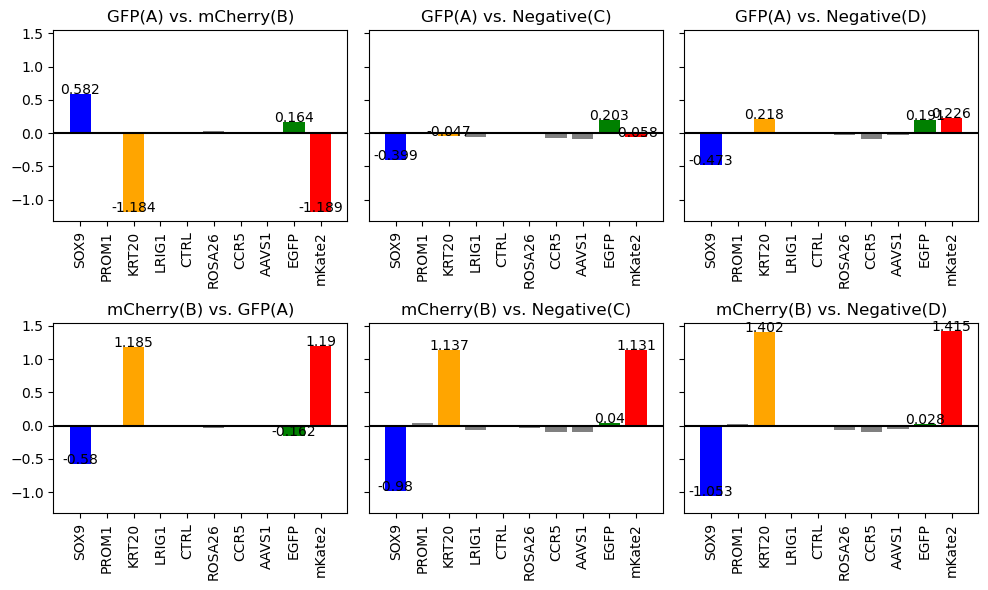

In [104]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S5A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S5A_mCherry.gene_summary.txt',sep='\t'))

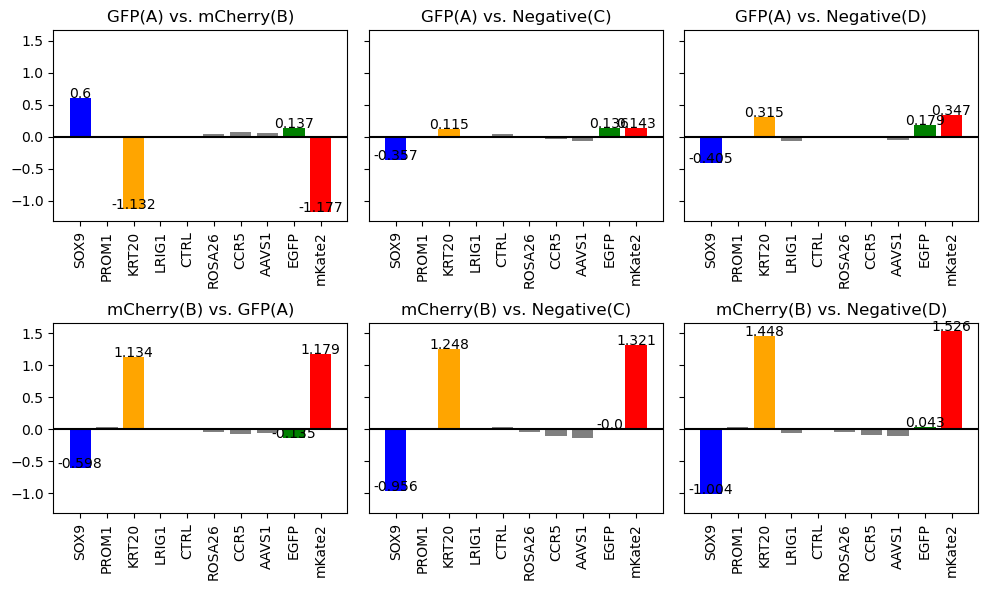

In [105]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S5B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S5B_mCherry.gene_summary.txt',sep='\t'))

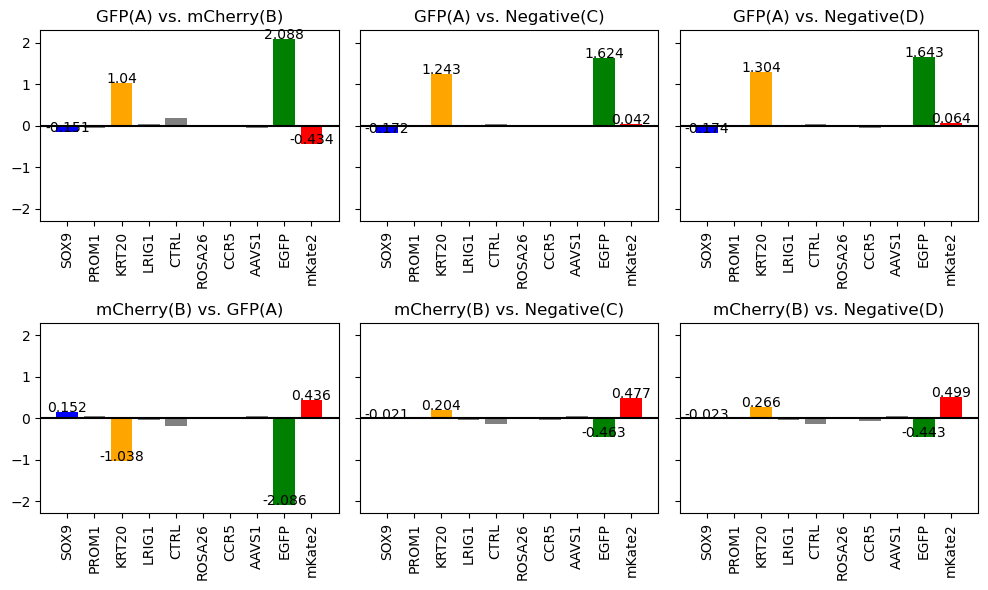

In [106]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S6A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S6A_mCherry.gene_summary.txt',sep='\t'))

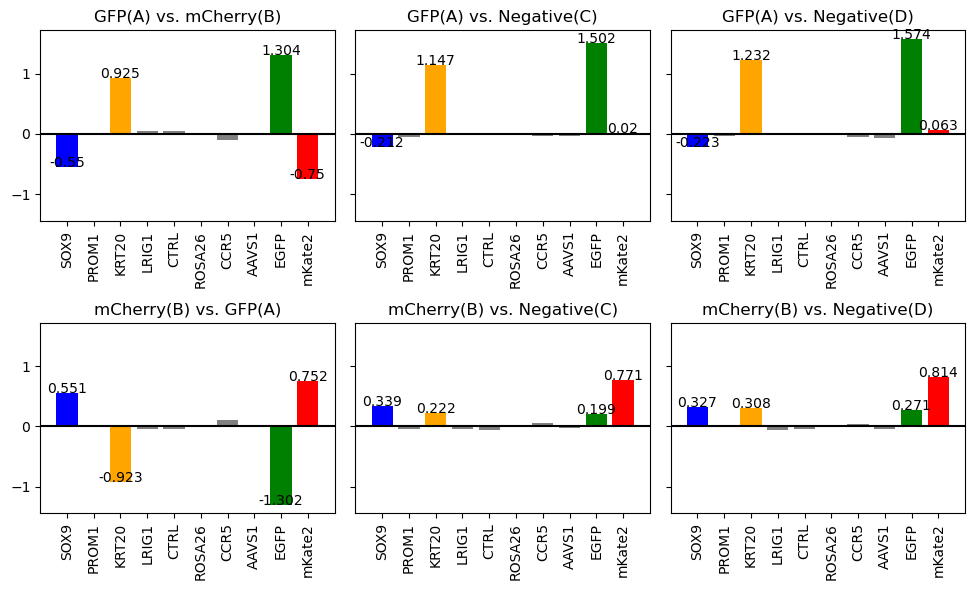

In [107]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S6B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S6B_mCherry.gene_summary.txt',sep='\t'))

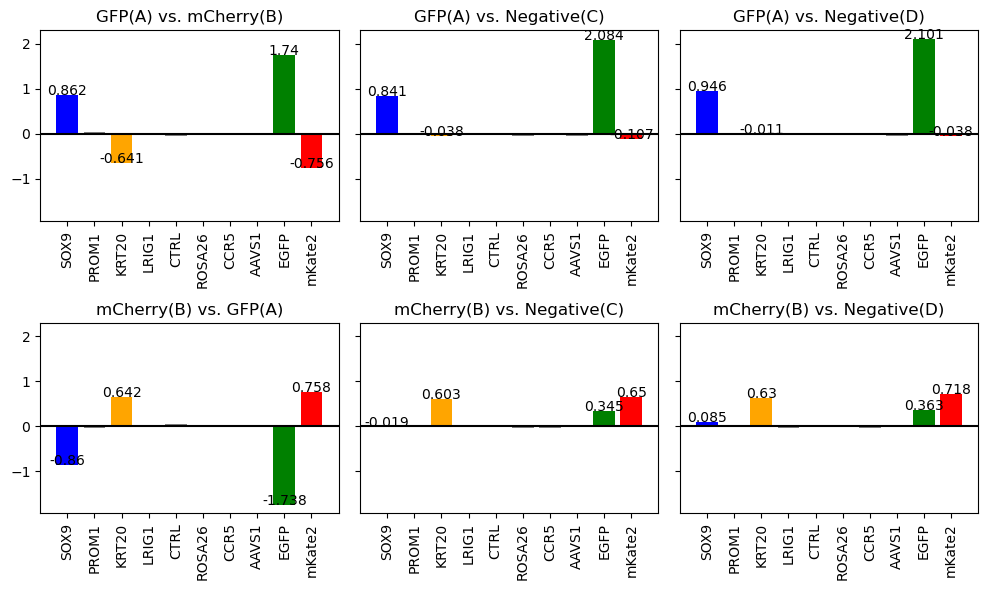

In [108]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S7A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S7A_mCherry.gene_summary.txt',sep='\t'))

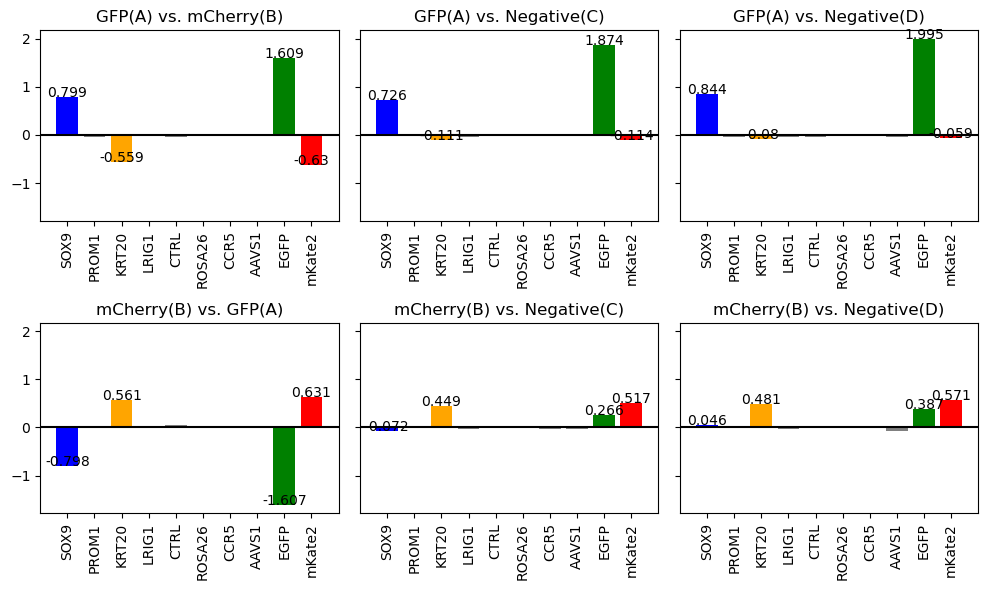

In [109]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S7B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S7B_mCherry.gene_summary.txt',sep='\t'))

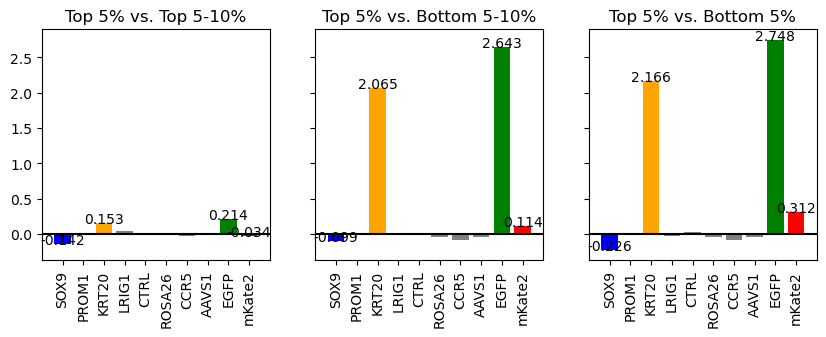

In [110]:
beta_score_single(pd.read_csv('Miniscreen05/MaGeCK/S8A.gene_summary.txt',sep='\t'))

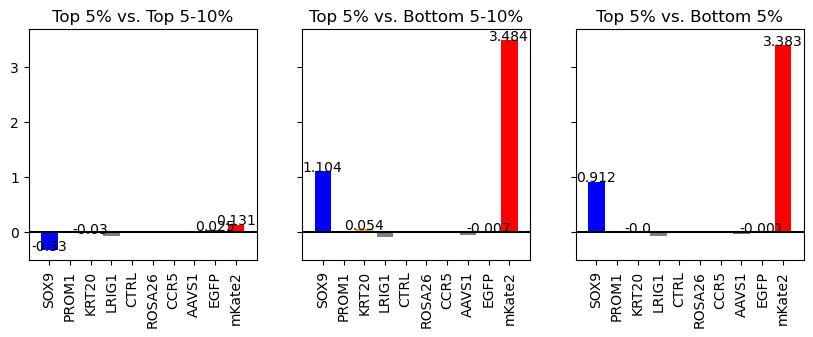

In [111]:
beta_score_single(pd.read_csv('Miniscreen05/MaGeCK/S8B.gene_summary.txt',sep='\t'))

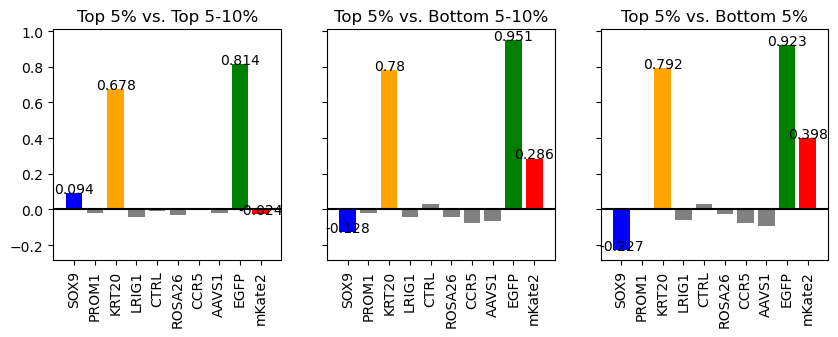

In [112]:
beta_score_single(pd.read_csv('Miniscreen05/MaGeCK/S9A.gene_summary.txt',sep='\t'))

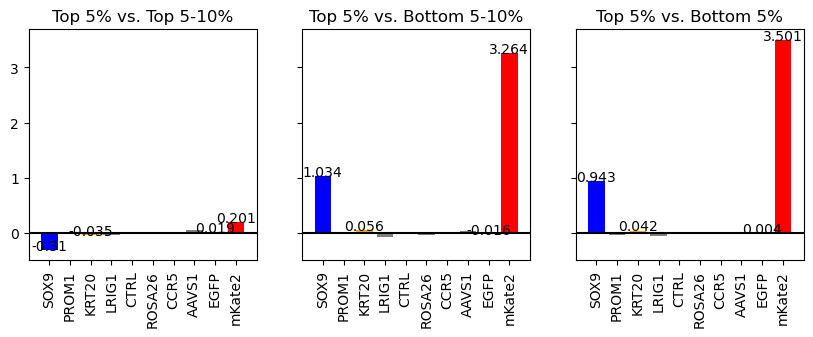

In [113]:
beta_score_single(pd.read_csv('Miniscreen05/MaGeCK/S9B.gene_summary.txt',sep='\t'))

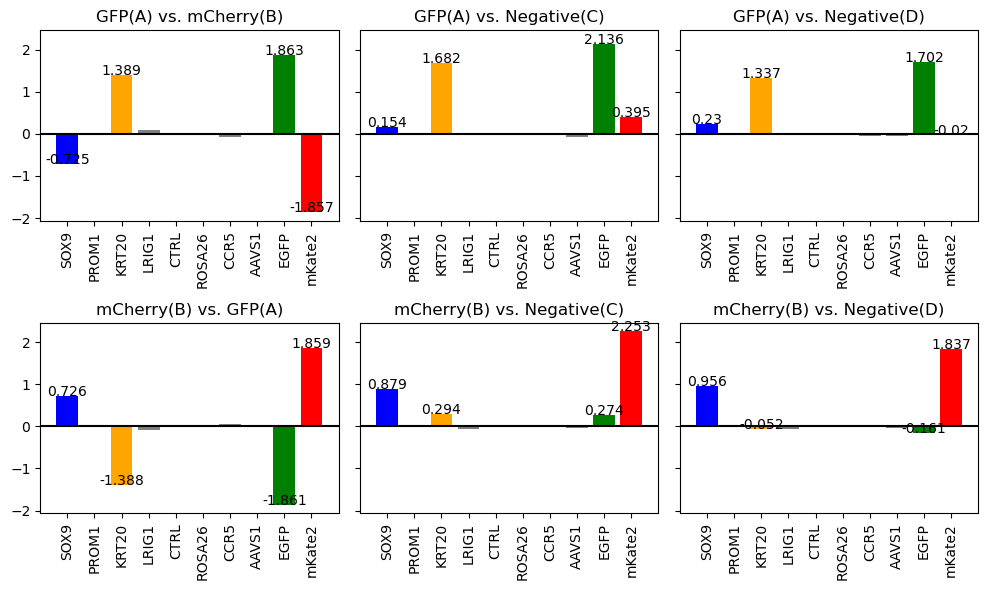

In [114]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S10A_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S10A_mCherry.gene_summary.txt',sep='\t'))

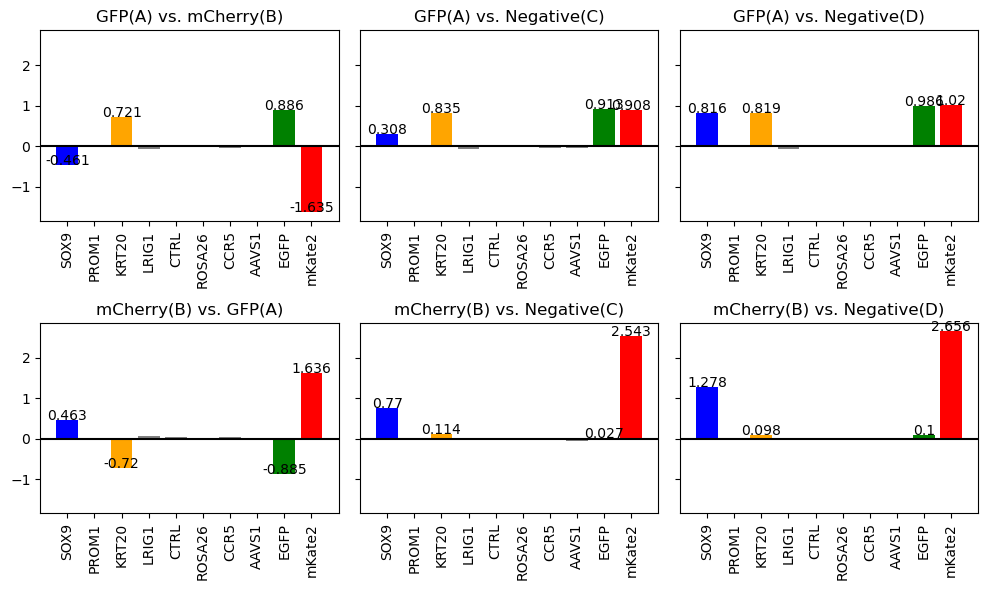

In [115]:
beta_score(gfp_df = pd.read_csv('Miniscreen05/MaGeCK/S10B_GFP.gene_summary.txt',sep='\t'),
           mkate_df = pd.read_csv('Miniscreen05/MaGeCK/S10B_mCherry.gene_summary.txt',sep='\t'))

In [169]:
def density_summary(df):

    plt.style.use('default')
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(8,5), sharex=True)

    format_df = density_format(df)

    fc_df_0_1 = np.log2(format_df.iloc[:, 1].div(format_df.iloc[:, 0]))
    fc_df_0_1[format_df[format_df['Gene'] == "SOX9"].index].plot.kde(c="blue", ax = ax1)
    fc_df_0_1[format_df[format_df['Gene'] == "KRT20"].index].plot.kde(c="orange", ax = ax1)
    fc_df_0_1[format_df[format_df['Gene'] == "EGFP"].index].plot.kde(c="green", ax = ax1)
    fc_df_0_1[format_df[format_df['Gene'] == "mKate2"].index].plot.kde(c="red", ax = ax1)
    fc_df_0_1[format_df[~format_df['Gene'].isin(["SOX9", "KRT20", "EGFP", "mKate2"])].index].plot.kde(c="black", ax = ax1)
    ax1.set_title("GFP (A) vs mCherry (B)")
    ax1.set_ylim(0,)

    fc_df_0_2 = np.log2(format_df.iloc[:, 2].div(format_df.iloc[:, 0]))
    fc_df_0_2[format_df[format_df['Gene'] == "SOX9"].index].plot.kde(c="blue", ax = ax2)
    fc_df_0_2[format_df[format_df['Gene'] == "KRT20"].index].plot.kde(c="orange", ax = ax2)
    fc_df_0_2[format_df[format_df['Gene'] == "EGFP"].index].plot.kde(c="green", ax = ax2)
    fc_df_0_2[format_df[format_df['Gene'] == "mKate2"].index].plot.kde(c="red", ax = ax2)
    fc_df_0_2[format_df[~format_df['Gene'].isin(["SOX9", "KRT20", "EGFP", "mKate2"])].index].plot.kde(c="black", ax = ax2)
    ax2.set_title("GFP (A) vs Negative (C)")
    ax2.set_ylim(0,)

    fc_df_0_3 = np.log2(format_df.iloc[:, 3].div(format_df.iloc[:, 0]))
    fc_df_0_3[format_df[format_df['Gene'] == "SOX9"].index].plot.kde(c="blue", ax = ax3)
    fc_df_0_3[format_df[format_df['Gene'] == "KRT20"].index].plot.kde(c="orange", ax = ax3)
    fc_df_0_3[format_df[format_df['Gene'] == "EGFP"].index].plot.kde(c="green", ax = ax3)
    fc_df_0_3[format_df[format_df['Gene'] == "mKate2"].index].plot.kde(c="red", ax = ax3)
    fc_df_0_3[format_df[~format_df['Gene'].isin(["SOX9", "KRT20", "EGFP", "mKate2"])].index].plot.kde(c="black", ax = ax3)
    ax3.set_title("GFP (A) vs Negative (D)")
    ax3.set_ylim(0,)

    fc_df_1_2 = np.log2(format_df.iloc[:, 2].div(format_df.iloc[:, 1]))
    fc_df_1_2[format_df[format_df['Gene'] == "SOX9"].index].plot.kde(c="blue", ax = ax4)
    fc_df_1_2[format_df[format_df['Gene'] == "KRT20"].index].plot.kde(c="orange", ax = ax4)
    fc_df_1_2[format_df[format_df['Gene'] == "EGFP"].index].plot.kde(c="green", ax = ax4)
    fc_df_1_2[format_df[format_df['Gene'] == "mKate2"].index].plot.kde(c="red", ax = ax4)
    fc_df_1_2[format_df[~format_df['Gene'].isin(["SOX9", "KRT20", "EGFP", "mKate2"])].index].plot.kde(c="black", ax = ax4)
    ax4.set_title("GFP (A) vs Negative (C)")
    ax4.set_ylim(0,)

    fc_df_1_3 = np.log2(format_df.iloc[:, 3].div(format_df.iloc[:, 1]))
    fc_df_1_3[format_df[format_df['Gene'] == "SOX9"].index].plot.kde(c="blue", ax = ax5)
    fc_df_1_3[format_df[format_df['Gene'] == "KRT20"].index].plot.kde(c="orange", ax = ax5)
    fc_df_1_3[format_df[format_df['Gene'] == "EGFP"].index].plot.kde(c="green", ax = ax5)
    fc_df_1_3[format_df[format_df['Gene'] == "mKate2"].index].plot.kde(c="red", ax = ax5)
    fc_df_1_3[format_df[~format_df['Gene'].isin(["SOX9", "KRT20", "EGFP", "mKate2"])].index].plot.kde(c="black", ax = ax5)
    ax5.set_title("GFP (A) vs Negative (D)")
    ax5.set_xlabel("Log Base 2 Fold Change")
    ax5.set_ylim(0,)

    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax3.set_ylabel("Density", labelpad=10)
    ax4.set_ylabel("")
    ax5.set_ylabel("")

    plt.tight_layout()
    plt.show()

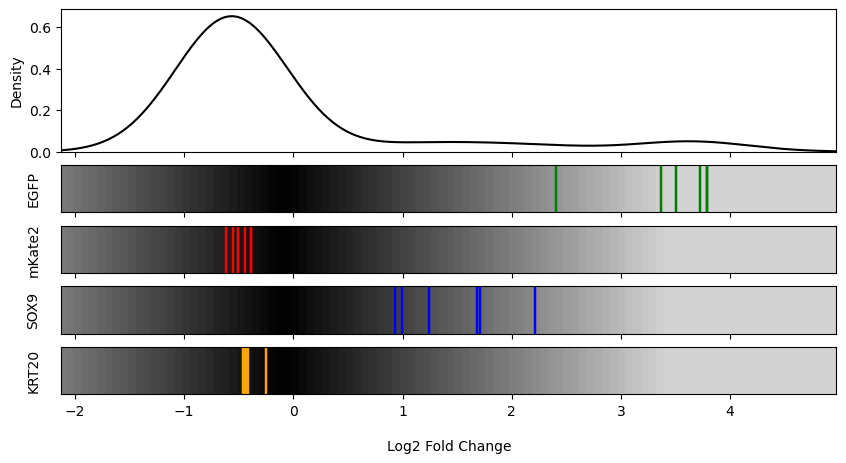

In [171]:
density(S1A, 0, 3)

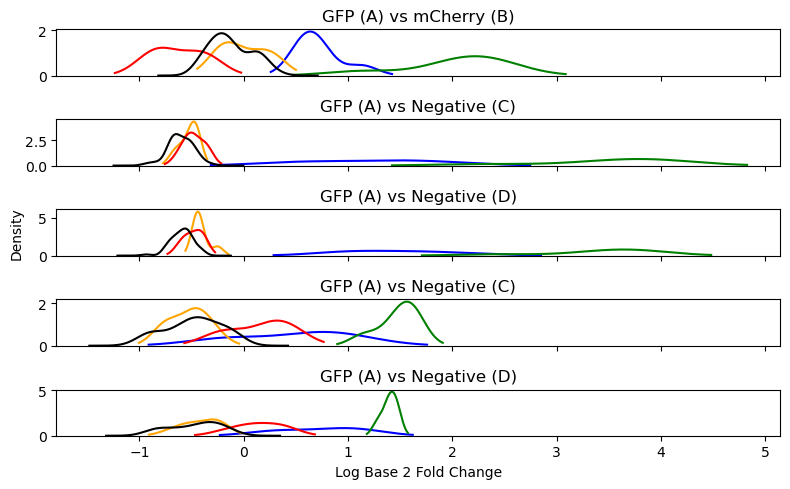

In [170]:
density_summary(S1A)

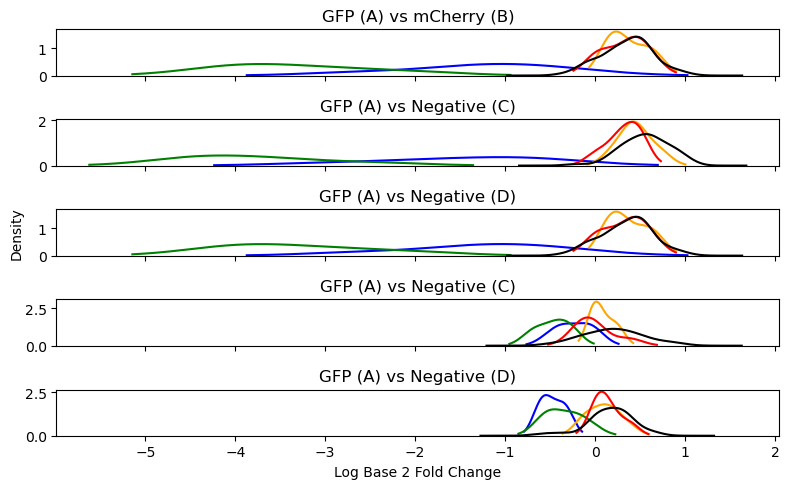

In [166]:
density_summary(S1B)